In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uuid

pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv("/kaggle/input/logistics-data-containing-real-world-data/incom2024_delay_example_dataset.csv")
data.drop(['department_id','category_id'],axis=1,inplace=True)
category_map={category:i for i,category in enumerate(data['category_name'].unique(),start=1)}
department_map={department:i for i ,department in enumerate(data['department_name'].unique(),start=1)}
data['category_id'] = data['category_name'].map(category_map)
data['department_id'] = data['department_name'].map(department_map)
data['shipping_date']=pd.to_datetime(data['shipping_date'],utc=True)
data['order_date']=pd.to_datetime(data['order_date'],utc=True)
data['order_to_shipping_days'] = (data['shipping_date'] - data['order_date']).dt.days


delay_dict={-1:"Delay",1:"Early Arrival ",0:"On time"}
data['Delay']=data['label'].map(delay_dict)

# Create a new unique 'order_id' column with random UUIDs
data['order_id'] = [str(uuid.uuid4()) for _ in range(len(data))]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

In [5]:
data.isnull().sum()

payment_type                0
profit_per_order            0
sales_per_customer          0
category_id                 0
category_name               0
customer_city               0
customer_country            0
customer_id                 0
customer_segment            0
customer_state              0
customer_zipcode            0
department_id               0
department_name             0
latitude                    0
longitude                   0
market                      0
order_city                  0
order_country               0
order_customer_id           0
order_date                  0
order_id                    0
order_item_cardprod_id      0
order_item_discount         0
order_item_discount_rate    0
order_item_id               0
order_item_product_price    0
order_item_profit_ratio     0
order_item_quantity         0
sales                       0
order_item_total_amount     0
order_profit_per_order      0
order_region                0
order_state                 0
order_stat

In [7]:
unique_counts = data.nunique()
filtered_unique_counts = unique_counts[unique_counts < 40]
filtered_unique_counts

payment_type            4
customer_country        2
customer_segment        3
department_id          29
department_name        11
market                  5
order_item_quantity    11
order_region           23
order_status            7
shipping_mode           4
label                   3
dtype: int64

In [8]:
filtered_unique_counts.index

Index(['payment_type', 'customer_country', 'customer_segment', 'department_id',
       'department_name', 'market', 'order_item_quantity', 'order_region',
       'order_status', 'shipping_mode', 'label'],
      dtype='object')

# DATA ANALYSIS

## UNIVARIATE ANALYSIS

In [4]:
import random
def random_color():
    return (random.random(), random.random(), random.random())

### Count plot for some categorial columns¶


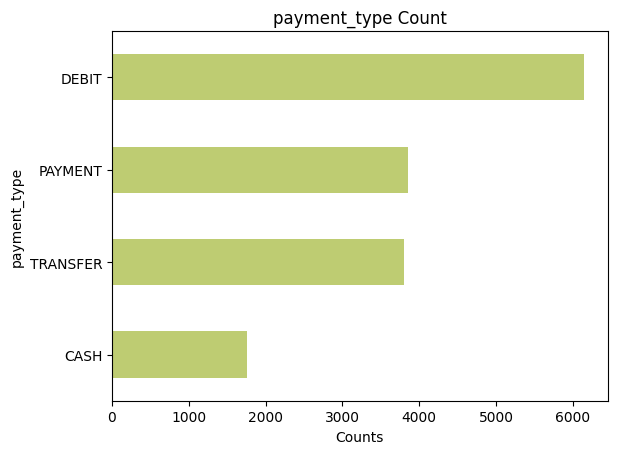

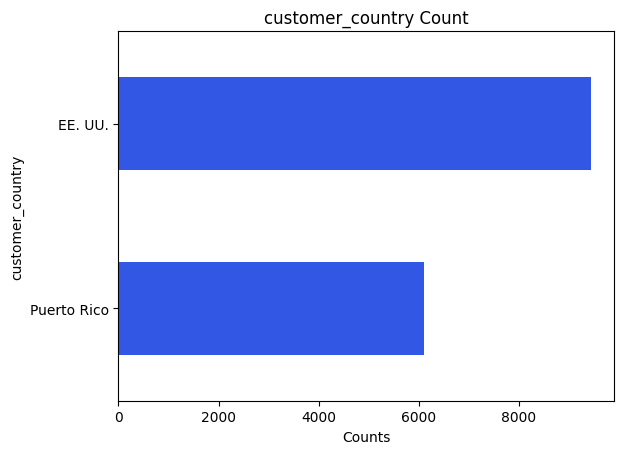

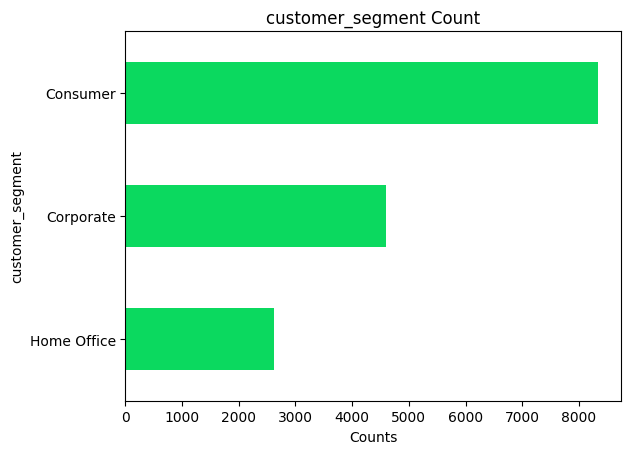

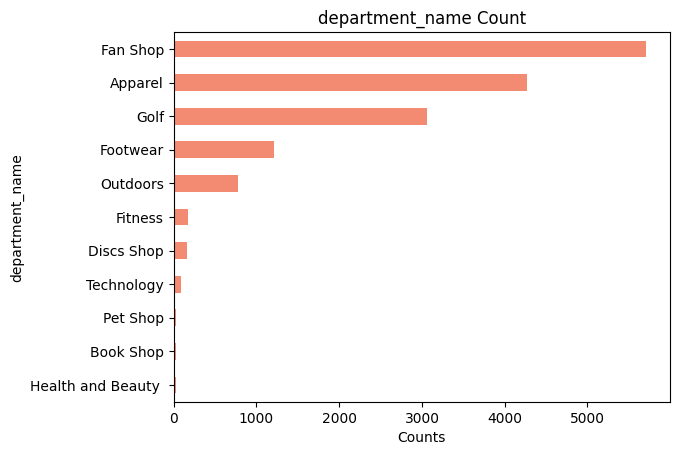

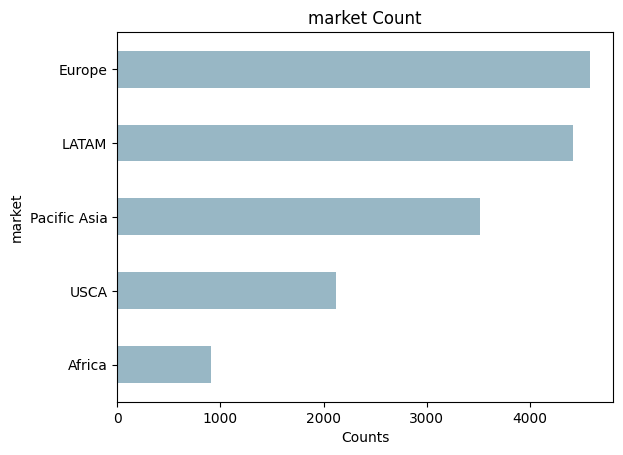

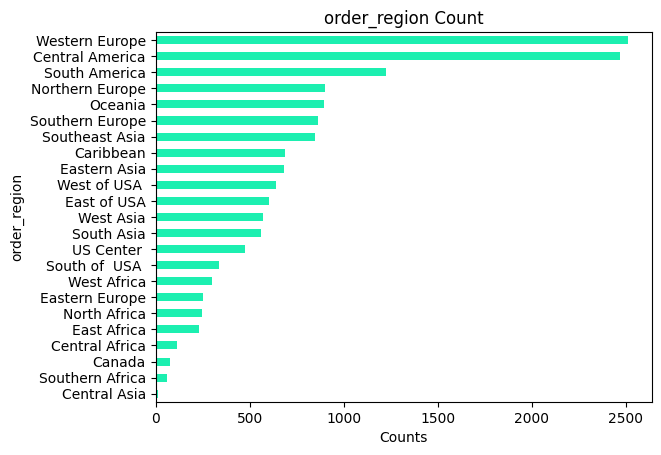

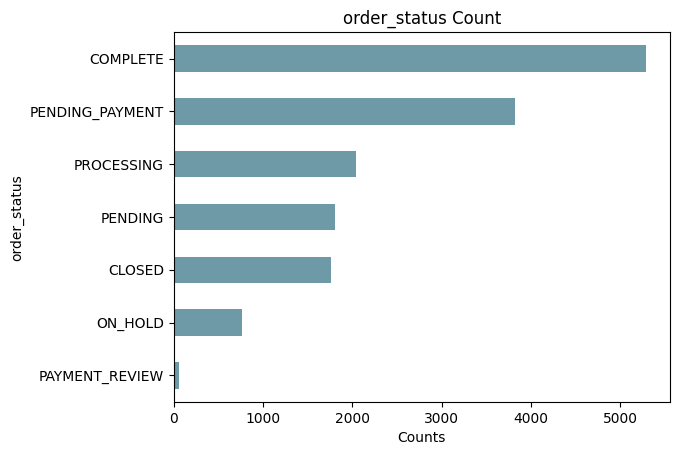

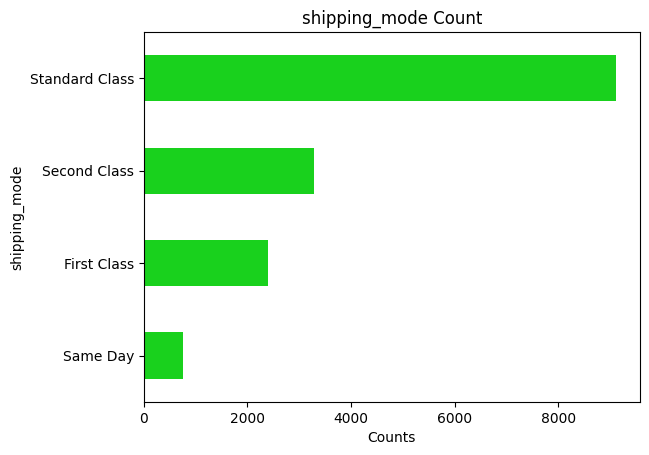

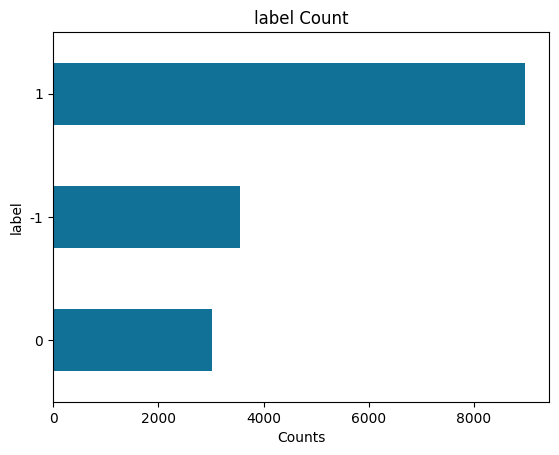

In [5]:
#payment_type
cols=['payment_type', 'customer_country', 'customer_segment',
       'department_name', 'market', 'order_region',
       'order_status', 'shipping_mode', 'label']
for col in cols:
    data[col].value_counts().sort_values(ascending=True).plot(kind='barh', color=random_color())
    plt.title(f'{col} Count')
    plt.xlabel('Counts')
    plt.ylabel(col)
    
    # Show the plot
    plt.show()


#### LISTING of categories in market

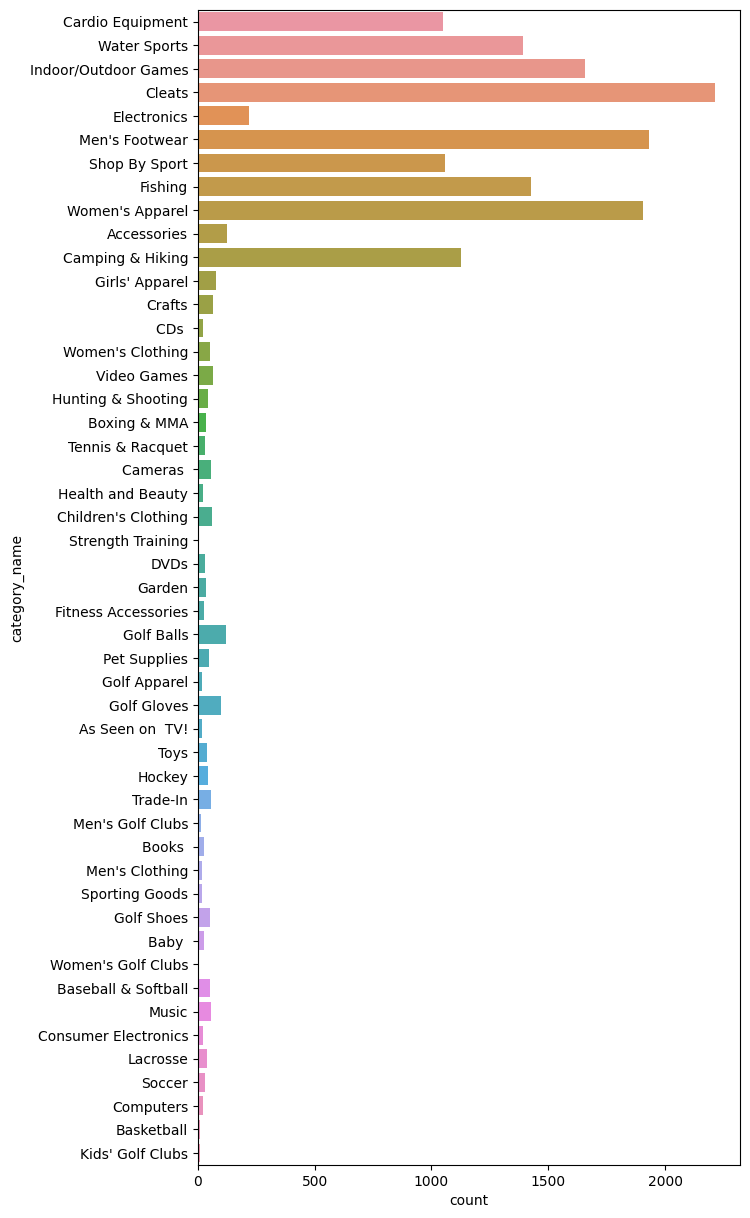

In [8]:
plt.figure(figsize=(7,15))
sns.countplot(data=data,y='category_name')
plt.savefig("countplot.png", bbox_inches='tight')


### Distribution of numerical columns

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   payment_type              15549 non-null  object             
 1   profit_per_order          15549 non-null  float64            
 2   sales_per_customer        15549 non-null  float64            
 3   category_id               15549 non-null  float64            
 4   category_name             15549 non-null  object             
 5   customer_city             15549 non-null  object             
 6   customer_country          15549 non-null  object             
 7   customer_id               15549 non-null  float64            
 8   customer_segment          15549 non-null  object             
 9   customer_state            15549 non-null  object             
 10  customer_zipcode          15549 non-null  float64            
 11  department_id  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


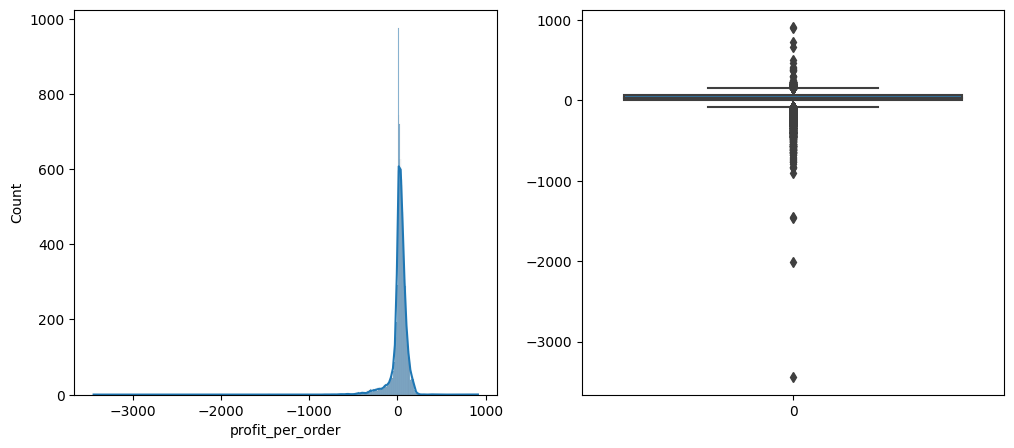

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


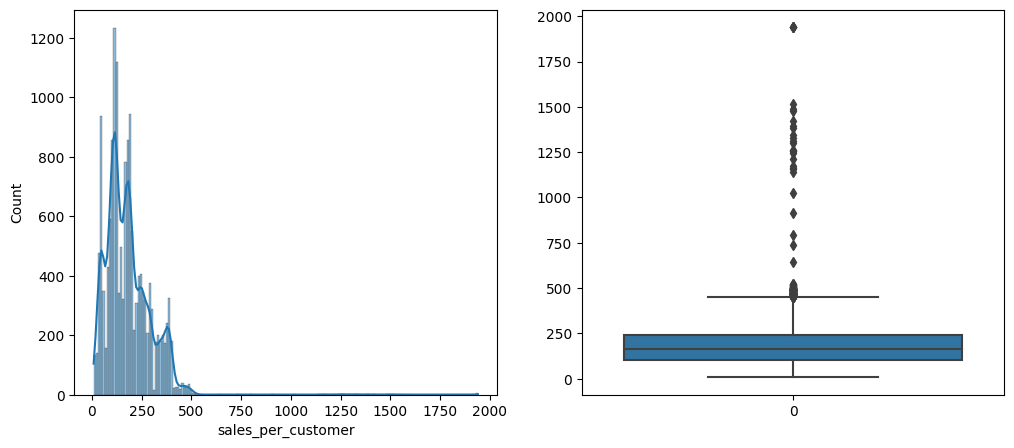

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


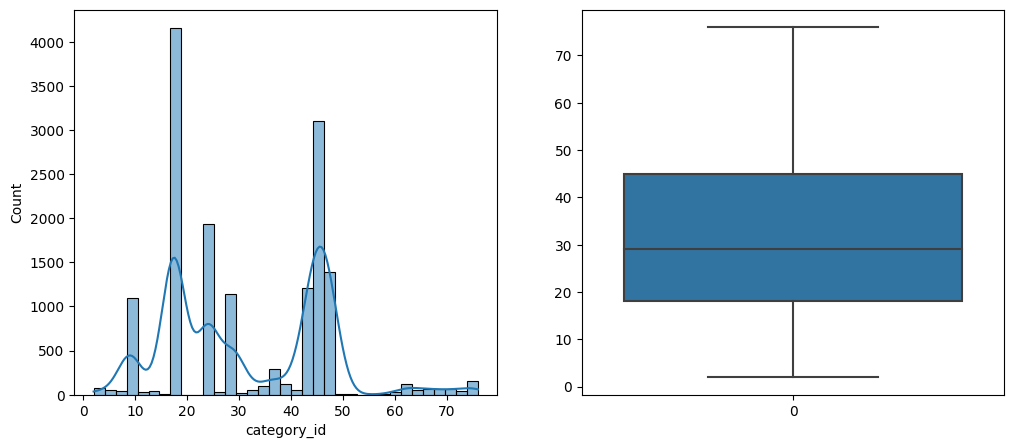

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


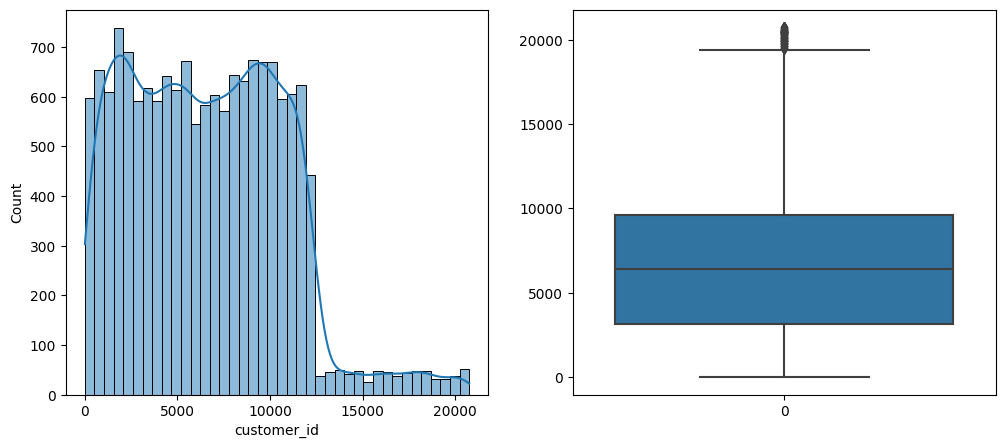

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


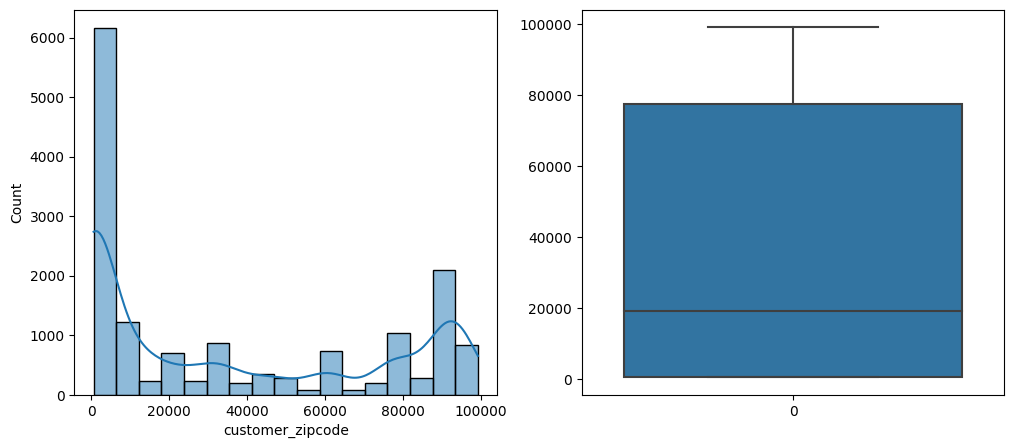

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


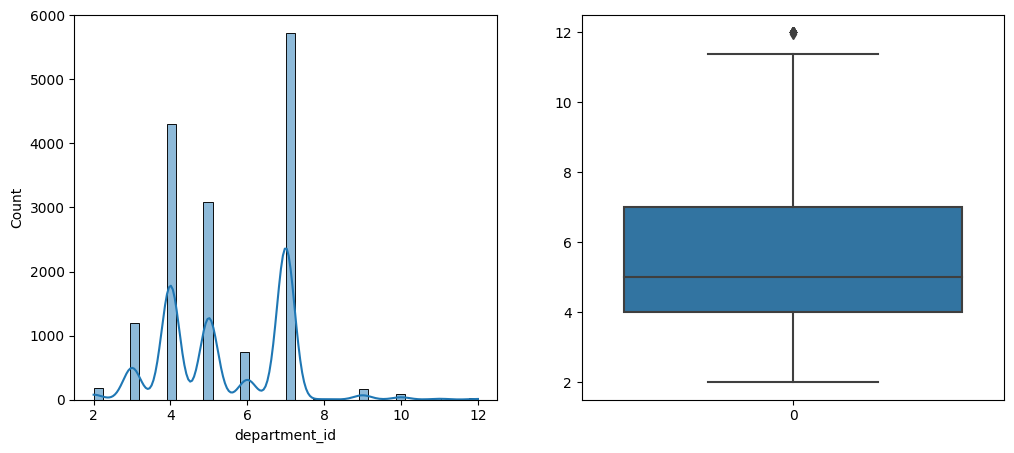

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


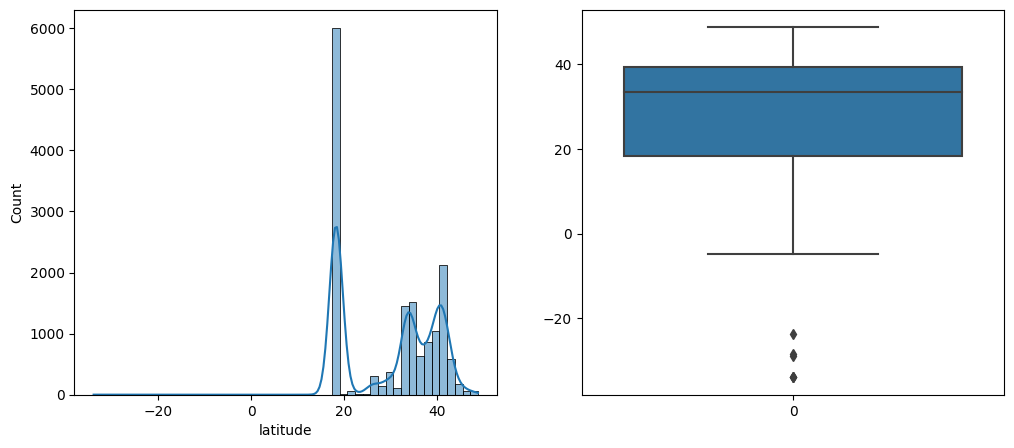

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


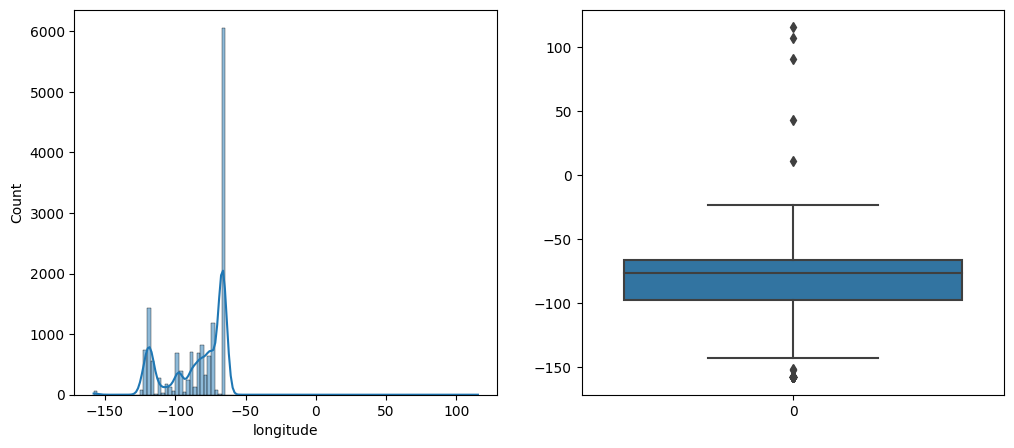

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


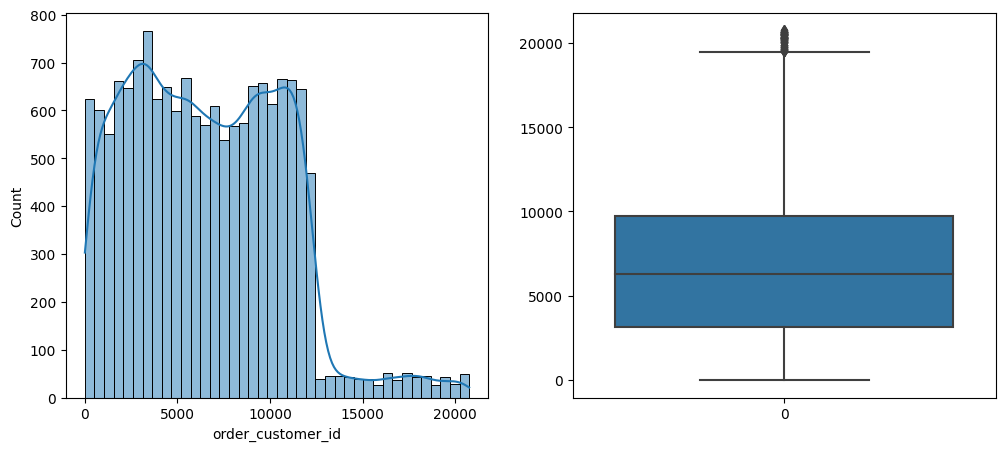

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


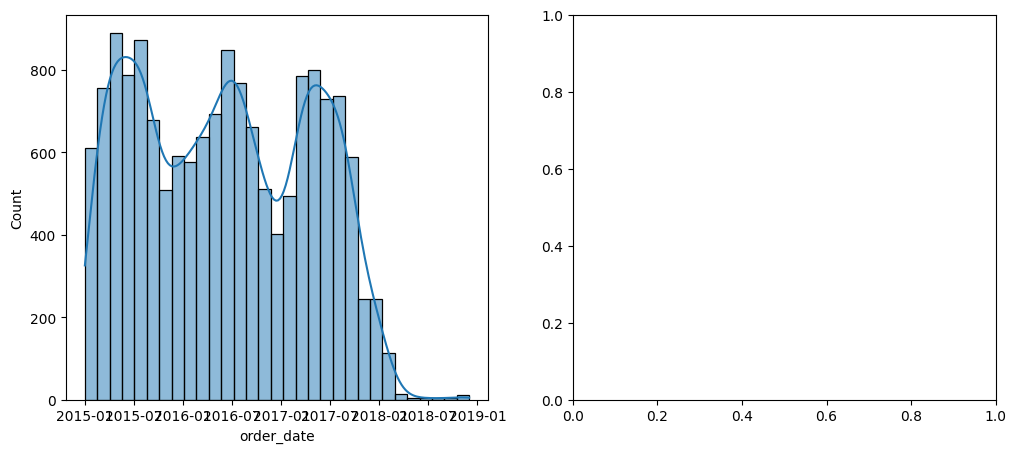

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


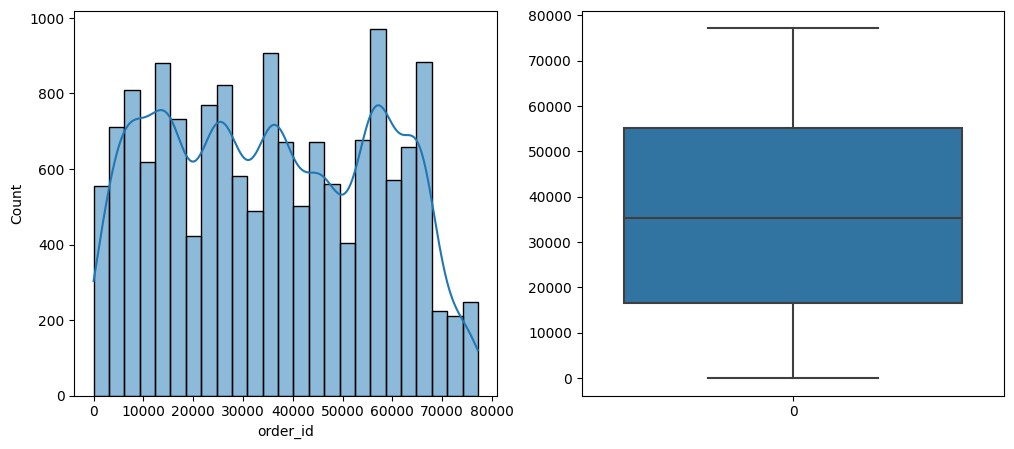

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


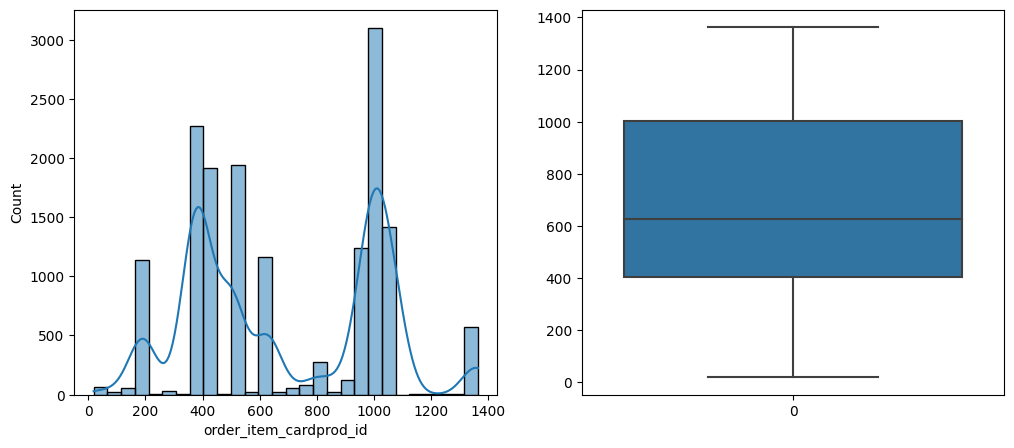

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


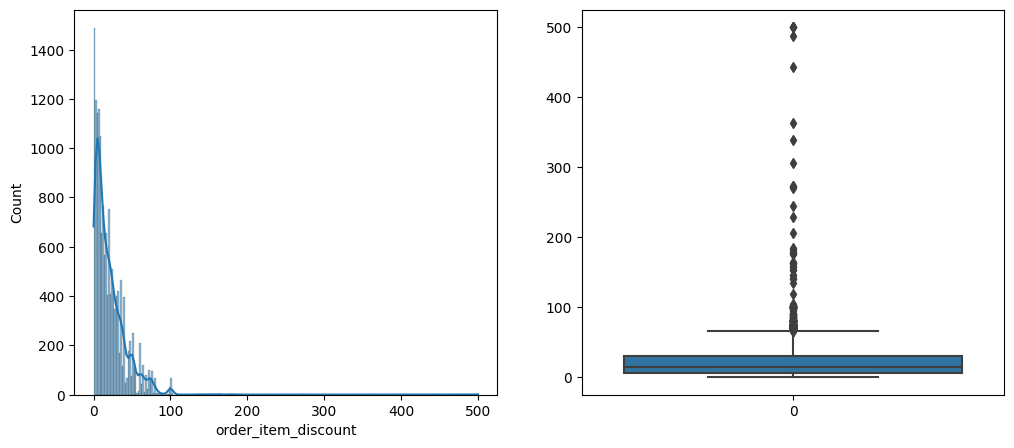

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


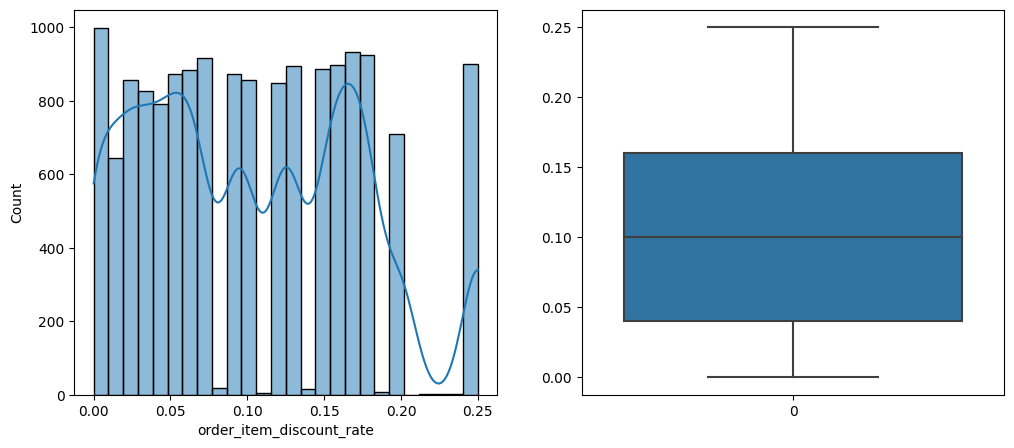

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


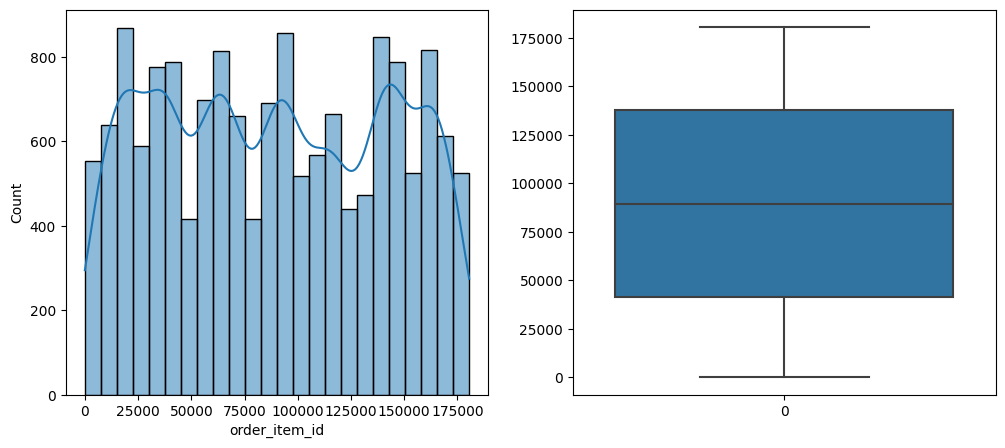

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


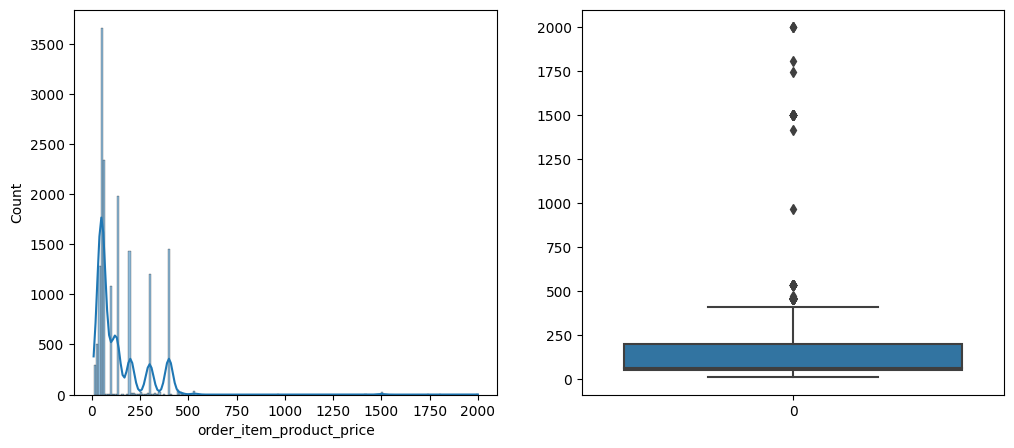

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


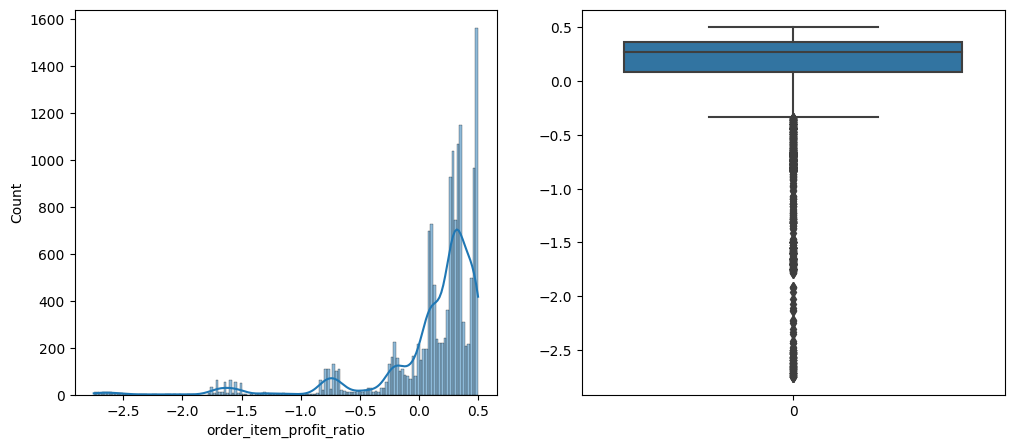

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


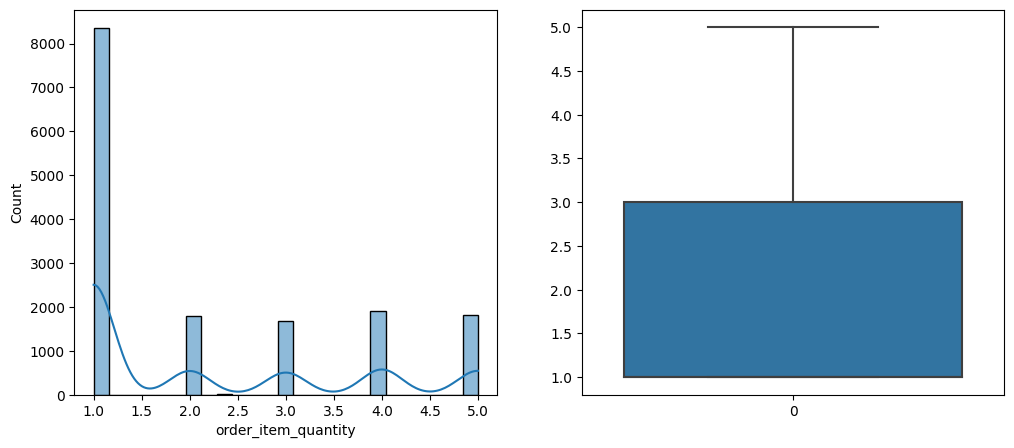

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


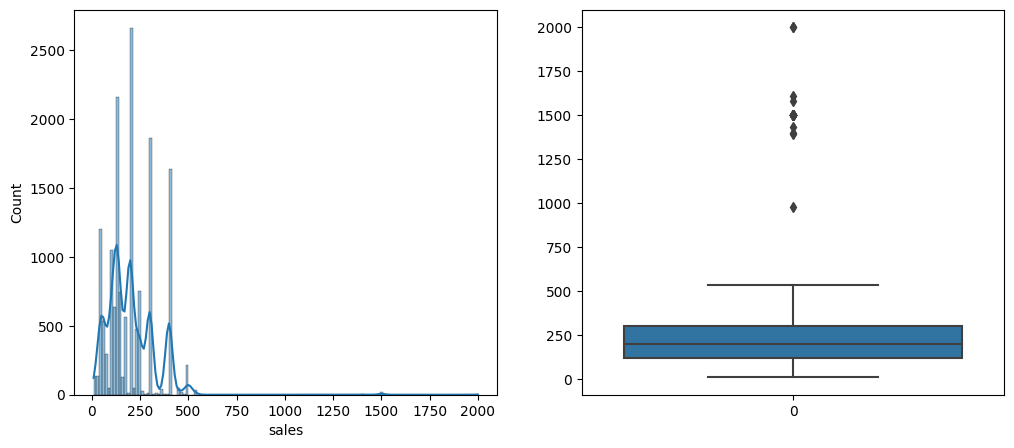

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


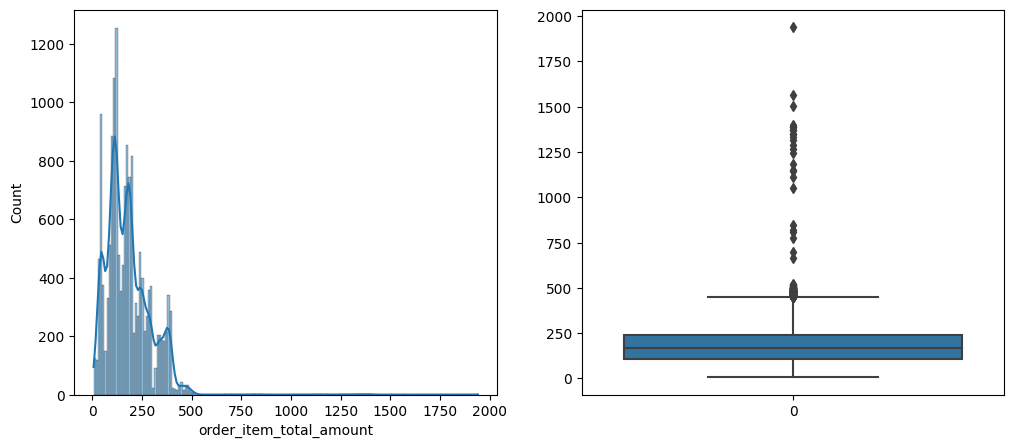

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


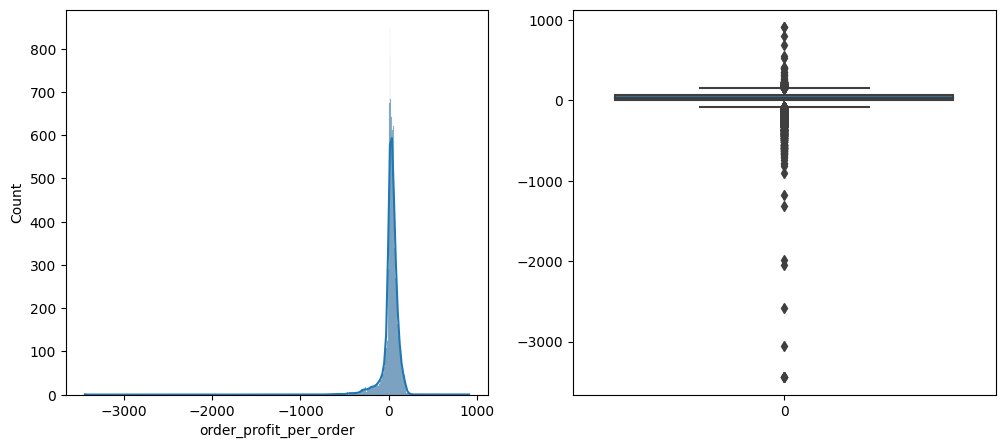

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


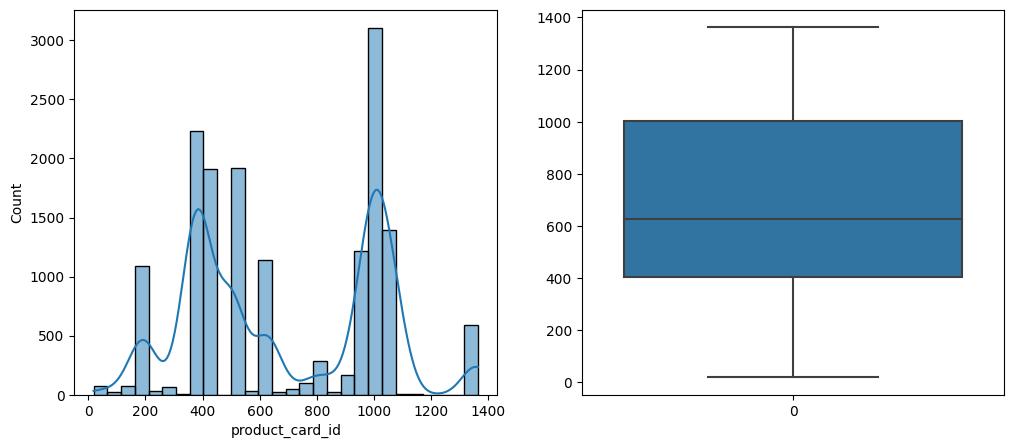

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


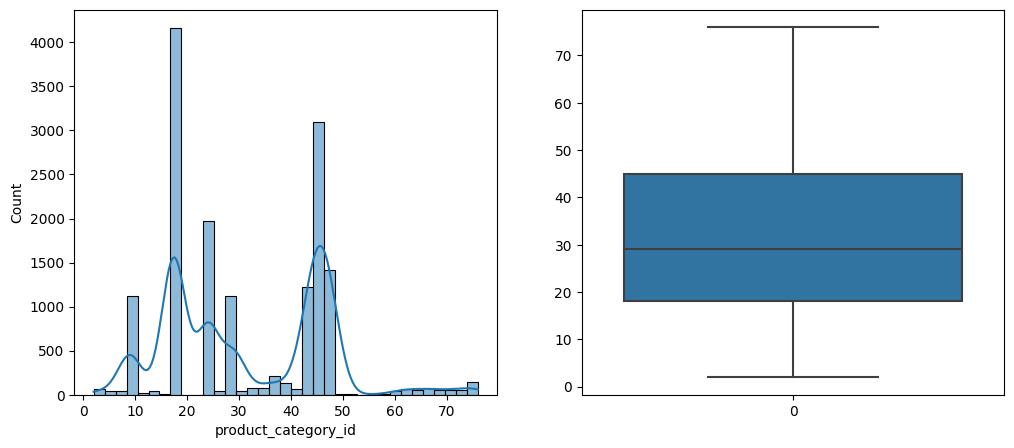

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


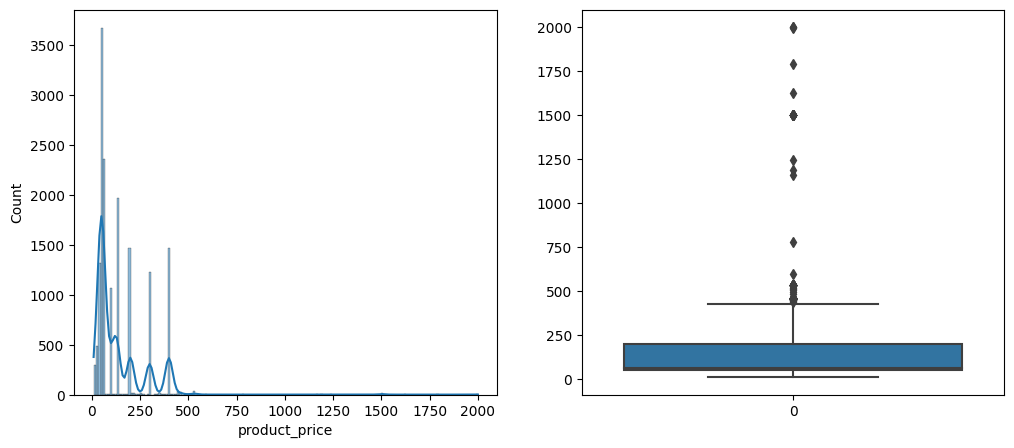

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


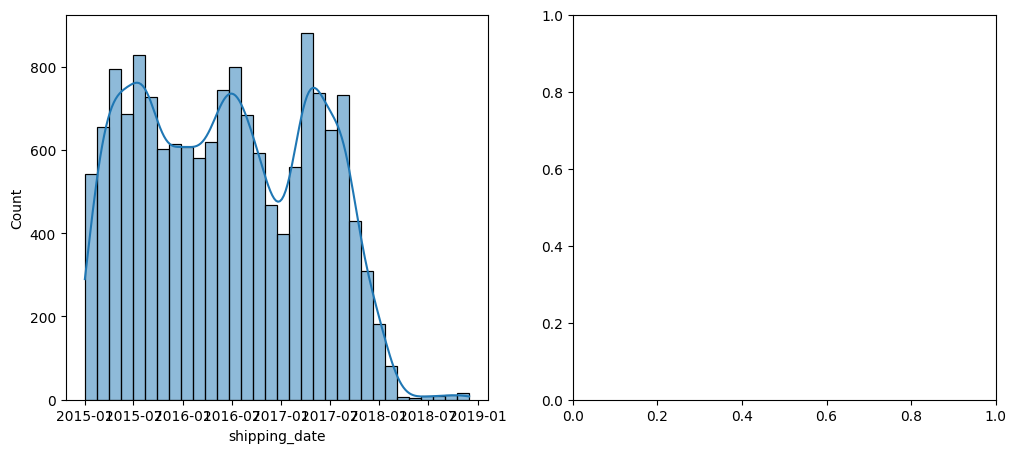

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


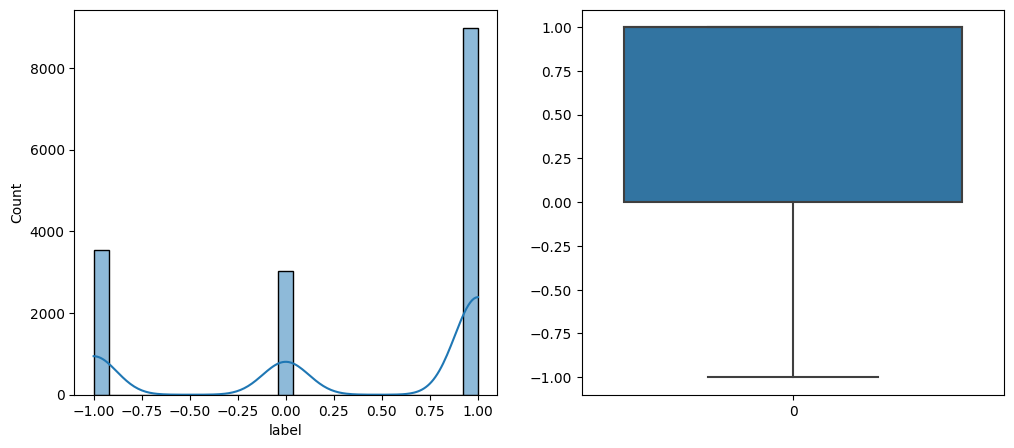

In [16]:
numerical_columns=data.select_dtypes(exclude='object').columns
for i in numerical_columns:
    fig,axes=plt.subplots(1,2,figsize=(12,5))
    sns.histplot(data[i],kde=True,ax=axes[0])
    if data[i].dtype!='datetime64[ns, UTC]':
        sns.boxplot(data[i],ax=axes[1])
    plt.show()

### Bivariate Analysis
DRILL DOWN APPROACH

In [22]:
#category_id               
print(len(data['customer_id'].value_counts()[data['customer_id'].value_counts() > 1]))
print(len(data['customer_id'].value_counts()[data['customer_id'].value_counts() == 1]))
len(data)

28
15491


15549

In [64]:
temp=data['customer_zipcode'].value_counts()
temp

customer_zipcode
725.000      6046
11226.000      34
92115.000      33
33068.000      24
93003.000      20
             ... 
92508.190       1
17402.705       1
95820.670       1
92664.664       1
77506.540       1
Name: count, Length: 9170, dtype: int64

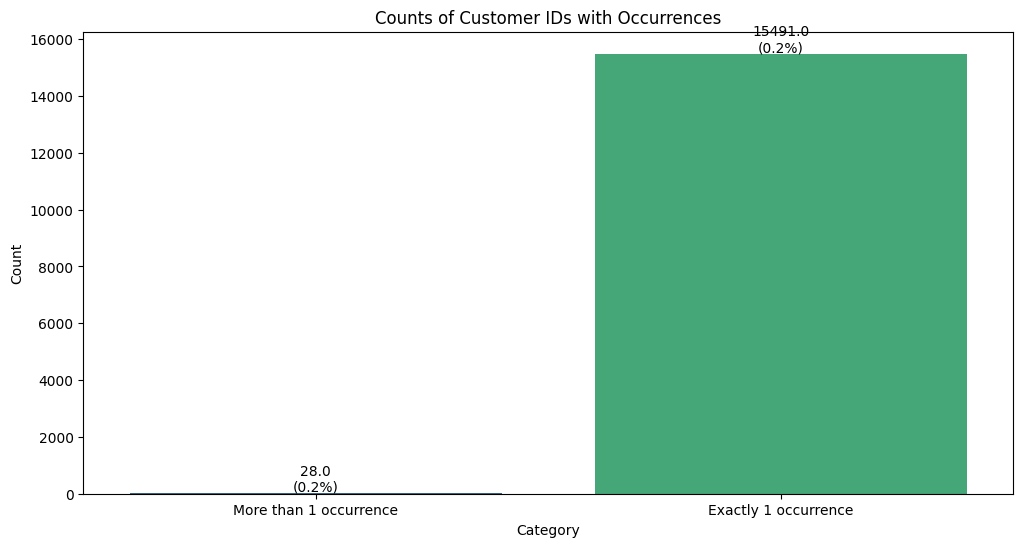

In [68]:
temp=data['customer_id'].value_counts()
more_than_one_temp=data['customer_id'].value_counts()[data['customer_id'].value_counts() > 1]
one_temp=data['customer_id'].value_counts()[data['customer_id'].value_counts() == 1]
plot_data = pd.DataFrame({
    'Category': ['More than 1 occurrence', 'Exactly 1 occurrence'],
    'Count': [len(more_than_one_temp), len(one_temp)],
    'Percentage': [len(more_than_one_temp)/len(temp)*100, len(one_temp)/len(temp)*100]
})
plt.figure(figsize=(12,6))
ax=sns.barplot(x=plot_data.Category,y=plot_data.Count,palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}\n({plot_data["Percentage"].iloc[int(p.get_x() == 0.0)]:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title('Counts of Customer IDs with Occurrences')
plt.show()

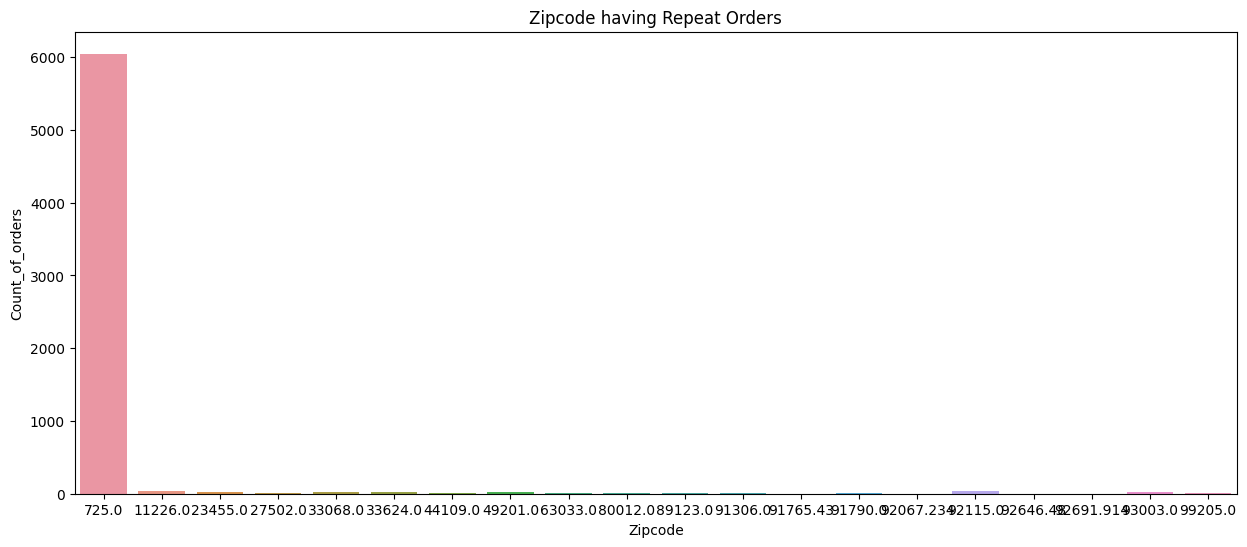

In [108]:
more_than_two_temp=data['customer_zipcode'].value_counts()[data['customer_zipcode'].value_counts() >2 ]
two_temp=data['customer_zipcode'].value_counts()[data['customer_zipcode'].value_counts() <=2]

'''plot_data = pd.DataFrame({
    'Category': ['More than 1 occurrence', 'Exactly 1 occurrence'],
    'Count': [len(more_than_two_temp), len(two_temp)],
    'Percentage': [len(more_than_two_temp)/len(data)*100, len(two_temp)/len(data)*100]
})'''
plot_data=pd.DataFrame({
    'Zipcode':more_than_two_temp.index,
    'Count Of orders':more_than_two_temp.values
})

plt.figure(figsize=(15,6))
sns.barplot(x='Zipcode',y='Count Of orders',data=plot_data)
plt.xlabel('Zipcode')
plt.ylabel('Count_of_orders')
plt.title("Zipcode having Repeat Orders")
plt.show()

In [115]:
plot_data

Zipcode  Count Of orders
0     725.000             6046
1   11226.000               34
2   92115.000               33
3   33068.000               24
4   93003.000               20
5   49201.000               18
6   33624.000               18
7   23455.000               17
8   27502.000               16
9   91790.000               15
10  44109.000               15
11  89123.000               12
12  91306.000               12
13  63033.000               11
14  80012.000                9
15  99205.000                5
16  91765.430                3
17  92646.480                3
18  92067.234                3
19  92691.914                3

In [114]:
len(data)

15549

In [121]:
temp.values

array([3247, 1775, 1024])

Text(0.5, 1.0, '725 Zipcode Customer Segments')

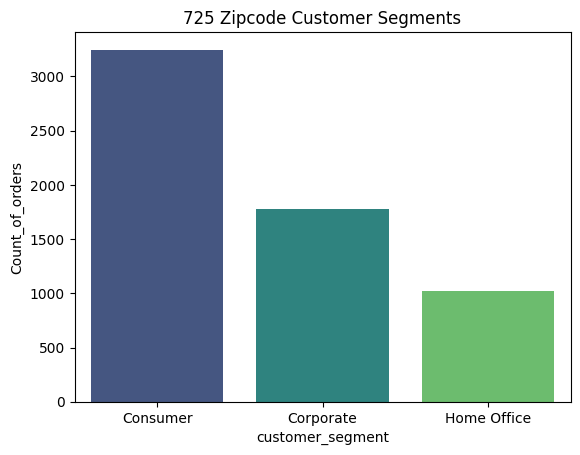

In [131]:
temp=data[data['customer_zipcode']==725.0]['customer_segment'].value_counts()
sns.barplot(x=temp.index,y=temp.values,palette='viridis')
plt.xlabel('customer_segment')
plt.ylabel('Count_of_orders')
plt.title("725 Zipcode Customer Segments")

Text(0.5, 1.0, 'Not 725 Zipcode payment_type')

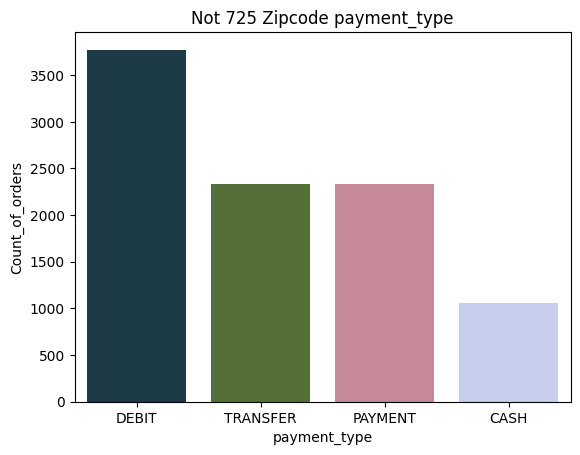

In [129]:
temp=data[data['customer_zipcode']!=725.0]['payment_type'].value_counts()
sns.barplot(x=temp.index,y=temp.values,palette='cubehelix')
plt.xlabel('payment_type')
plt.ylabel('Count_of_orders')
plt.title("Not 725 Zipcode payment_type")

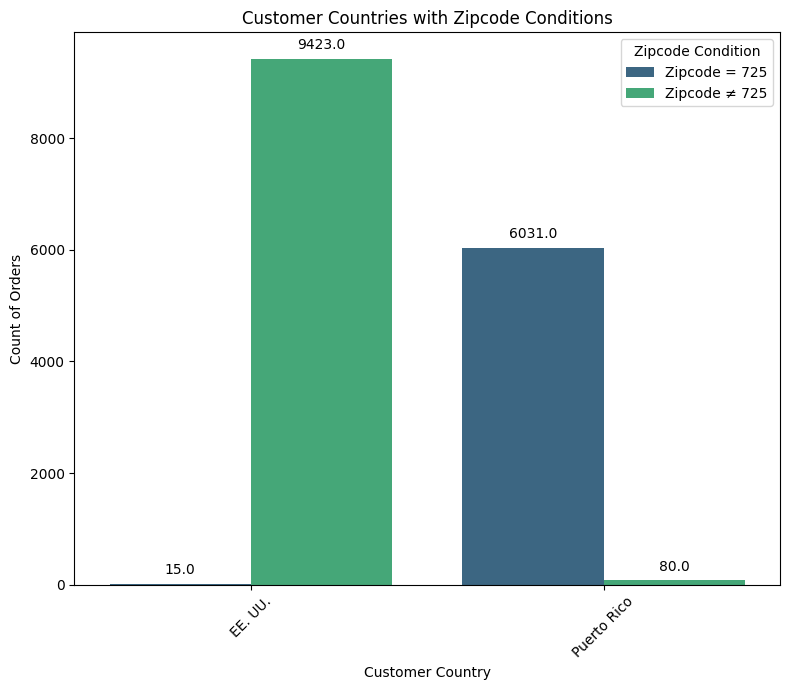

In [149]:
temp=data
temp['Zipcode Condition']=temp['customer_zipcode'].apply(lambda x: 'Zipcode = 725' if x == 725.0 else 'Zipcode ≠ 725')
plot_data = temp.groupby(['customer_country', 'Zipcode Condition']).size().reset_index(name='Count')

plt.figure(figsize=(8, 7))
ax=sns.barplot(x='customer_country', y='Count', hue='Zipcode Condition', data=plot_data, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')


plt.xlabel('Customer Country')
plt.ylabel('Count of Orders')
plt.title('Customer Countries with Zipcode Conditions')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Zipcode Condition')
plt.tight_layout()
plt.show()

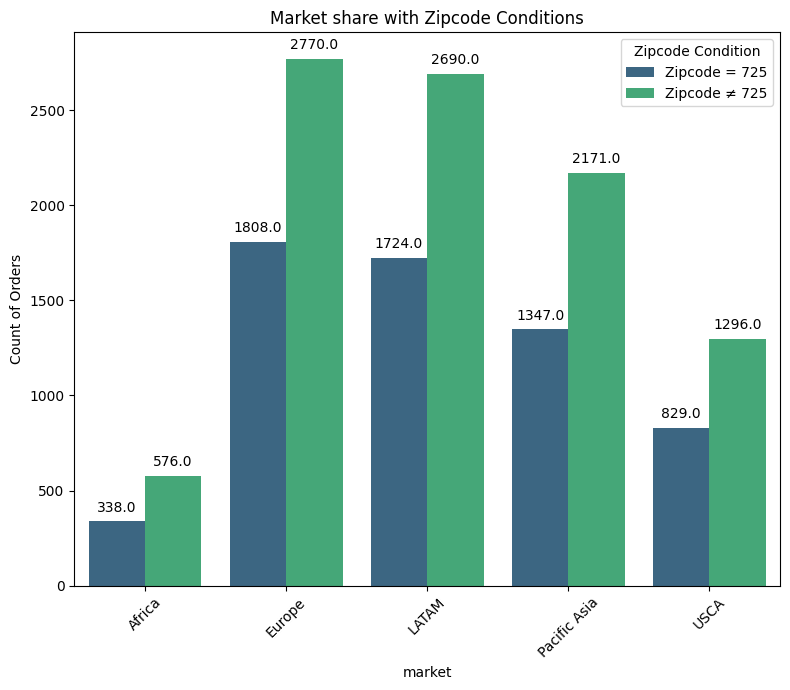

In [150]:
temp=data
temp['Zipcode Condition']=temp['customer_zipcode'].apply(lambda x: 'Zipcode = 725' if x == 725.0 else 'Zipcode ≠ 725')
plot_data = temp.groupby(['market', 'Zipcode Condition']).size().reset_index(name='Count')

plt.figure(figsize=(8, 7))
ax=sns.barplot(x='market', y='Count', hue='Zipcode Condition', data=plot_data, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')


plt.xlabel('market')
plt.ylabel('Count of Orders')
plt.title('Market share with Zipcode Conditions')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Zipcode Condition')
plt.tight_layout()
plt.show()

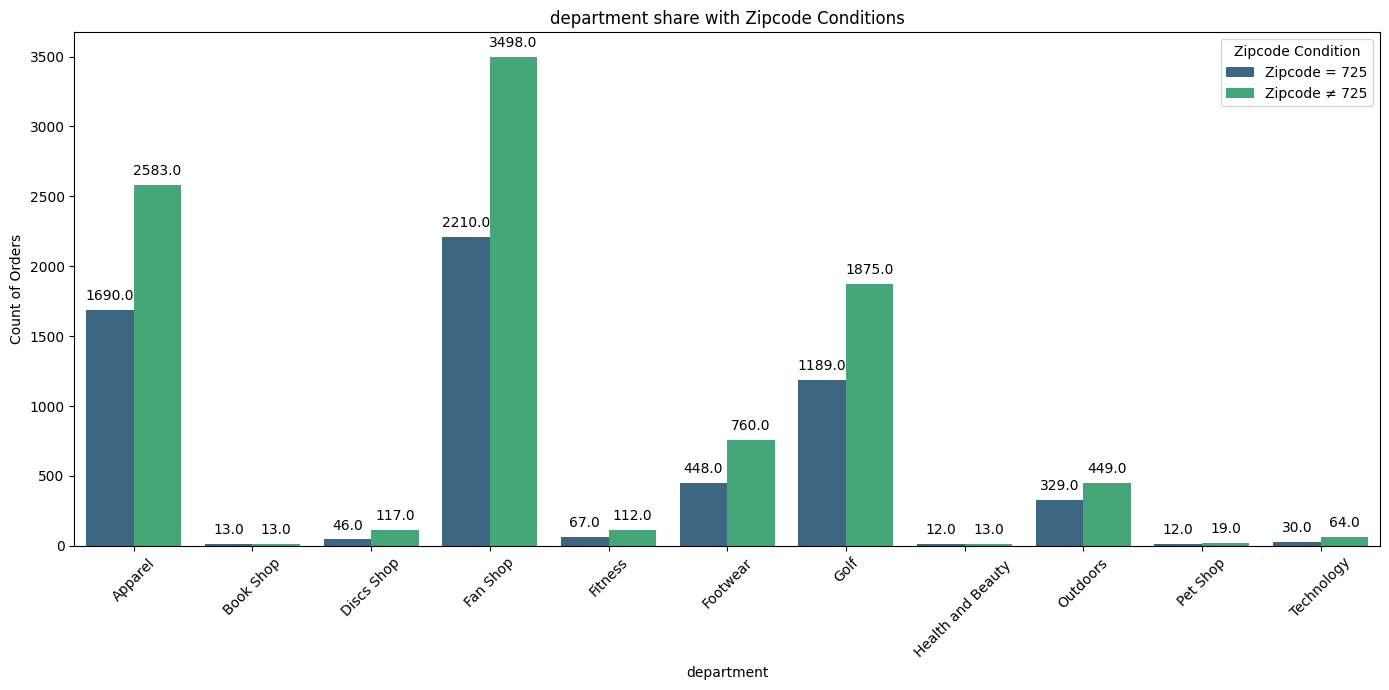

In [157]:
temp=data
temp['Zipcode Condition']=temp['customer_zipcode'].apply(lambda x: 'Zipcode = 725' if x == 725.0 else 'Zipcode ≠ 725')
plot_data = temp.groupby(['department_name', 'Zipcode Condition']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
ax=sns.barplot(x='department_name', y='Count', hue='Zipcode Condition', data=plot_data, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')


plt.xlabel('department')
plt.ylabel('Count of Orders')
plt.title('department share with Zipcode Conditions')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Zipcode Condition')
plt.tight_layout()
plt.show()

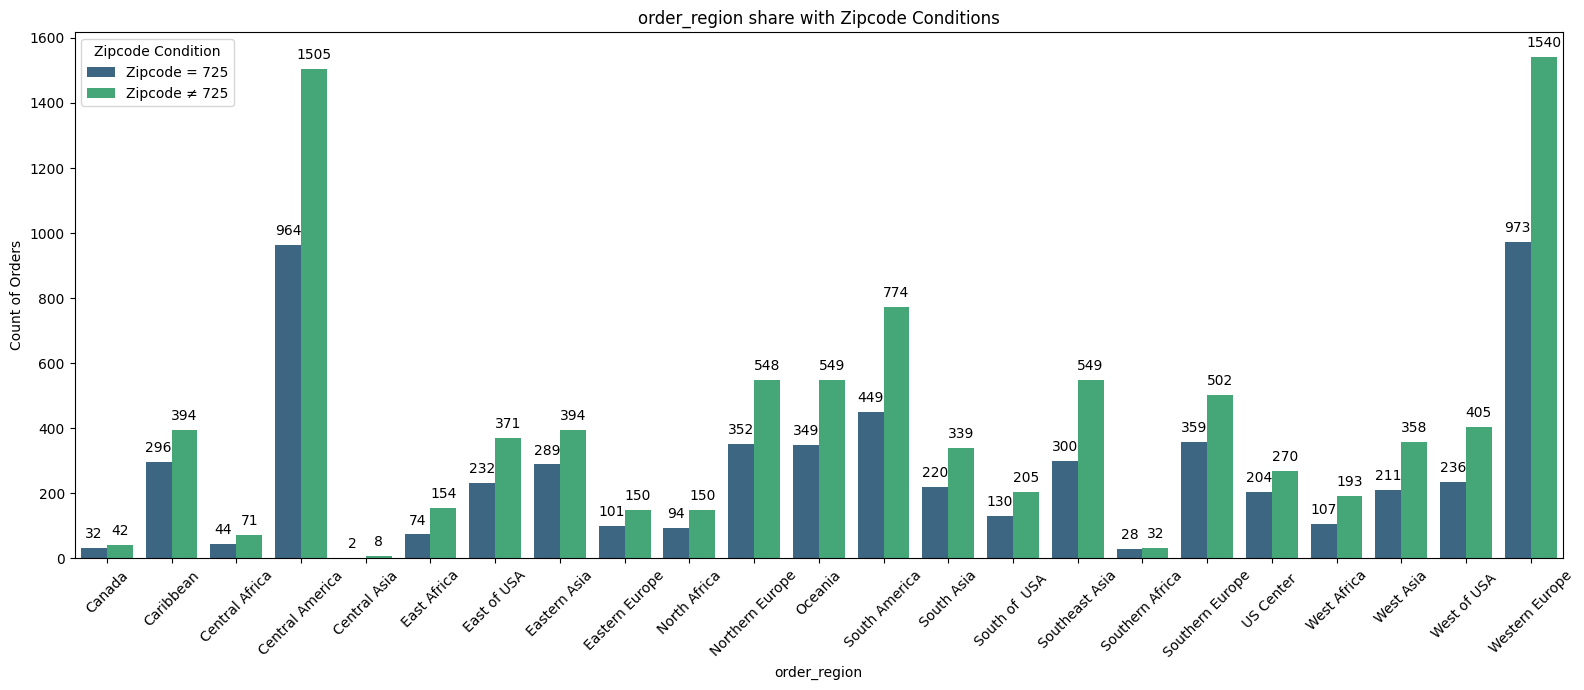

In [6]:
temp=data
temp['Zipcode Condition']=temp['customer_zipcode'].apply(lambda x: 'Zipcode = 725' if x == 725.0 else 'Zipcode ≠ 725')
plot_data = temp.groupby(['order_region', 'Zipcode Condition']).size().reset_index(name='Count')

plt.figure(figsize=(16, 7))
ax=sns.barplot(x='order_region', y='Count', hue='Zipcode Condition', data=plot_data, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')


plt.xlabel('order_region')
plt.ylabel('Count of Orders')
plt.title('order_region share with Zipcode Conditions')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Zipcode Condition')
plt.tight_layout()
plt.show()

In [5]:
temp

payment_type  profit_per_order  sales_per_customer  category_id  \
0            DEBIT         34.448338           92.490990          9.0   
1         TRANSFER         91.193540          181.990080         48.0   
2            DEBIT          8.313806           89.966430         46.0   
3         TRANSFER        -89.463196           99.150650         17.0   
4            DEBIT         44.722590          170.978240         48.0   
...            ...               ...                 ...          ...   
15544        DEBIT        108.042500          359.980000         45.0   
15545        DEBIT         22.480274          169.990000         46.0   
15546      PAYMENT         15.861091           47.497177         35.0   
15547     TRANSFER        -23.254063           49.973537         17.0   
15548     TRANSFER        177.790680          387.973020          9.0   

              category_name customer_city customer_country  customer_id  \
0          Cardio Equipment        Caguas      Puerto Rico   12097.6830   
1              Water Sports   Albuquerque          EE. UU.    5108.1045   
2      Indoor/Outdoor Games      Amarillo      Puerto Rico    4293.4478   
3                    Cleats        Caguas      Puerto Rico     546.5306   
4              Water Sports       Peabody          EE. UU.    1546.3980   
...                     ...           ...              ...          ...   
15544               Fishing        Caguas      Puerto Rico    8333.1170   
15545  Indoor/Outdoor Games        Caguas      Puerto Rico    3182.7766   
15546           Electronics       Del Rio          EE. UU.    9697.5720   
15547                Cleats        Caguas      Puerto Rico    1953.6525   
15548      Cardio Equipment        Caguas      Puerto Rico    6012.8926   

      customer_segment customer_state  customer_zipcode  department_id  \
0             Consumer             PR          725.0000            3.0   
1             Consumer             CA        92745.1600            7.0   
2             Consumer             PR         2457.7297            7.0   
3             Consumer             PR          725.0000            4.0   
4             Consumer             CA        95118.6000            7.0   
...                ...            ...               ...            ...   
15544         Consumer             PR          725.0000            7.0   
15545         Consumer             PR          725.0000            7.0   
15546         Consumer             TX        77506.5400            6.0   
15547         Consumer             PR          725.0000            4.0   
15548         Consumer             PR          725.0000            3.0   

      department_name   latitude   longitude        market    order_city  \
0            Footwear  18.359064  -66.370575        Europe         Viena   
1            Fan Shop  37.636528 -121.119630         LATAM  Buenos Aires   
2            Fan Shop  18.294100  -66.037056        Europe        Burnie   
3             Apparel  18.202435  -66.370510         LATAM     Santa Ana   
4            Fan Shop  38.719500 -122.319720         LATAM      Blumenau   
...               ...        ...         ...           ...           ...   
15544        Fan Shop  18.252699  -66.370610         LATAM       Managua   
15545        Fan Shop  18.212540  -66.370544         LATAM   Guadalajara   
15546        Outdoors  29.839552  -98.503020        Europe        Odense   
15547         Apparel  18.229500  -66.370510  Pacific Asia       Bandung   
15548        Footwear  18.229816  -66.370620         LATAM  Puerto Montt   

      order_country  order_customer_id                 order_date    order_id  \
0           Austria        12073.33600  2015-08-12 00:00:00+01:00  15081.2890   
1         Argentina         5111.04800  2017-02-10 00:00:00+00:00  56444.6840   
2            France         4134.76500  2015-01-01 00:00:00+00:00   7508.5713   
3       El Salvador          495.18726  2017-05-31 00:00:00+01:00  56196.9260   
4            Mexico  

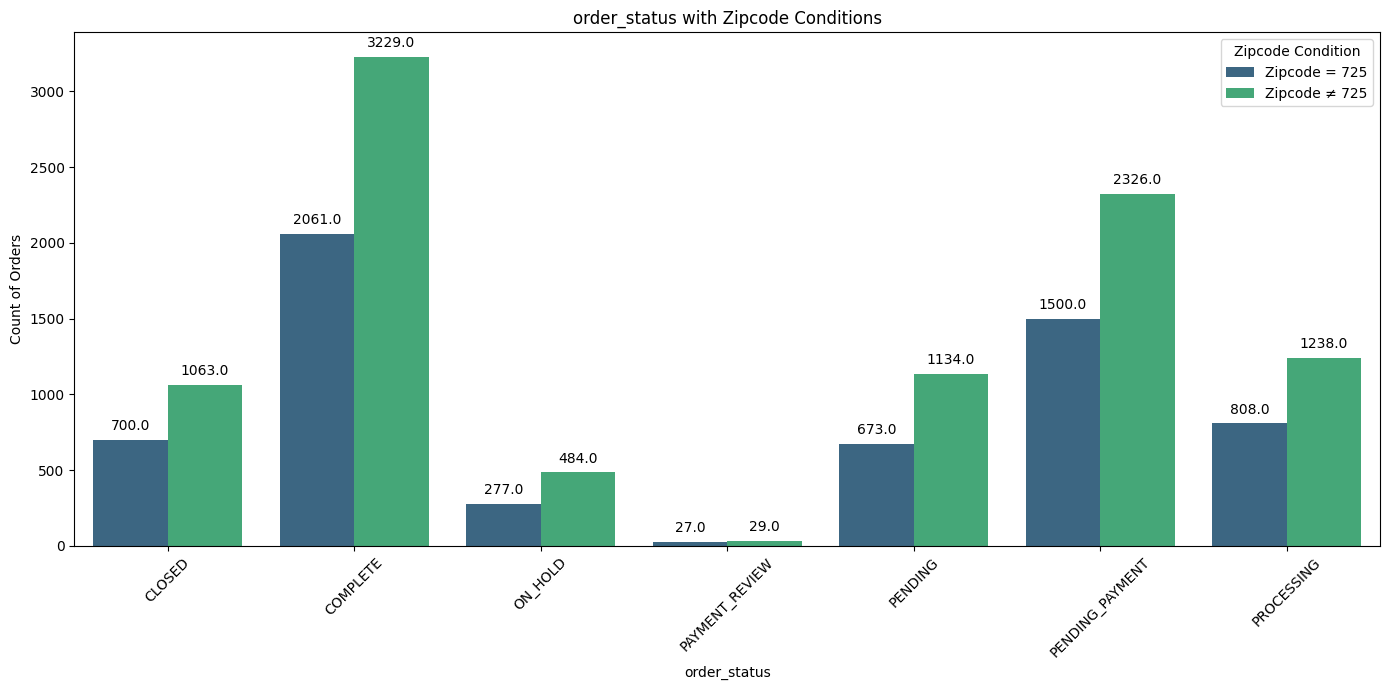

In [11]:
temp=data
temp['Zipcode Condition']=temp['customer_zipcode'].apply(lambda x: 'Zipcode = 725' if x == 725.0 else 'Zipcode ≠ 725')
plot_data = temp.groupby(['order_status', 'Zipcode Condition']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
ax=sns.barplot(x='order_status', y='Count', hue='Zipcode Condition', data=plot_data, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')


plt.xlabel('order_status')
plt.ylabel('Count of Orders')
plt.title('order_status with Zipcode Conditions')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Zipcode Condition')
plt.tight_layout()
plt.show()

In [ ]:
cols=['payment_type', 'customer_country', 'customer_segment',
       'department_name', 'market', 'order_region',
       'order_status', 'shipping_mode', 'label']

Categorization is customer and landscape

<Axes: ylabel='market'>

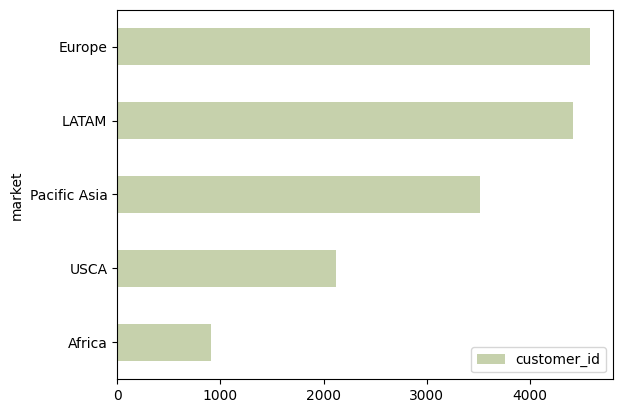

In [33]:
data.groupby('market')['customer_id'].count().reset_index().sort_values(by='customer_id',ascending=True).plot(kind='barh',x='market',y='customer_id',color=random_color())

In [41]:
data.groupby('customer_id')['order_id'].count().reset_index().sort_values(by='order_id',ascending=False)

customer_id  order_id
15518   20757.0000         4
5397     4429.3160         2
424       376.6421         2
4303     3473.0728         2
3981     3191.8354         2
...            ...       ...
5182     4241.1963         1
5183     4242.1235         1
5184     4245.5460         1
5185     4246.8450         1
7759     6429.2290         1

[15519 rows x 2 columns]

<Axes: ylabel='customer_segment'>

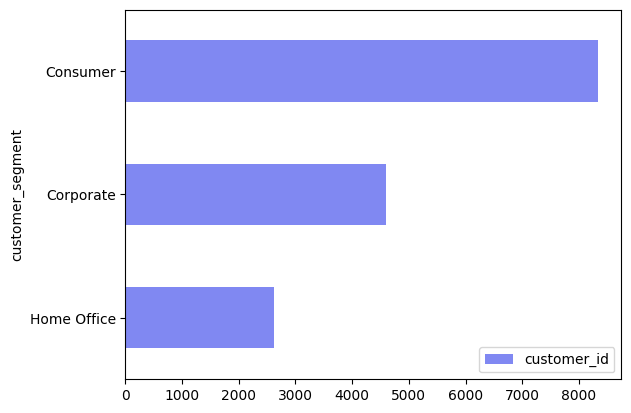

In [42]:
data.groupby('customer_segment')['customer_id'].count().reset_index().sort_values(by='customer_id',ascending=True).plot(kind='barh',x='customer_segment',y='customer_id',color=random_color())

<Axes: ylabel='department_id'>

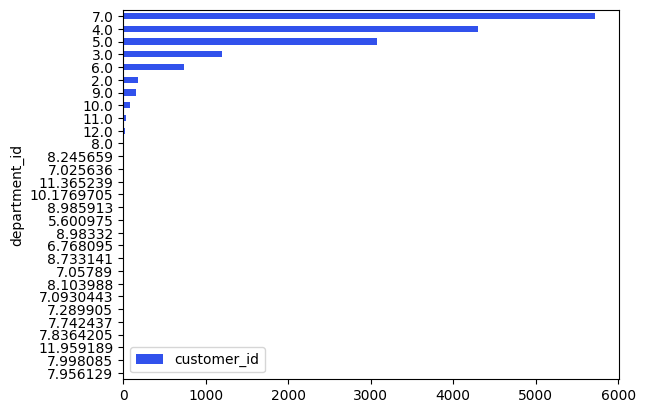

In [45]:
data.groupby('department_id')['customer_id'].count().reset_index().sort_values(by='customer_id',ascending=True).plot(kind='barh',x='department_id',y='customer_id',color=random_color())

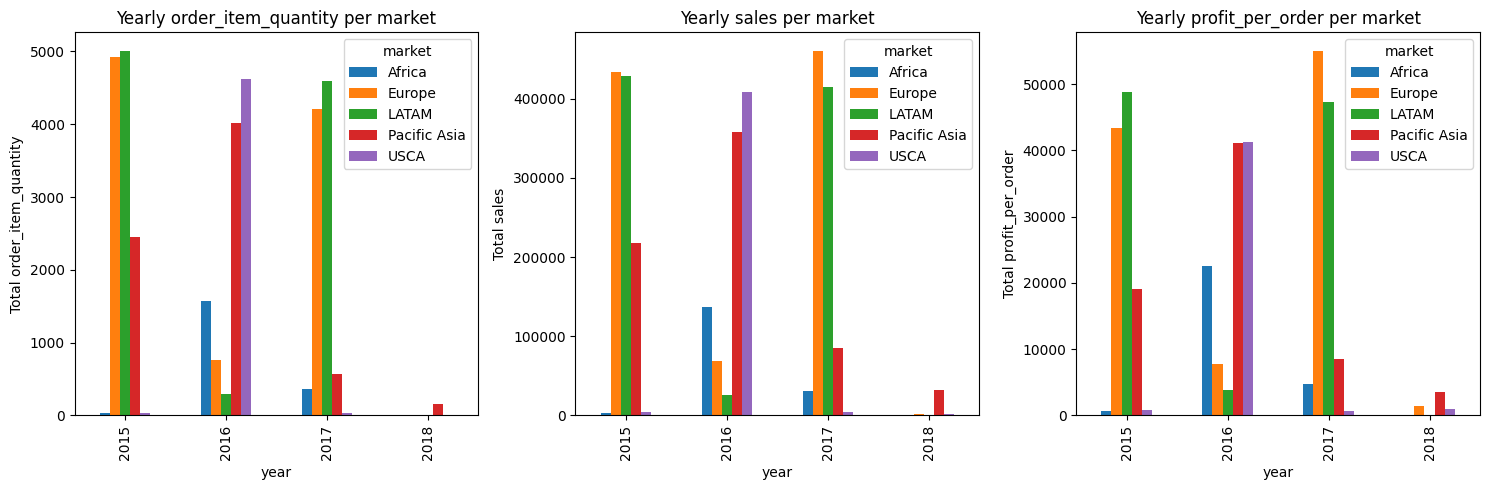

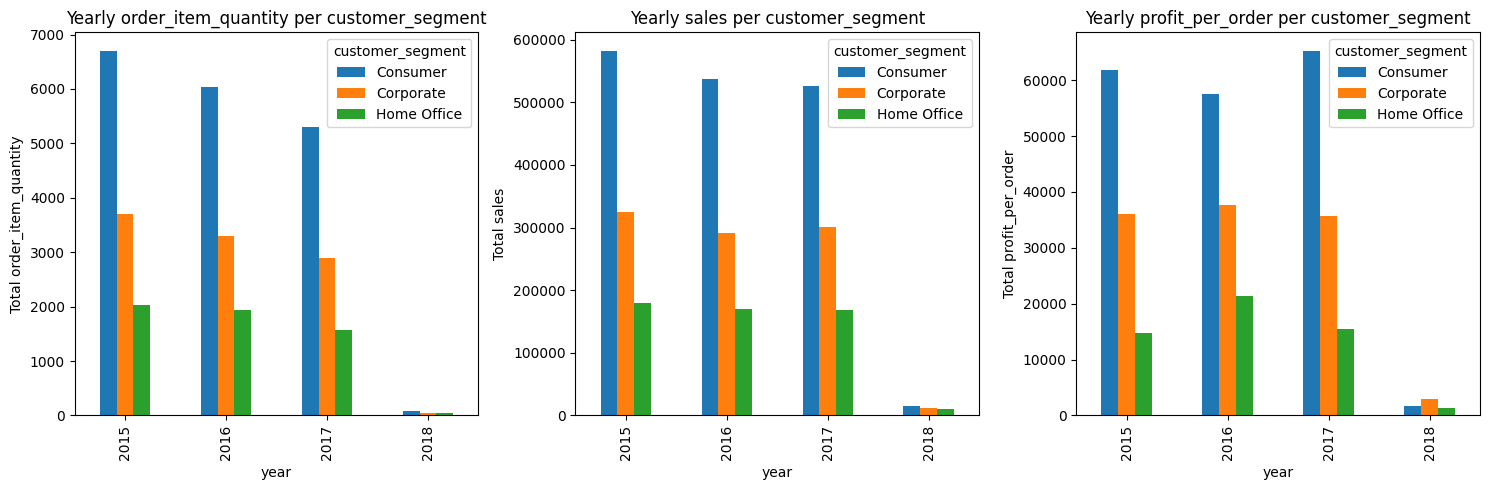

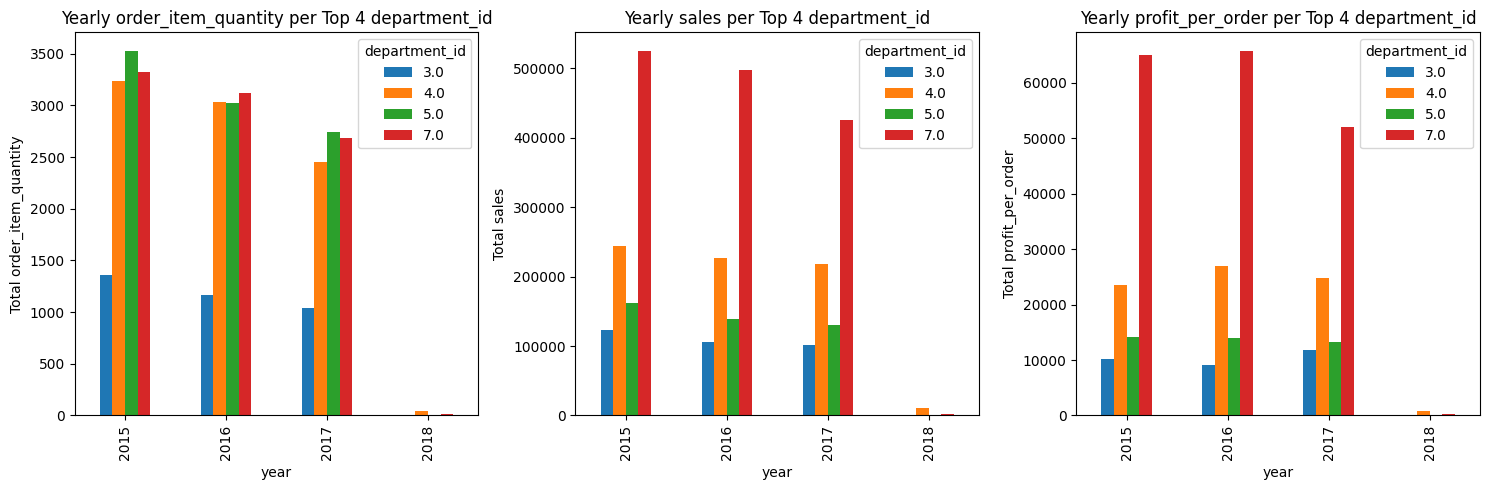

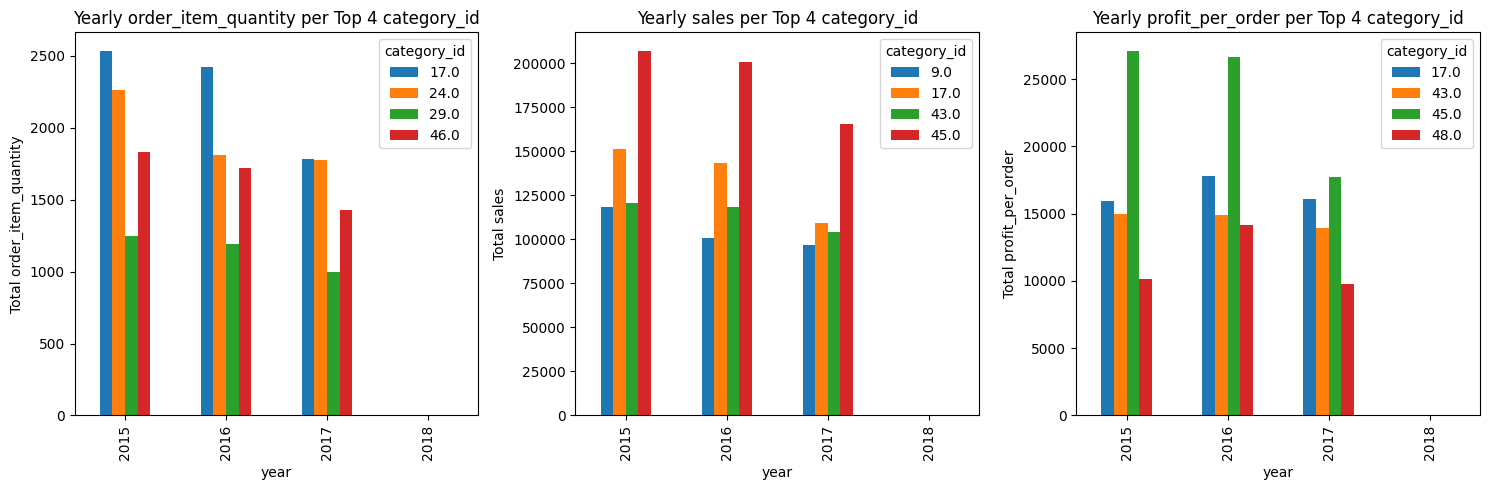

In [71]:
import matplotlib.pyplot as plt

# Extract year from 'order_date'
temp = data.copy()
temp['year'] = temp['order_date'].dt.year

cols = ['market', 'customer_segment', 'department_id', 'category_id']
cols_val = ['order_item_quantity', 'sales', 'profit_per_order']

for i in cols:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Creating 3 subplots
    
    if i == 'department_id' or i == 'category_id':
        for j in range(len(cols_val)):
            # Calculate total for each department/category and get top 4
            top_departments = temp.groupby(i)[cols_val[j]].sum().nlargest(4).index
        
            # Filter to include only top 4 departments/categories
            filtered_temp = temp[temp[i].isin(top_departments)]
        
            # Group by department/category and year, and plot for the top 4
            filtered_group = filtered_temp.groupby([i, 'year'])[cols_val[j]].sum().reset_index().pivot(index='year', columns=i, values=cols_val[j])
            filtered_group.plot(kind='bar', ax=axes[j])
            axes[j].set_title(f'Yearly {cols_val[j]} per Top 4 {i}')
            axes[j].set_ylabel(f'Total {cols_val[j]}')
    
    else:
        for j in range(len(cols_val)):  # Looping through the columns for plotting
            filtered_group = temp.groupby([i, 'year'])[cols_val[j]].sum().reset_index().pivot(index='year', columns=i, values=cols_val[j])
            filtered_group.plot(kind='bar', ax=axes[j])  # Plot in respective subplot
            axes[j].set_title(f'Yearly {cols_val[j]} per {i}')
            axes[j].set_ylabel(f'Total {cols_val[j]}')
    
    # Adjust layout to avoid overlap and show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
## Deparment wise sales and which region and category is most sold/profictatable for each department

In [18]:
data['order_region'].value_counts().index

Index(['Western Europe', 'Central America', 'South America', 'Northern Europe',
       'Oceania', 'Southern Europe', 'Southeast Asia', 'Caribbean',
       'Eastern Asia', 'West of USA ', 'East of USA', 'West Asia',
       'South Asia', 'US Center ', 'South of  USA ', 'West Africa',
       'Eastern Europe', 'North Africa', 'East Africa', 'Central Africa',
       'Canada', 'Southern Africa', 'Central Asia'],
      dtype='object', name='order_region')

## Order Volume Analysis:

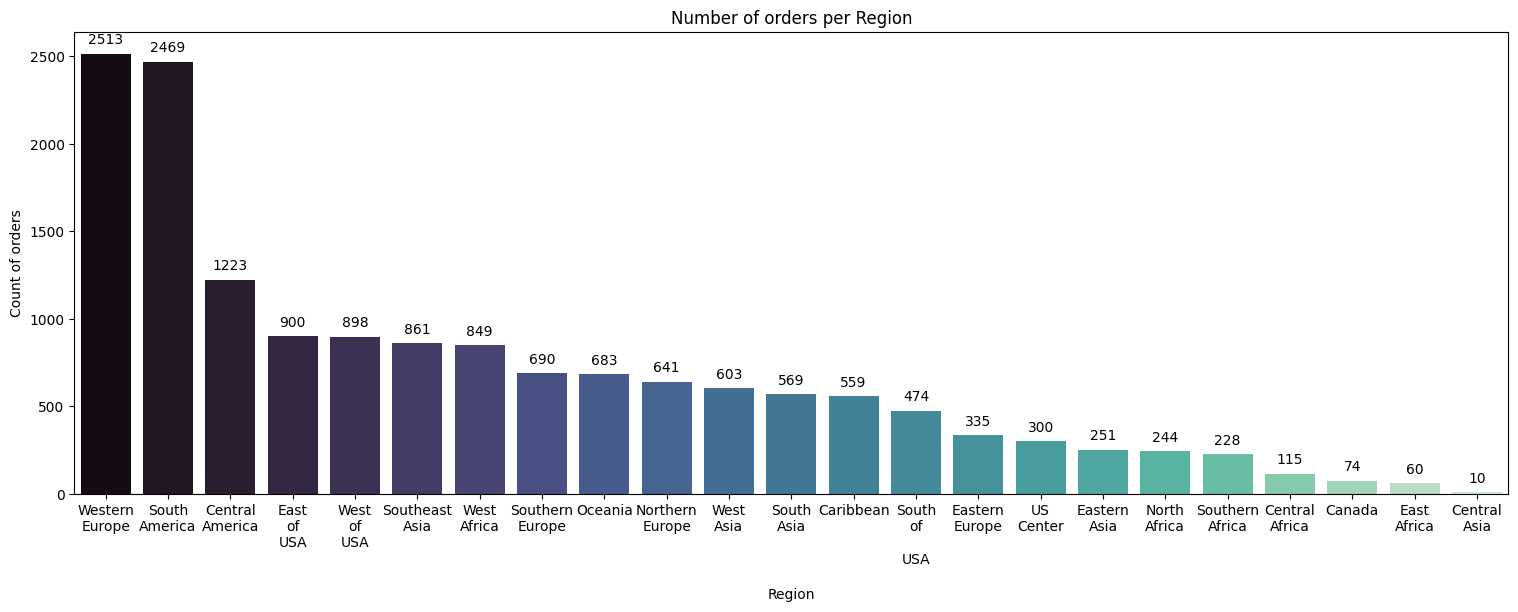

In [28]:
#Which regions have the highest number of orders?
temp=data['order_region'].value_counts()
plt.figure(figsize=(18.5,6))
ax=sns.barplot(x=temp.index,y=temp.values,palette='mako')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels([label.replace(' ', '\n') for label in data['order_region'].unique()])

plt.xlabel("Region")
plt.ylabel("Count of orders")
plt.title("Number of orders per Region")
plt.show()

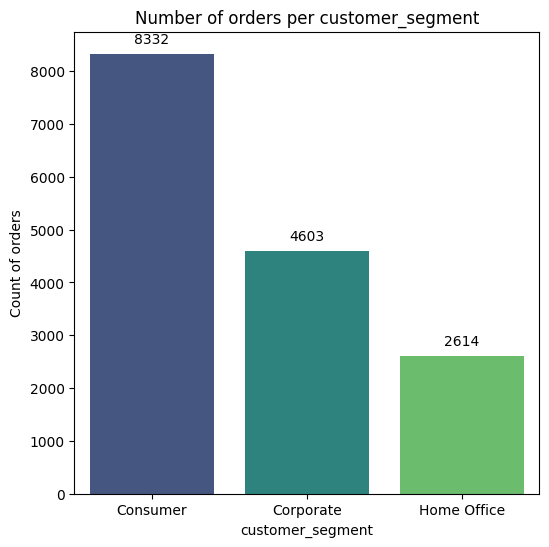

In [37]:
#How does the number of orders vary by customer segments (e.g., Consumer, Corporate, etc.)?

temp=data['customer_segment'].value_counts()
plt.figure(figsize=(6,6))
ax=sns.barplot(x=temp.index,y=temp.values,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#ax.set_xticklabels([label.replace(' ', '\n') for label in data['customer_segment'].unique()])

plt.xlabel("customer_segment")
plt.ylabel("Count of orders")
plt.title("Number of orders per customer_segment")
plt.show()


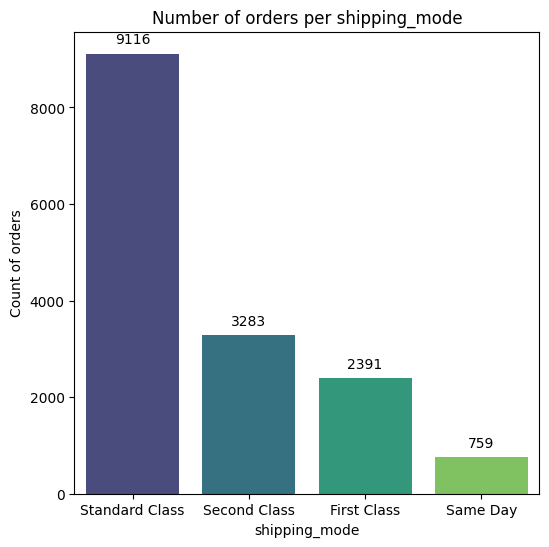

In [36]:
#How does the number of orders differ by shipping mode 
temp=data['shipping_mode'].value_counts()
plt.figure(figsize=(6,6))
ax=sns.barplot(x=temp.index,y=temp.values,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#ax.set_xticklabels([label.replace(' ', '\n') for label in data['customer_segment'].unique()])

plt.xlabel("shipping_mode")
plt.ylabel("Count of orders")
plt.title("Number of orders per shipping_mode")
plt.show()


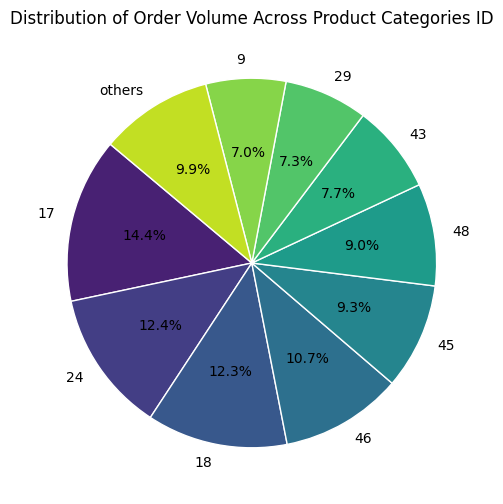

In [122]:
temp=data['category_id'].value_counts()
temp=temp.reset_index()
temp['category_id']=temp['category_id'].astype(int)
temp['category_id']=temp['category_id'].astype(str)
temp.loc[temp['count']<150,'category_id']='others'
temp=temp[temp['category_id']!='others']
temp.loc[len(temp)] = {'category_id':'others','count':1534}

plt.figure(figsize=(6, 6))  # Increase figure size
plt.pie(
    x=temp['count'],
    labels=temp['category_id'],
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(temp)),
    startangle=140,  # Rotate the start angle for better label positioning
    wedgeprops={'edgecolor': 'w'}  # Add a white edge to slices for better separation
)

# Improve label readability
plt.title("Distribution of Order Volume Across Product Categories ID")
plt.show()

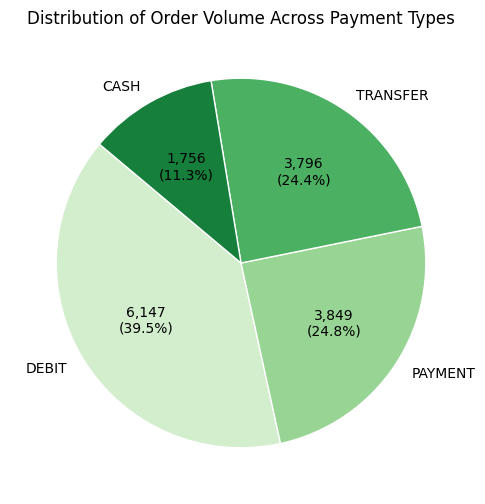

In [130]:
temp=data['payment_type'].value_counts().reset_index()

def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute:,}\n({pct:.1f}%)'

# Pie chart with custom labels
plt.figure(figsize=(6, 6))
plt.pie(
    x=temp['count'],
    labels=temp['payment_type'],
    autopct=lambda pct: func(pct, temp['count']),
    colors=sns.color_palette('Greens', len(temp)),
    startangle=140,
    wedgeprops={'edgecolor': 'w'}
)

plt.title("Distribution of Order Volume Across Payment Types")
plt.show()

## Sales Performance:

In [136]:
data['category_id'].astype(int)
temp=data
temp['category_id']=data['category_id'].astype(int)

0         9
1        48
2        46
3        17
4        48
         ..
15544    45
15545    46
15546    35
15547    17
15548     9
Name: category_id, Length: 15549, dtype: int64

In [143]:
plot_data

category_id          sales
38           45  573861.319842
15           17  403752.947713
36           43  343999.312644
7             9  317622.076816
17           24  293336.717480
..          ...            ...
42           51      62.160000
41           50      39.750000
12           14      34.781757
43           54      31.127682
44           58      28.061502

[63 rows x 2 columns]

In [154]:
plot_data

category_id          sales
38           45  573861.319842
15           17  403752.947713
36           43  343999.312644
7             9  317622.076816
17           24  293336.717480
..          ...            ...
42           51      62.160000
41           50      39.750000
12           14      34.781757
43           54      31.127682
44           58      28.061502

[63 rows x 2 columns]

### 2. Sales Performance:

In [21]:
temp = data.copy()
plot_data=temp.groupby('category_id')['sales'].sum().reset_index()
plot_data['category_id'] = plot_data['category_id']
plot_data['category_name'] = plot_data['category_id'].map(category_dict)
plot_data

category_id          sales         category_name
0             1  310083.493316      Cardio Equipment
1             2  278565.762750          Water Sports
2             3  246486.888565  Indoor/Outdoor Games
3             4  397759.764404                Cleats
4             5   26720.508021           Electronics
5             6  251893.960672        Men's Footwear
6             7  127637.085745         Shop By Sport
7             8  570423.540000               Fishing
8             9  290962.966714       Women's Apparel
9            10    9589.601465           Accessories
10           11  338823.815750      Camping & Hiking
11           12    7844.327030        Girls' Apparel
12           13   13722.720716                Crafts
13           14     306.179935                  CDs 
14           15   11162.855835      Women's Clothing
15           16    2487.514082           Video Games
16           17    4919.535421    Hunting & Shooting
17           18    5522.363930          Boxing & MMA
18           19    5772.173840      Tennis & Racquet
19           20   21555.287159              Cameras 
20           21    6283.351030     Health and Beauty
21           22   21097.516560   Children's Clothing
22           23    1363.360000     Strength Training
23           24    5102.933495                  DVDs
24           25   18301.842500                Garden
25           26    3386.212118   Fitness Accessories
26           27   10791.422583            Golf Balls
27           28    3804.753791          Pet Supplies
28           29    1164.385018          Golf Apparel
29           30    9886.819946           Golf Gloves
30           31    4341.507996       As Seen on  TV!
31           32     945.410000                  Toys
32           33    2511.770243                Hockey
33           34    3565.961906              Trade-In
34           35    2100.659500      Men's Golf Clubs
35           36    1037.631825                Books 
36           37    4489.718980        Men's Clothing
37           38    5421.347140        Sporting Goods
38           39   12062.579740            Golf Shoes
39           40    4276.504418                 Baby 
40           41    1360.936595    Women's Golf Clubs
41           42    8334.355652   Baseball & Softball
42           43   14992.541727                 Music
43           44    6160.504890  Consumer Electronics
44           45    5072.656598              Lacrosse
45           46    4468.597010                Soccer
46           47   27452.581353             Computers
47           48    4835.083580            Basketball
48           49    1689.740000      Kids' Golf Clubs

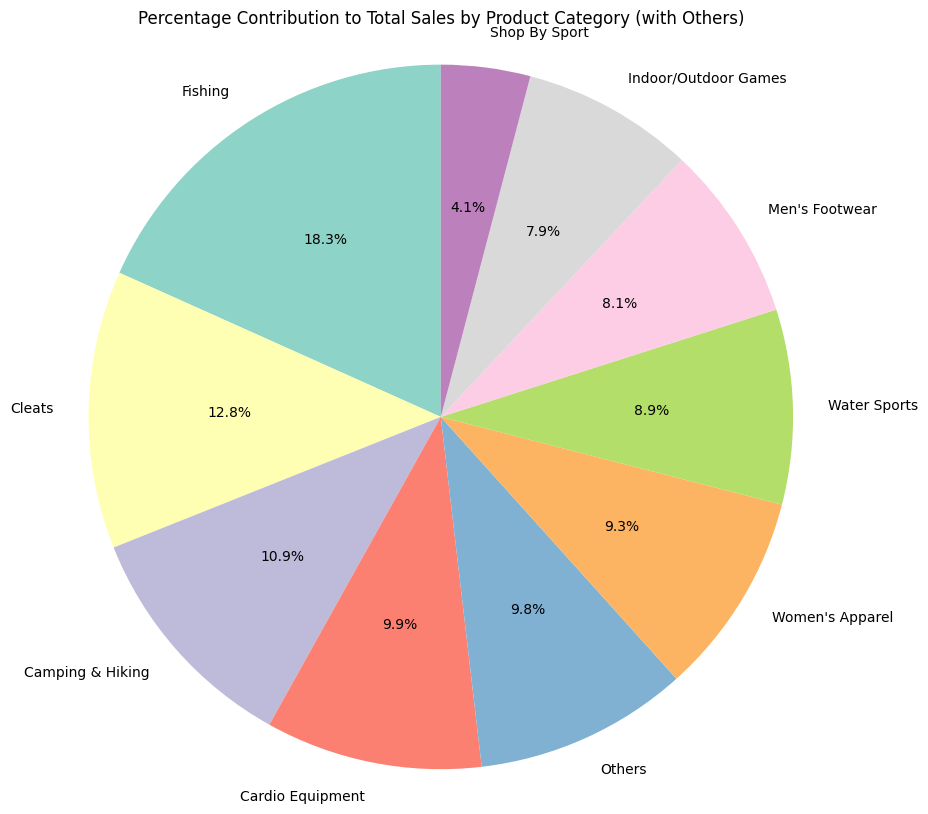

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copy data and prepare it
temp = data.copy()

# Create dictionary mapping category_id to category_name
category_dict = dict(zip(temp['category_id'], temp['category_name']))

# Group data by category and calculate total sales
plot_data = temp.groupby('category_id')['sales'].sum().reset_index()

# Convert 'category_id' to string for better display

# Replace 'category_id' with 'category_name' using the dictionary
plot_data['category_name'] = plot_data['category_id'].map(category_dict)

# Club categories with sales < 100,000 into "Others"
threshold = 100000
plot_data['category'] = plot_data['category_name'].where(plot_data['sales'] >= threshold, 'Others')

# Aggregate sales for categories and the "Others" category
plot_data = plot_data.groupby('category').agg({'sales': 'sum'}).reset_index()

# Sort values for better visualization
plot_data = plot_data.sort_values(by='sales', ascending=False)

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(plot_data['sales'], labels=plot_data['category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(plot_data)))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title("Percentage Contribution to Total Sales by Product Category (with Others)")

# Show the pie chart
plt.show()


In [24]:
plot_data

category_id          sales category_name category
7            8  570423.540000           NaN      NaN
3            4  397759.764404           NaN      NaN
10          11  338823.815750           NaN      NaN
0            1  310083.493316           NaN      NaN
8            9  290962.966714           NaN      NaN
1            2  278565.762750           NaN      NaN
5            6  251893.960672           NaN      NaN
2            3  246486.888565           NaN      NaN
6            7  127637.085745           NaN      NaN
46          47   27452.581353           NaN   Others
4            5   26720.508021           NaN   Others
19          20   21555.287159           NaN   Others
21          22   21097.516560           NaN   Others
24          25   18301.842500           NaN   Others
42          43   14992.541727           NaN   Others
12          13   13722.720716           NaN   Others
38          39   12062.579740           NaN   Others
14          15   11162.855835           NaN   Others
26          27   10791.422583           NaN   Others
29          30    9886.819946           NaN   Others
9           10    9589.601465           NaN   Others
41          42    8334.355652           NaN   Others
11          12    7844.327030           NaN   Others
20          21    6283.351030           NaN   Others
43          44    6160.504890           NaN   Others
18          19    5772.173840           NaN   Others
17          18    5522.363930           NaN   Others
37          38    5421.347140           NaN   Others
23          24    5102.933495           NaN   Others
44          45    5072.656598           NaN   Others
16          17    4919.535421           NaN   Others
47          48    4835.083580           NaN   Others
36          37    4489.718980           NaN   Others
45          46    4468.597010           NaN   Others
30          31    4341.507996           NaN   Others
39          40    4276.504418           NaN   Others
27          28    3804.753791           NaN   Others
33          34    3565.961906           NaN   Others
25          26    3386.212118           NaN   Others
32          33    2511.770243           NaN   Others
15          16    2487.514082           NaN   Others
34          35    2100.659500           NaN   Others
48          49    1689.740000           NaN   Others
22          23    1363.360000           NaN   Others
40          41    1360.936595           NaN   Others
28          29    1164.385018           NaN   Others
35          36    1037.631825           NaN   Others
31          32     945.410000           NaN   Others
13          14     306.179935           NaN   Others

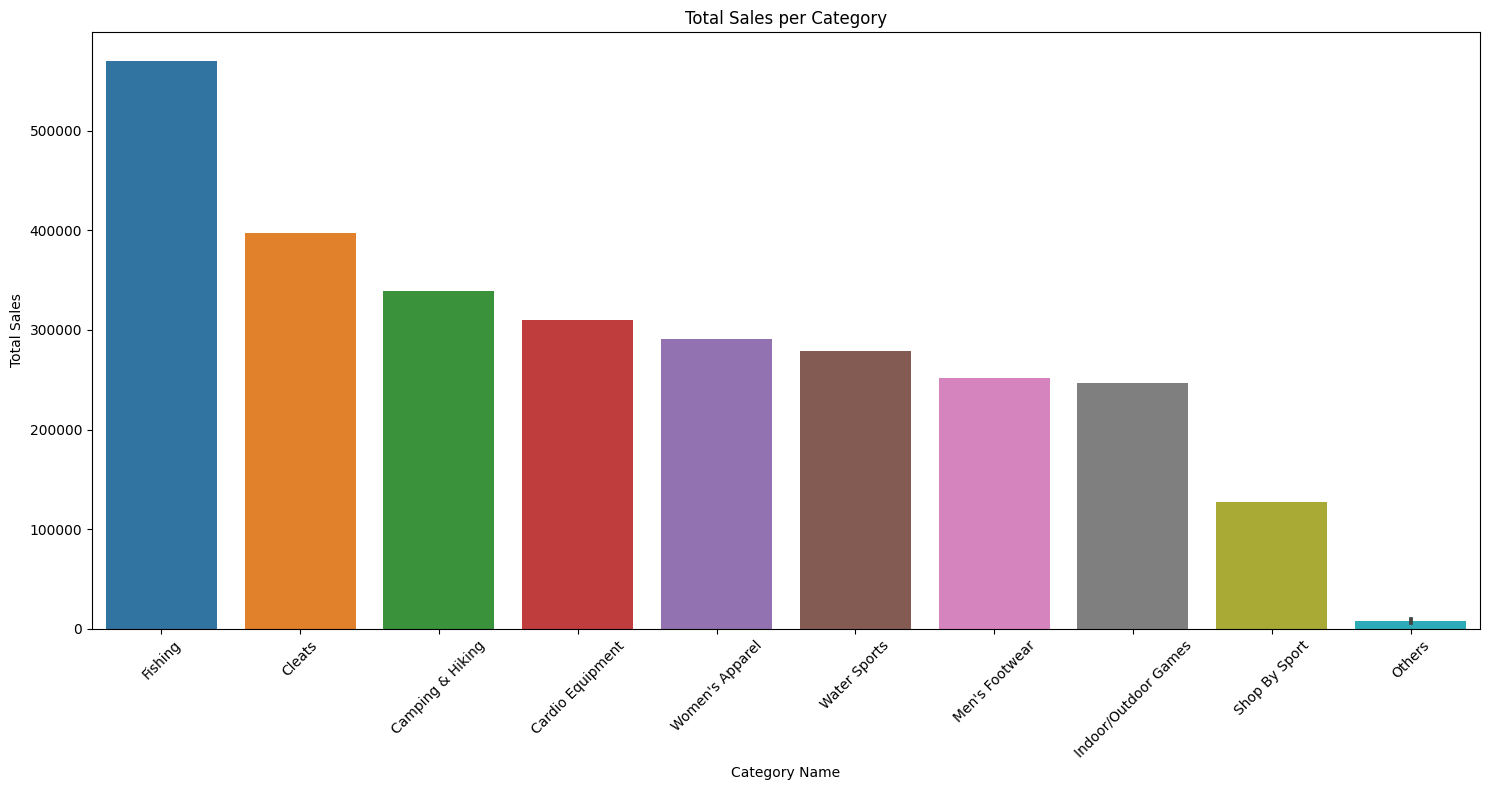

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by category and calculate total sales
plot_data = temp.groupby('category_id')['sales'].sum().reset_index()

# Create dictionary mapping category_id to category_name
category_dict = dict(zip(temp['category_id'], temp['category_name']))

# Convert 'category_id' to string for better display and map category names
plot_data['category_id'] = plot_data['category_id']
plot_data['category_name'] = plot_data['category_id'].map(category_dict)

# Club categories with sales < 100,000 into "Others"
threshold = 100000
plot_data['category'] = plot_data['category_name'].where(plot_data['sales'] >= threshold, 'Others')

# Sort values for better visualization
plot_data = plot_data.sort_values(by='sales', ascending=False)

# Plot the bar chart with category names
plt.figure(figsize=(15, 8))
sns.barplot(x='category', y='sales', data=plot_data)
plt.xlabel('Category Name')
plt.ylabel('Total Sales')
plt.title("Total Sales per Category")
plt.xticks(rotation=45)  # Rotate category names for better readability

# Show the plot
plt.tight_layout()
plt.show()


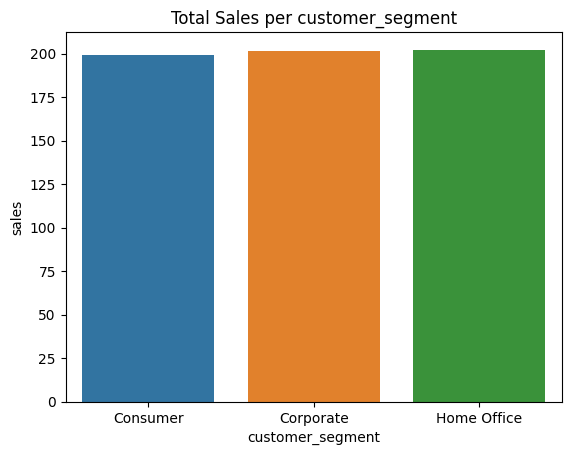

customer_segment       sales
0         Consumer  199.340673
1        Corporate  201.780166
2      Home Office  202.311569

In [27]:
#•	What is the average sales per customer segment?
temp=data
temp=temp.groupby('customer_segment')['sales'].mean().reset_index()
sns.barplot(data=temp,x='customer_segment',y='sales')
plt.xlabel('customer_segment')
plt.ylabel('sales')
plt.title("Total Sales per customer_segment")
plt.show()
temp

Text(0.5, 1.0, 'Region wise total sales')

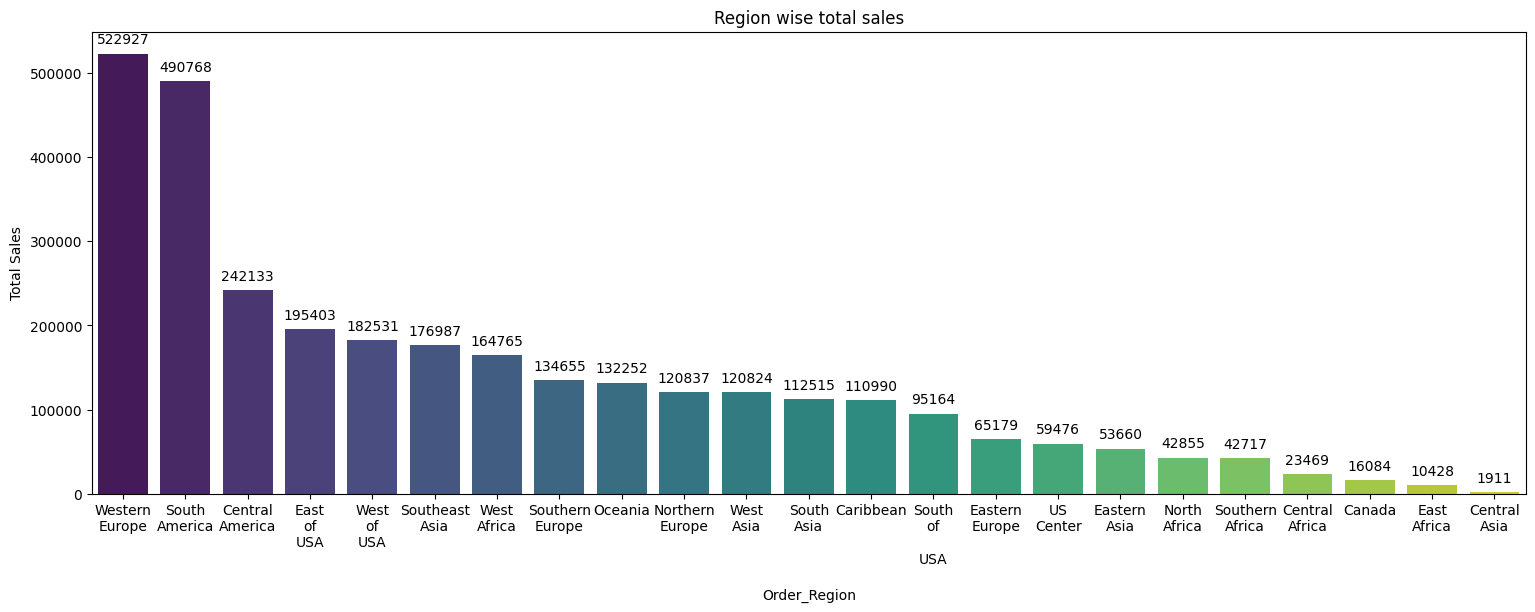

In [25]:
#•	How do sales vary across different regions and countries?
temp=data
temp=temp.groupby('order_region').sales.sum().reset_index().sort_values(by='sales', ascending=False)
plt.figure(figsize=(18.5,6))
ax=sns.barplot(data=temp,x='order_region',y='sales',palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels([label.replace(' ', '\n') for label in data['order_region'].unique()])
plt.xlabel("Order_Region")
plt.ylabel("Total Sales")
plt.title("Region wise total sales")

In [37]:
temp.head(20)

order_country          sales
143       United States  399845.051992
48               France  255701.697982
90               Mexico  248173.320347
52              Germany  168746.138449
6             Australia  162271.663043
142      United Kingdom  141820.997616
18               Brazil  131707.979413
27                China  104940.095944
70                Italy   84603.496735
64                India   81735.660440
125               Spain   77199.854014
65            Indonesia   71326.748728
37   Dominican Republic   60059.640640
40          El Salvador   59236.260747
138              Turkey   56470.050027
31                 Cuba   54397.902131
61             Honduras   53129.674390
56            Guatemala   45361.391369
99            Nicaragua   43722.740164
46            Filipinas   42182.793964

Text(0.5, 1.0, 'Country wise total sales')

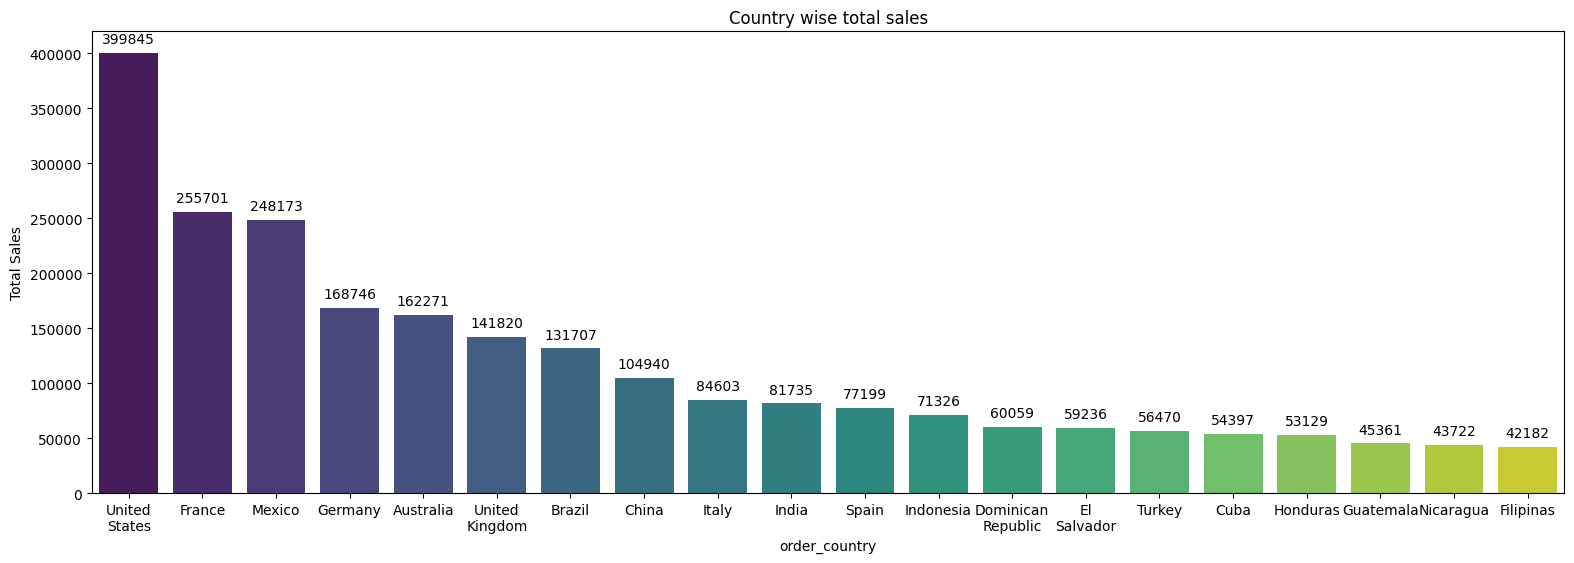

In [42]:
#•	How do sales vary across different regions and countries?
temp=data
temp=temp.groupby('order_country').sales.sum().reset_index().sort_values(by='sales', ascending=False).head(20)
plt.figure(figsize=(19,6))
ax=sns.barplot(data=temp,x='order_country',y='sales',palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels([label.replace(' ', '\n') for label in temp['order_country'].unique()])
plt.xlabel("order_country")
plt.ylabel("Total Sales")
plt.title("Country wise total sales")

Text(0.5, 1.0, 'market wise total sales')

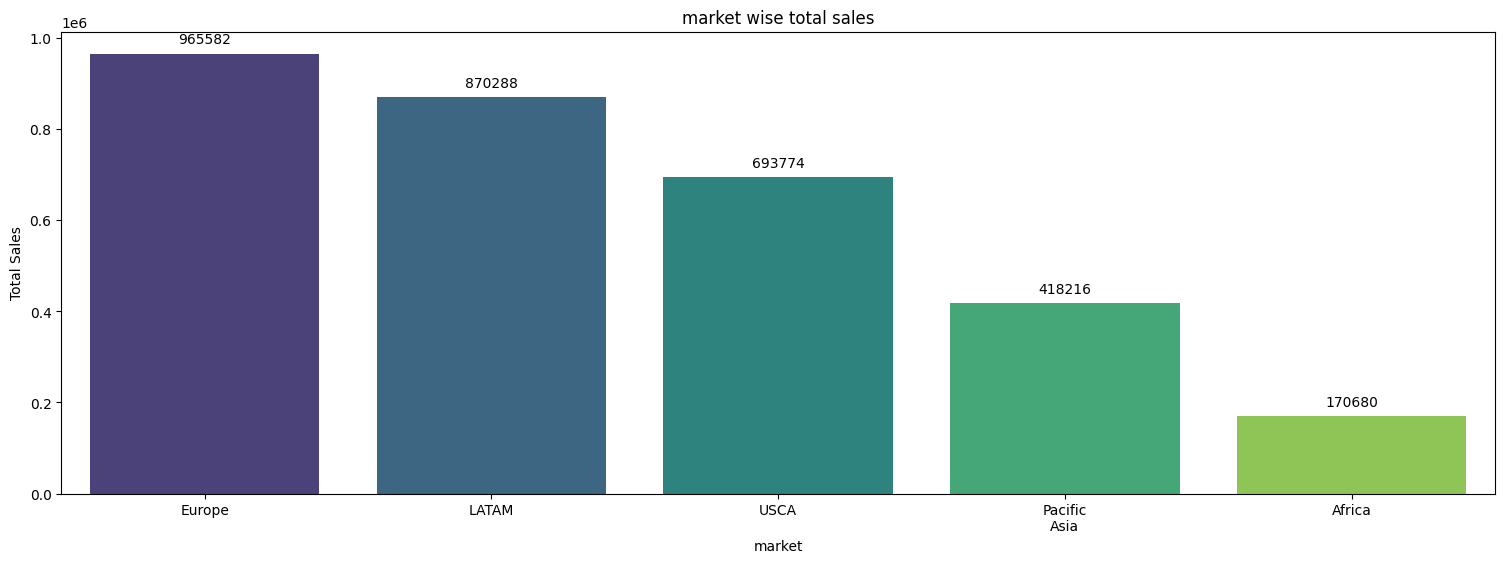

In [27]:
#•	What are the top-performing markets in terms of total sales?
temp=data
temp=temp.groupby('market').sales.sum().reset_index().sort_values(by='sales',ascending=False)
plt.figure(figsize=(18.5,6))
ax=sns.barplot(data=temp,x='market',y='sales',palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels([label.replace(' ', '\n') for label in data['market'].unique()])
plt.xlabel("market")
plt.ylabel("Total Sales")
plt.title("market wise total sales")

Text(0.5, 1.0, 'department wise total sales')

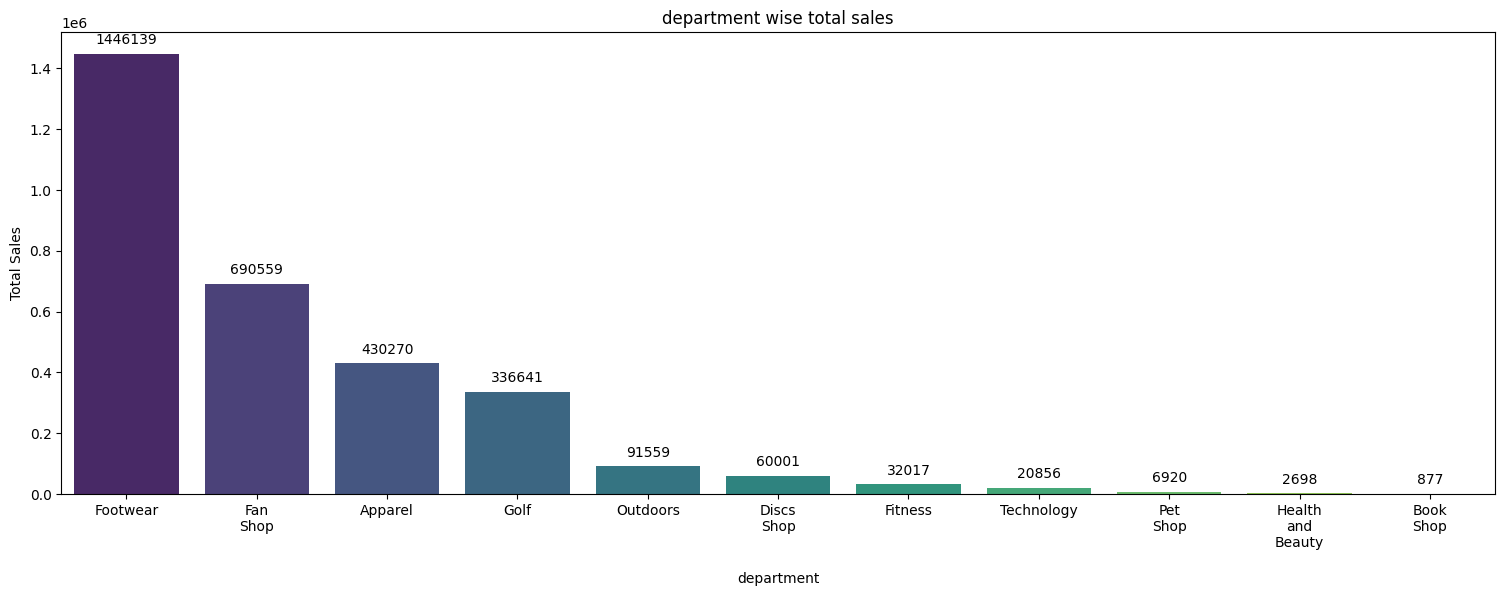

In [28]:
#•	How does the sales distribution vary by department (e.g., Footwear, Fan Shop)?

temp=data
temp=temp.groupby('department_name').sales.sum().reset_index().sort_values(by='sales',ascending=False)
plt.figure(figsize=(18.5,6))
ax=sns.barplot(data=temp,x='department_name',y='sales',palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels([label.replace(' ', '\n') for label in data['department_name'].unique()])
plt.xlabel("department")
plt.ylabel("Total Sales")
plt.title("department wise total sales")

Text(0.5, 1.0, 'order item quantity wise total sales')

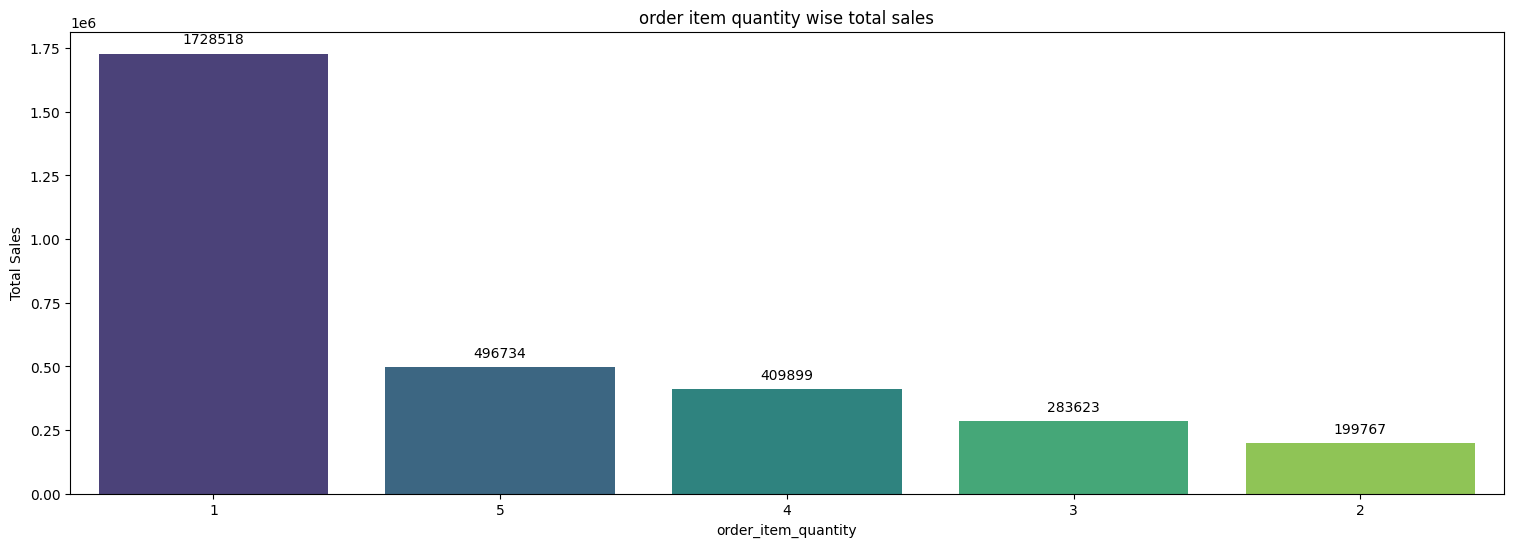

In [31]:
#•	How does the number of items ordered per order affect total sales?

temp=data
temp['order_item_quantity']=temp['order_item_quantity'].astype(int).astype(str)

temp=temp.groupby('order_item_quantity').sales.sum().reset_index().sort_values(by='sales',ascending=False)
plt.figure(figsize=(18.5,6))
ax=sns.barplot(data=temp,x='order_item_quantity',y='sales',palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
#ax.set_xticklabels([label.replace(' ', '\n') for label in data['order_item_quantity'].unique()])
plt.xlabel("order_item_quantity")
plt.ylabel("Total Sales")
plt.title("order item quantity wise total sales")

### 3. Profitability Analysis:

Text(0.5, 1.0, 'Mean profit margin per region')

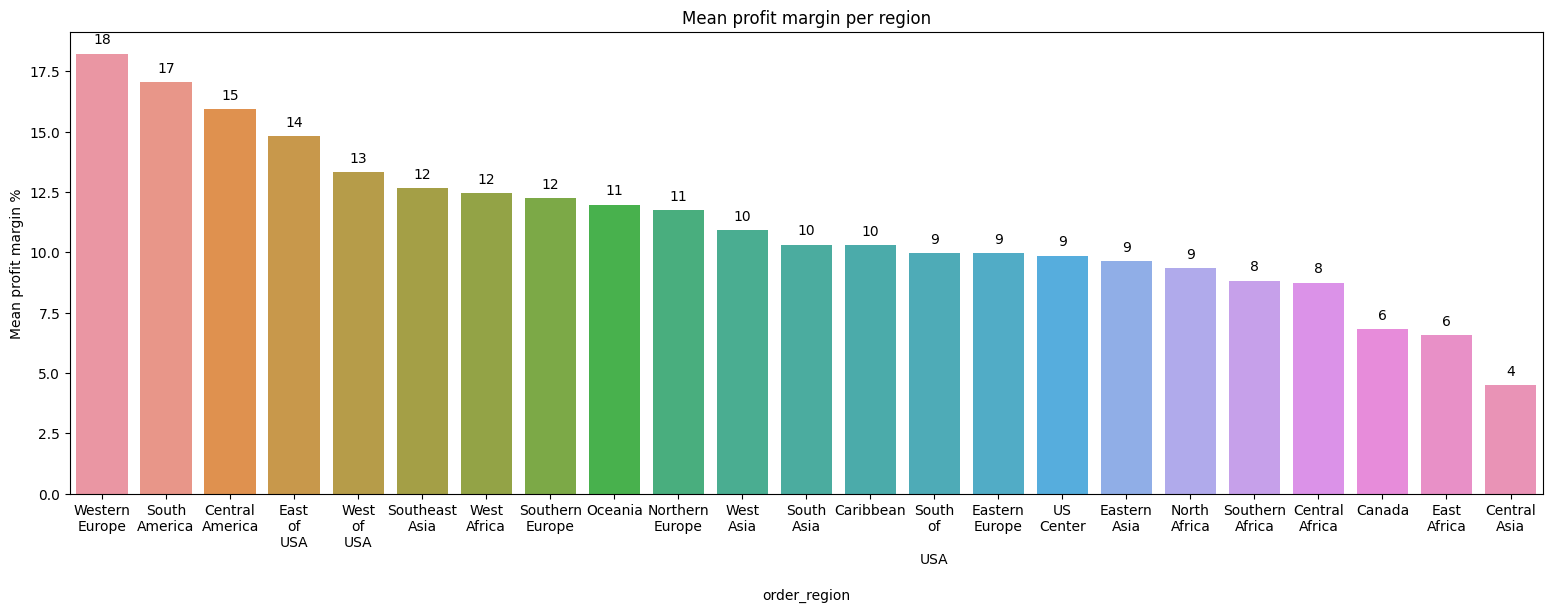

In [64]:
#•	Which regions or countries have the highest profit margins?
temp=data
temp['profit margin %']=temp['order_profit_per_order']*100/temp['sales']
temp=temp.groupby('order_region')['profit margin %'].mean().reset_index().sort_values(by='profit margin %',ascending=False)
plt.figure(figsize=(19,6))
ax=sns.barplot(y='profit margin %',x='order_region',data=temp)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels([label.replace(' ', '\n') for label in data['order_region'].unique()])

plt.xlabel("order_region")
plt.ylabel("Mean profit margin %")
plt.title("Mean profit margin per region")



In [71]:
temp=data
temp['profit margin %']=temp['order_profit_per_order']*100/temp['sales']
temp['category_id']=temp['category_id'].astype(str)
temp=temp.head(50)

In [76]:
temp

category_id  order_profit_per_order
210        45.0            73126.311446
28         17.0            53037.064484
205        43.0            45174.561947
211        46.0            33688.687505
212        48.0            33382.625180
41         24.0            33333.249311
457         9.0            28340.673586
29         18.0            19958.812570
53         29.0             9215.931247
318        64.0             3287.277746
302        63.0             2360.499218
283        62.0             1913.033175
143        37.0             1762.532730
63          3.0             1292.716203
127        36.0             1235.971192

Text(0.5, 1.0, 'Total profit margin % per Category ID')

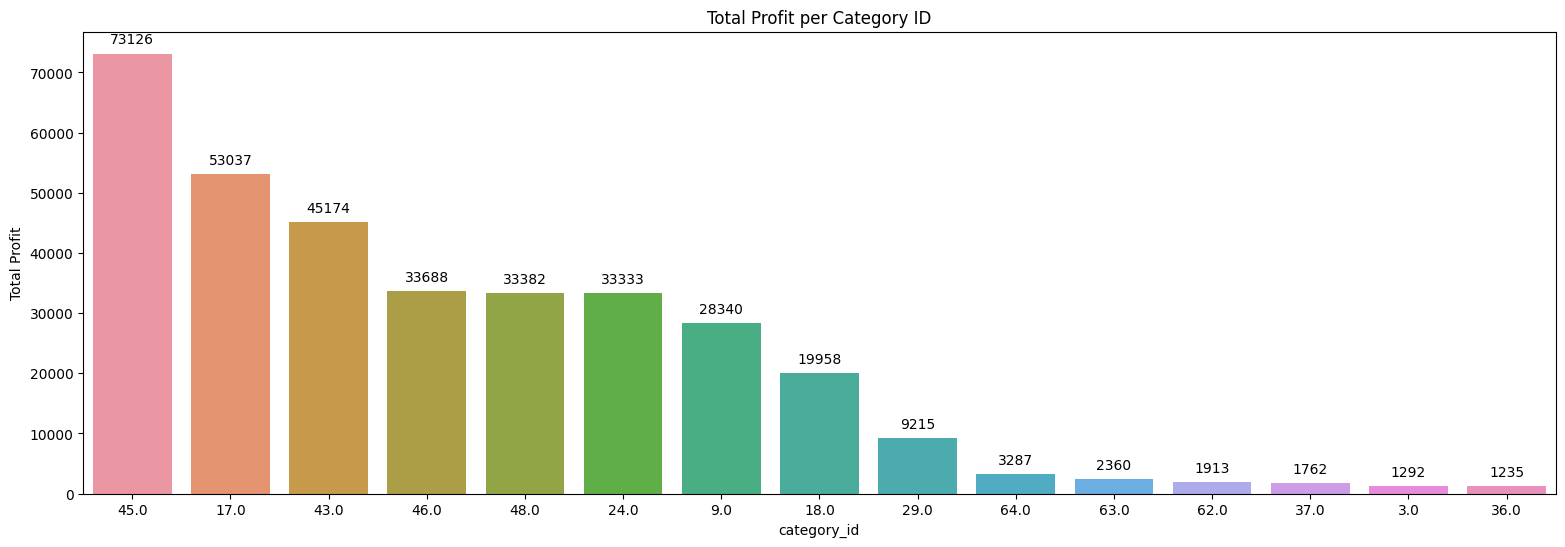

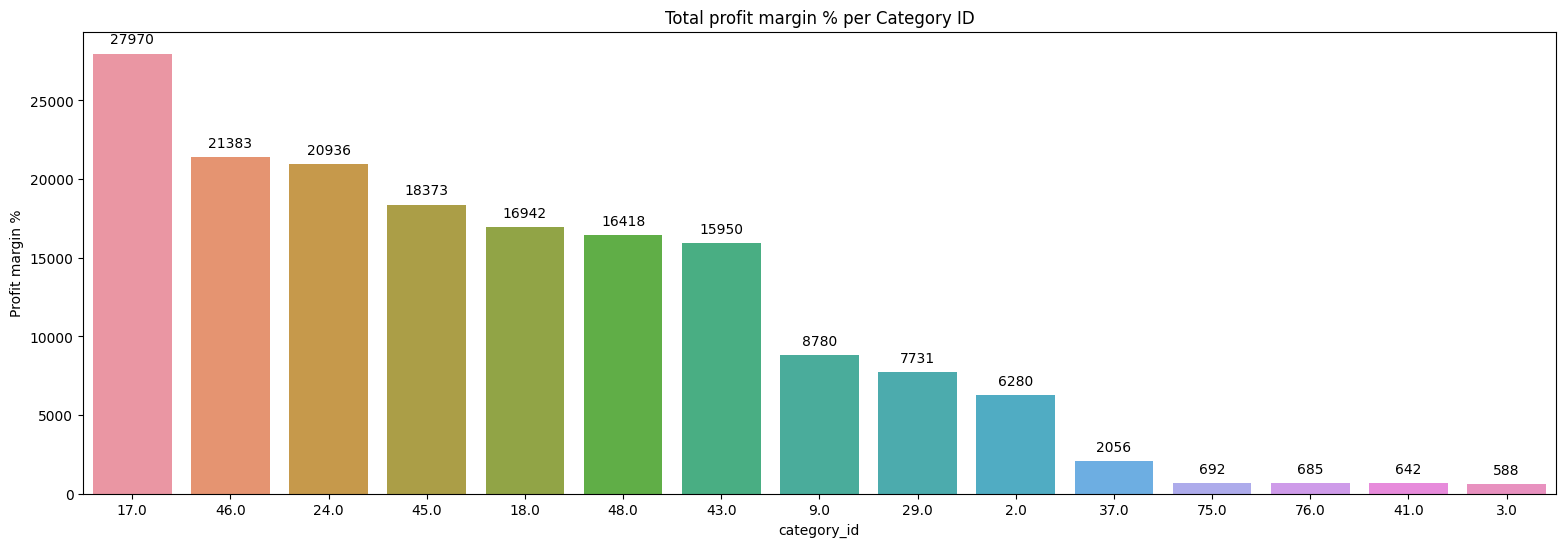

In [77]:
#•	What is the most profitable product category?
#•	Which regions or countries have the highest profit margins?
temp=data
temp['profit margin %']=temp['order_profit_per_order']*100/temp['sales']
temp['category_id']=temp['category_id'].astype(str)
temp=temp.groupby('category_id')['order_profit_per_order'].sum().reset_index().sort_values(by='order_profit_per_order',ascending=False)
temp=temp.head(15)
plt.figure(figsize=(19,6))
ax=sns.barplot(y='order_profit_per_order',x='category_id',data=temp)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels([label.replace(' ', '\n') for label in temp['category_id'].unique()])

plt.xlabel("category_id")
plt.ylabel("Total Profit")
plt.title("Total Profit per Category ID")


temp=data
temp['profit margin %']=temp['order_profit_per_order']*100/temp['sales']
temp['category_id']=temp['category_id'].astype(str)
temp=temp.groupby('category_id')['profit margin %'].sum().reset_index().sort_values(by='profit margin %',ascending=False)
temp=temp.head(15)

plt.figure(figsize=(19,6))
ax=sns.barplot(y='profit margin %',x='category_id',data=temp)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels([label.replace(' ', '\n') for label in temp['category_id'].unique()])

plt.xlabel("category_id")
plt.ylabel("Profit margin %")
plt.title("Total profit margin % per Category ID")



In [11]:
total_profit_data

customer_segment  order_profit_per_order
1        Corporate               23.749684
0         Consumer               22.346106
2      Home Office               19.441715

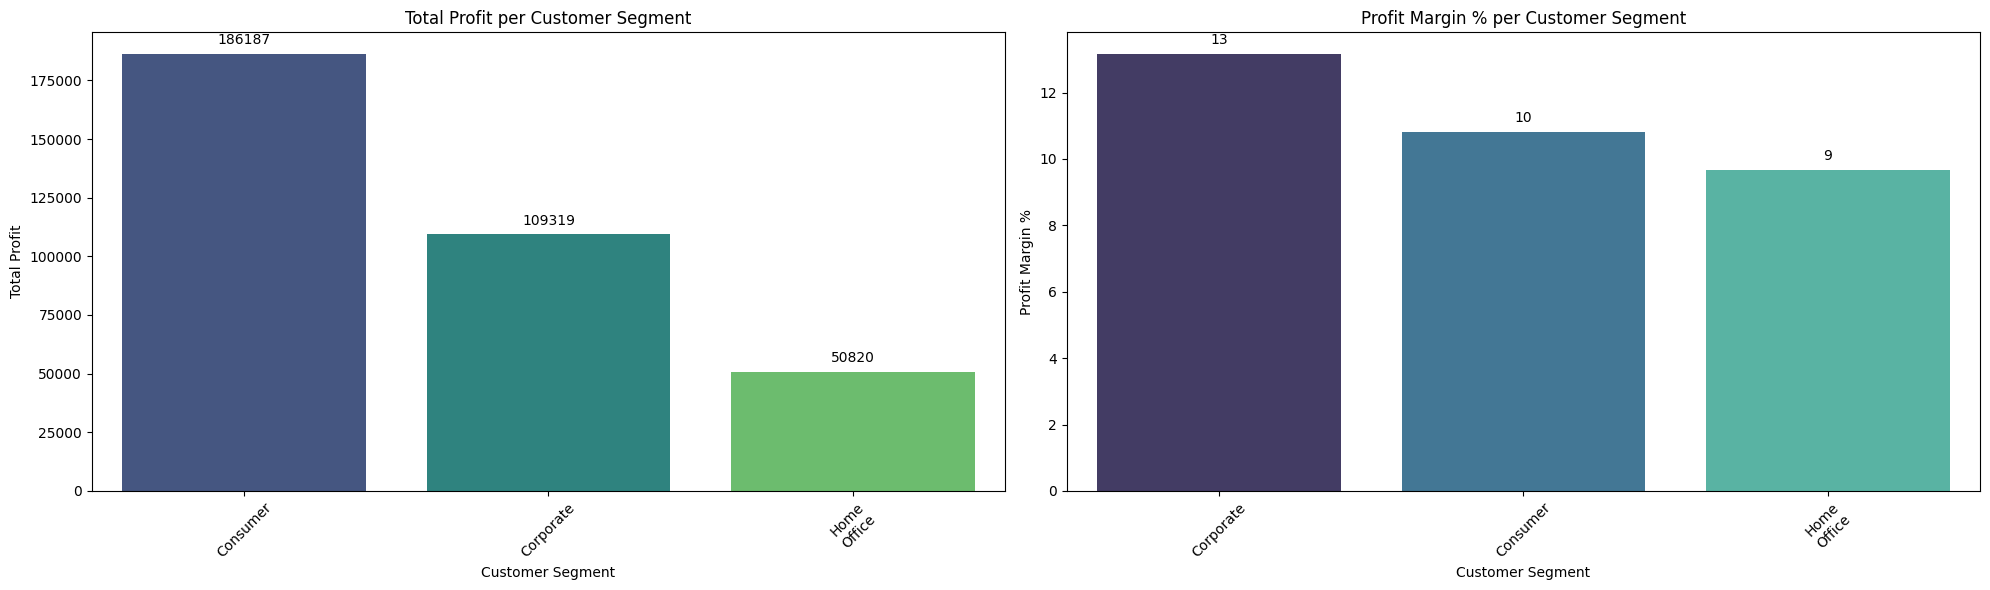

In [12]:
#•	How does profitability vary by customer segment?
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for total profit per customer segment
temp = data.copy()
temp['profit margin %'] = temp['order_profit_per_order'] * 100 / temp['sales']
temp['customer_segment'] = temp['customer_segment'].astype(str)

# Total profit per customer segment
total_profit_data = temp.groupby('customer_segment')['order_profit_per_order'].sum().reset_index().sort_values(by='order_profit_per_order', ascending=False).head(15)

# Profit margin per customer segment
profit_margin_data = temp.groupby('customer_segment')['profit margin %'].mean().reset_index().sort_values(by='profit margin %', ascending=False).head(15)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot 1: Total Profit per customer segment
ax1 = sns.barplot(y='order_profit_per_order', x='customer_segment', data=total_profit_data, ax=axes[0], palette='viridis')
ax1.set_title("Total Profit per Customer Segment")
ax1.set_xlabel("Customer Segment")
ax1.set_ylabel("Total Profit")
ax1.set_xticklabels([label.replace(' ', '\n') for label in total_profit_data['customer_segment'].unique()], rotation=45)

# Add values on top of bars for total profit
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 2: Profit Margin % per customer segment
ax2 = sns.barplot(y='profit margin %', x='customer_segment', data=profit_margin_data, ax=axes[1], palette='mako')
ax2.set_title("Profit Margin % per Customer Segment")
ax2.set_xlabel("Customer Segment")
ax2.set_ylabel("Profit Margin %")
ax2.set_xticklabels([label.replace(' ', '\n') for label in profit_margin_data['customer_segment'].unique()], rotation=45)

# Add values on top of bars for profit margin
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()


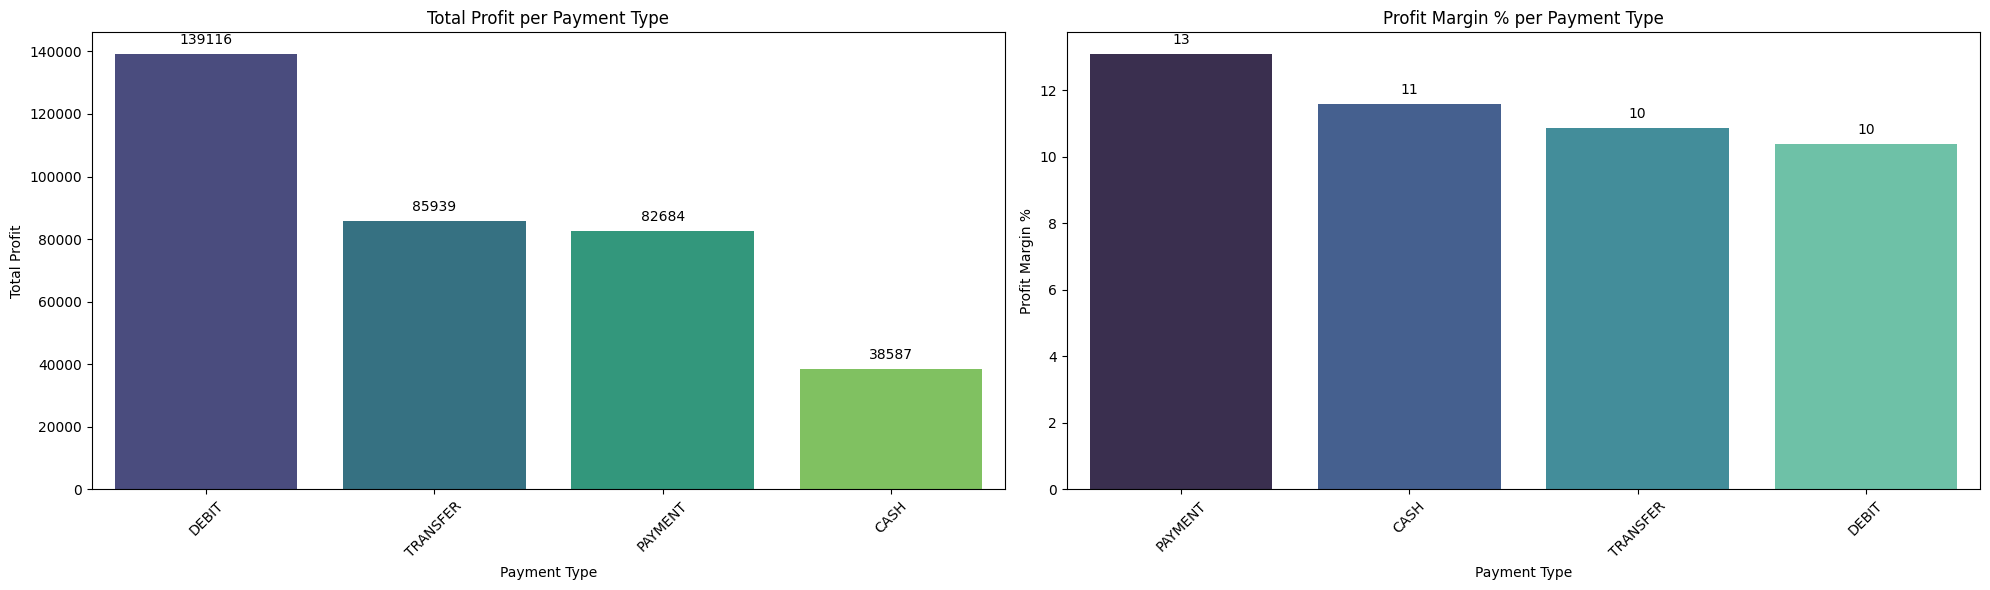

In [13]:
#•	Which payment types are associated with the highest profitability?
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for total profit per customer segment
temp = data.copy()
temp['profit margin %'] = temp['order_profit_per_order'] * 100 / temp['sales']
temp['payment_type'] = temp['payment_type'].astype(str)

# Total profit per customer segment
total_profit_data = temp.groupby('payment_type')['order_profit_per_order'].sum().reset_index().sort_values(by='order_profit_per_order', ascending=False).head(15)

# Profit margin per customer segment
profit_margin_data = temp.groupby('payment_type')['profit margin %'].mean().reset_index().sort_values(by='profit margin %', ascending=False).head(15)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot 1: Total Profit per customer segment
ax1 = sns.barplot(y='order_profit_per_order', x='payment_type', data=total_profit_data, ax=axes[0], palette='viridis')
ax1.set_title("Total Profit per Payment Type")
ax1.set_xlabel("Payment Type")
ax1.set_ylabel("Total Profit")
ax1.set_xticklabels([label.replace(' ', '\n') for label in total_profit_data['payment_type'].unique()], rotation=45)

# Add values on top of bars for total profit
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 2: Profit Margin % per customer segment
ax2 = sns.barplot(y='profit margin %', x='payment_type', data=profit_margin_data, ax=axes[1], palette='mako')
ax2.set_title("Profit Margin % per Payment Type")
ax2.set_xlabel("Payment Type")
ax2.set_ylabel("Profit Margin %")
ax2.set_xticklabels([label.replace(' ', '\n') for label in profit_margin_data['payment_type'].unique()], rotation=45)

# Add values on top of bars for profit margin
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()


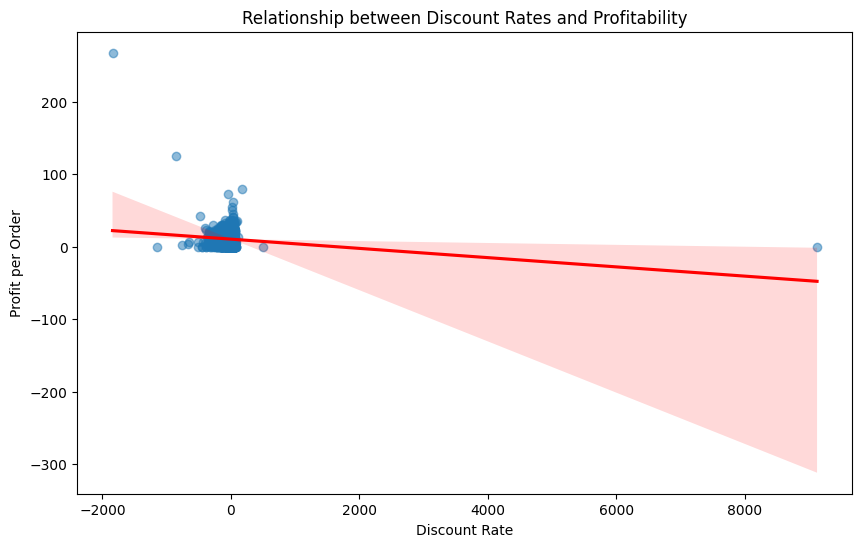

In [17]:
#•	What is the relationship between discount rates and profitability? Do higher discounts reduce profitability significantly?
temp=data.copy()
temp['profit margin %']=temp['order_profit_per_order']*100/temp['sales']
temp['Discount margin %']=temp['order_item_discount']*100/temp['sales']


plt.figure(figsize=(10, 6))
sns.regplot(x='profit margin %', y='Discount margin %', data=temp, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Discount Rate')
plt.ylabel('Profit per Order')
plt.title('Relationship between Discount Rates and Profitability')
plt.show()

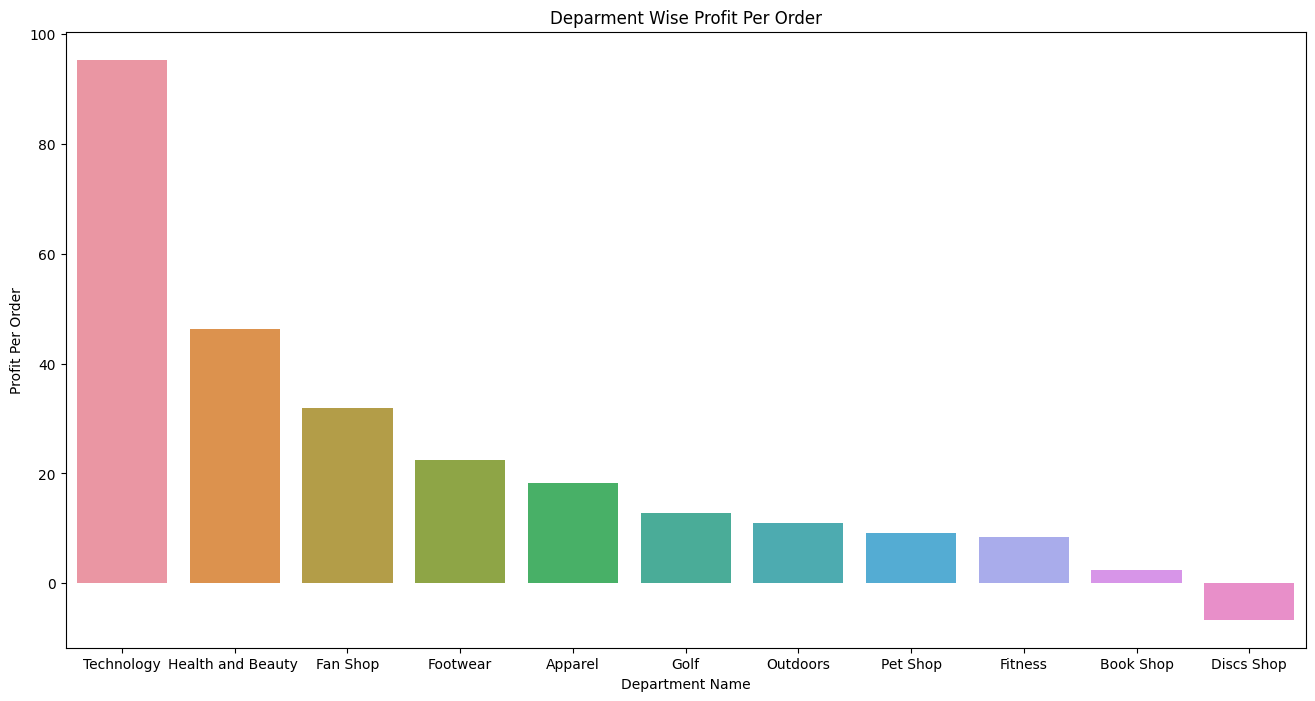

In [66]:
#•	How does the profit per order vary across different departments?
temp=data.copy()

temp = temp.groupby('department_name').agg(
    total_sales=('sales', 'sum'),
    total_profit=('order_profit_per_order', 'sum'),
    order_count=('order_id', 'count')  
).reset_index()
temp['profit_per_order']=temp['total_profit']/temp['order_count']
temp=temp.sort_values(by='profit_per_order',ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(data=temp,x='department_name',y='profit_per_order')
plt.xlabel("Department Name")
plt.ylabel("Profit Per Order")
plt.title("Deparment Wise Profit Per Order")
plt.show()

### 4. Order and Sales Trends Over Time:

In [88]:
temp

month_year    total_sales  total_orders
0  2015-01-01   77368.089998           402
1  2015-02-01   72869.038210           389
2  2015-03-01  106885.182983           533
3  2015-04-01  109259.729778           588
4  2015-05-01  106234.313612           557
5  2015-06-01  104775.165681           521
6  2015-07-01  118399.209035           590
7  2015-08-01  111680.803989           572
8  2015-09-01   77957.303338           409
9  2015-10-01   64502.056935           333
10 2015-11-01   64285.971392           332
11 2015-12-01   73116.794939           394
12 2016-01-01   74520.526638           380
13 2016-02-01   77698.725236           395
14 2016-03-01   89453.395867           450
15 2016-04-01   82217.188748           420
16 2016-05-01   89243.849272           481
17 2016-06-01  116420.911382           573
18 2016-07-01  107251.538899           554
19 2016-08-01   99005.877289           502
20 2016-09-01   80176.296335           408
21 2016-10-01   70053.155753           357
22 2016-11-01   61930.412062           321
23 2016-12-01   50389.885789           260
24 2017-01-01   57906.148198           299
25 2017-02-01   60050.736465           320
26 2017-03-01  116228.499795           580
27 2017-04-01  106783.766871           530
28 2017-05-01  101443.943809           504
29 2017-06-01  101049.485701           486
30 2017-07-01  105108.756062           492
31 2017-08-01  101642.248493           482
32 2017-09-01   92802.703216           396
33 2017-10-01   52775.184707           198
34 2017-11-01   51223.406698           166
35 2017-12-01   49112.184151           209
36 2018-01-01   24658.310885           125
37 2018-02-01     419.930000             3
38 2018-03-01    2712.176150            10
39 2018-04-01    1767.600000             6
40 2018-05-01     299.950000             1
41 2018-06-01     530.504120             3
42 2018-07-01     199.920000             2
43 2018-08-01     632.540000             2
44 2018-09-01     393.890340             2
45 2018-10-01     262.548574             3
46 2018-11-01    1224.928650             6
47 2018-12-01    3618.245500             3

/tmp/ipykernel_36/4097104473.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  temp['month_year'] = temp['order_date'].dt.to_period('M').dt.to_timestamp()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/c

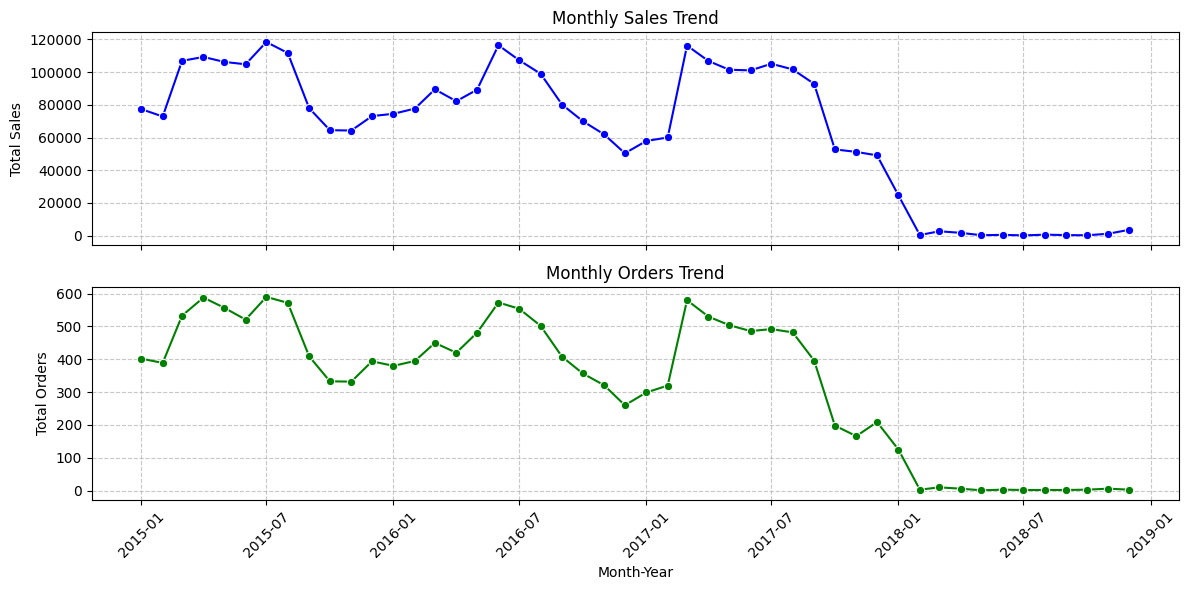

In [90]:
#•	Are there seasonal patterns in the number of orders or sales?

temp=data.copy()
temp['order_date']=pd.to_datetime(temp['order_date'],utc=True)
temp['month_year'] = temp['order_date'].dt.to_period('M').dt.to_timestamp()
temp=temp.sort_values(by='month_year',ascending=True)
temp=temp.groupby('month_year').agg(
    total_sales=('sales','sum'),
    total_orders=('order_id','count')
).reset_index()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)

sns.lineplot(data=temp, x='month_year', y='total_sales', marker='o', color='blue', ax=axes[0])
axes[0].set_ylabel('Total Sales')
axes[0].set_title('Monthly Sales Trend')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot total orders
sns.lineplot(data=temp, x='month_year', y='total_orders', marker='o', color='green', ax=axes[1])
axes[1].set_xlabel('Month-Year')
axes[1].set_ylabel('Total Orders')
axes[1].set_title('Monthly Orders Trend')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Optimize layout
plt.tight_layout()

# Display the plots
plt.show()




/tmp/ipykernel_36/2860405999.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  temp['month_year'] = temp['order_date'].dt.to_period('M').dt.to_timestamp()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


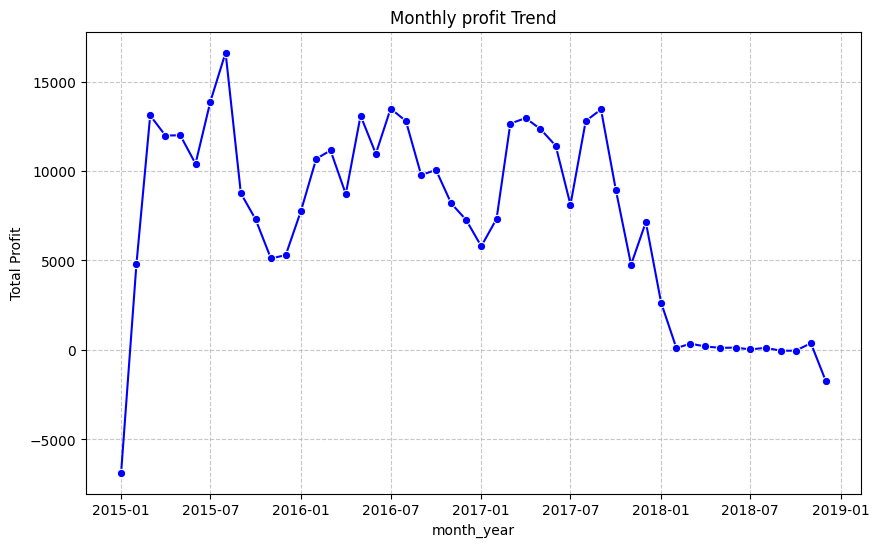

In [99]:
#•	How does profitability fluctuate throughout the year or across months?
temp=data.copy()
temp['order_date']=pd.to_datetime(temp['order_date'],utc=True)
temp['month_year'] = temp['order_date'].dt.to_period('M').dt.to_timestamp()
temp=temp.sort_values(by='month_year',ascending=True)
temp=temp.groupby('month_year').agg(Profit=('order_profit_per_order','sum')).reset_index()

plt.figure(figsize=(10,6))

sns.lineplot(data=temp, x='month_year', y='Profit', marker='o', color='blue')
plt.ylabel('Total Profit')
plt.title('Monthly profit Trend')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 5. Customer Behavior Insights:

In [103]:
#Which customer countries or regions are associated with repeat orders?
temp=data.copy()
temp=temp.groupby("order_region")['order_id'].count().reset_index()


In [112]:
#Number of repeat orders
print("number of Repeat Orders-->" +str(temp['customer_id'].value_counts()[temp['customer_id'].value_counts()>1].sum()))
print("number of unique Orders-->" +str(temp['customer_id'].value_counts()[temp['customer_id'].value_counts()==1].sum()))


number of Repeat Orders-->58
number of unique Orders-->15491


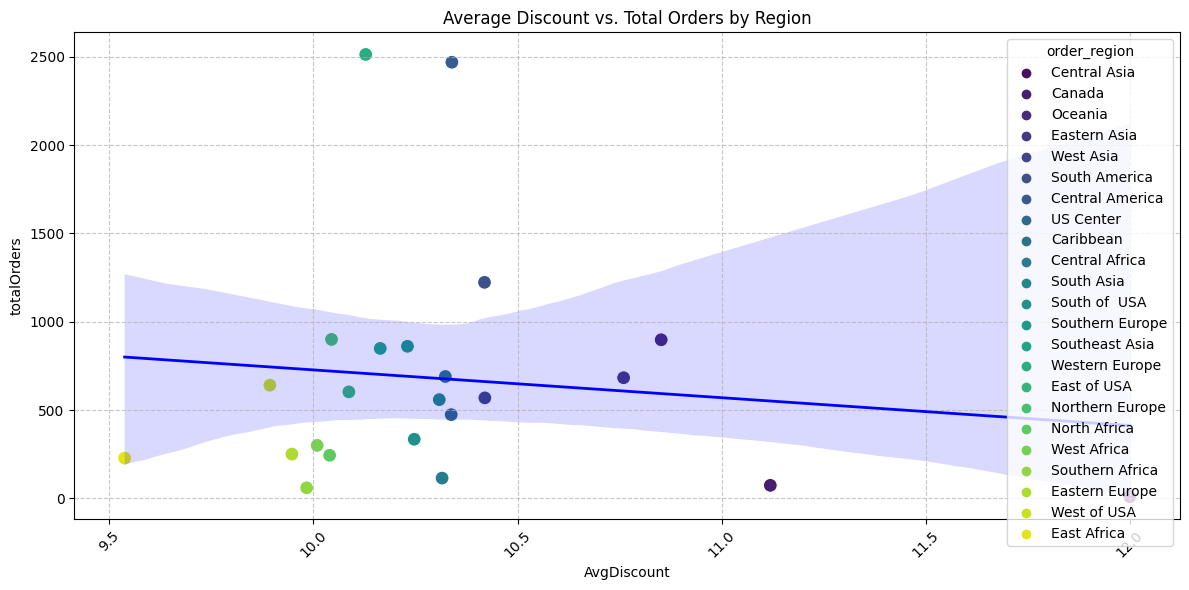

In [122]:
#•	How do customers from different countries or segments respond to discounts (e.g., Do they place more orders with discounts)?
#Region wise which has more discount and do they give more orders
temp=data.copy()
temp=temp.groupby('order_region').agg(
    AvgDiscount=('order_item_discount_rate','mean'),
    totalOrders=('order_id','count')
).reset_index()
temp['AvgDiscount']=temp['AvgDiscount']*100
temp=temp.sort_values(by='AvgDiscount',ascending=False)
sns.scatterplot(data=temp,x='AvgDiscount',y='totalOrders')
plt.xlabel("AvgDiscount")
plt.ylabel("totalOrders")
plt.title("Avg Discount - Total Orders")

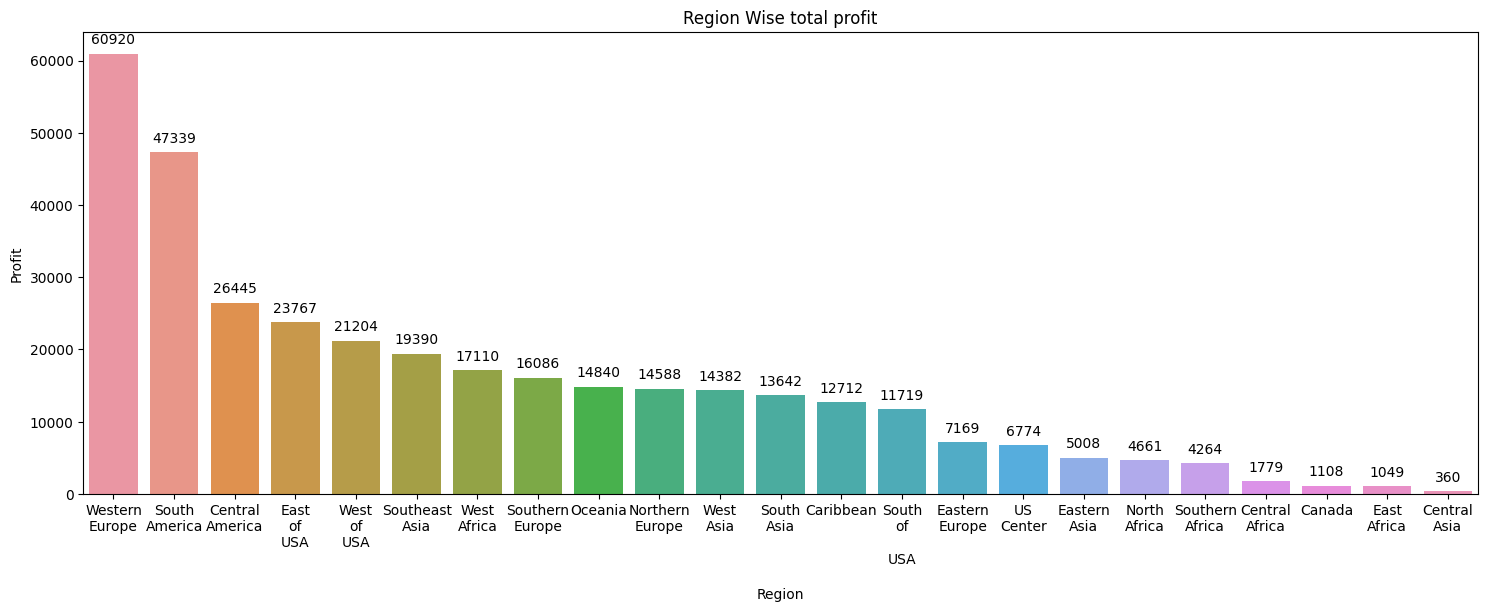

In [129]:
#•	Which customers or segments tend to generate the most profit for the company?
temp=data.copy()

temp = temp.groupby('order_region').agg(
    total_profit=('order_profit_per_order', 'sum'),
).reset_index()
temp=temp.sort_values(by="total_profit",ascending=False)
plt.figure(figsize=(18,6))
ax=sns.barplot(data=temp,x='order_region',y='total_profit')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels([label.replace(' ', '\n') for label in data['order_region'].unique()])
plt.title("Region Wise total profit")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

### 6. Order Delay and Impact on Profitability:

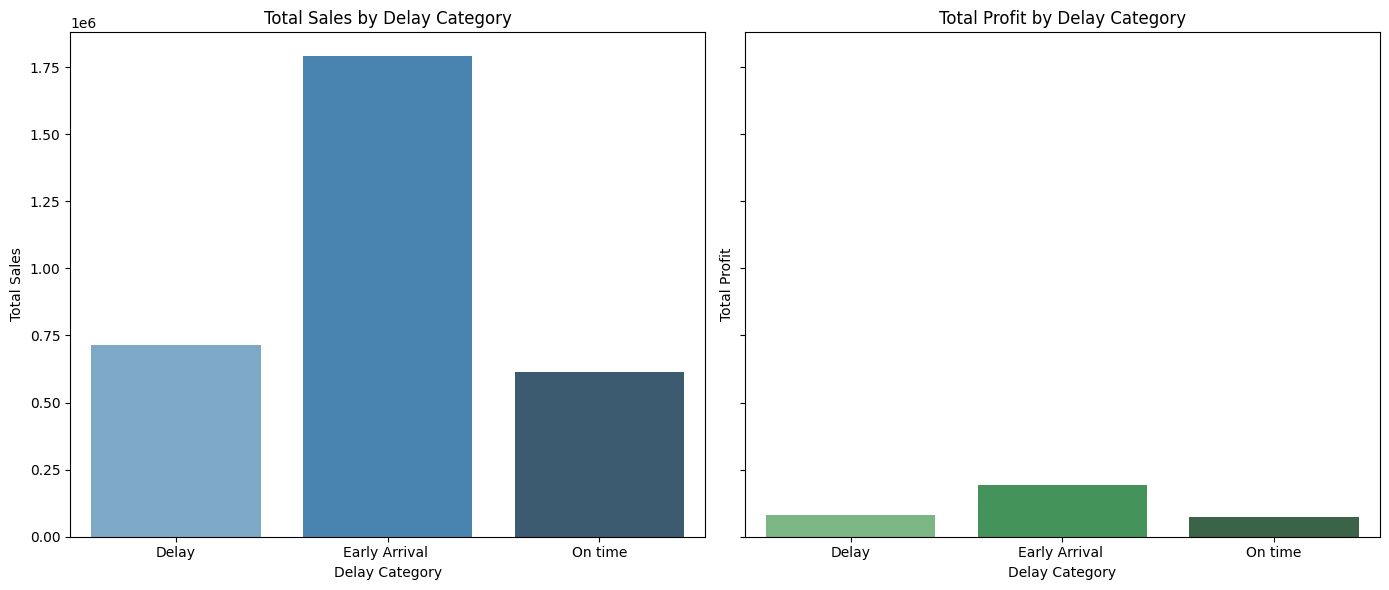

In [10]:
temp=data.copy()

temp=temp.groupby("Delay").agg(
total_sales=('sales','sum'),
total_profit=("order_profit_per_order","sum")).reset_index()
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot total_sales
sns.barplot(x='Delay', y='total_sales', data=temp, ax=ax[0], palette='Blues_d')
ax[0].set_title('Total Sales by Delay Category')
ax[0].set_xlabel('Delay Category')
ax[0].set_ylabel('Total Sales')

# Plot total_profit
sns.barplot(x='Delay', y='total_profit', data=temp, ax=ax[1], palette='Greens_d')
ax[1].set_title('Total Profit by Delay Category')
ax[1].set_xlabel('Delay Category')
ax[1].set_ylabel('Total Profit')

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

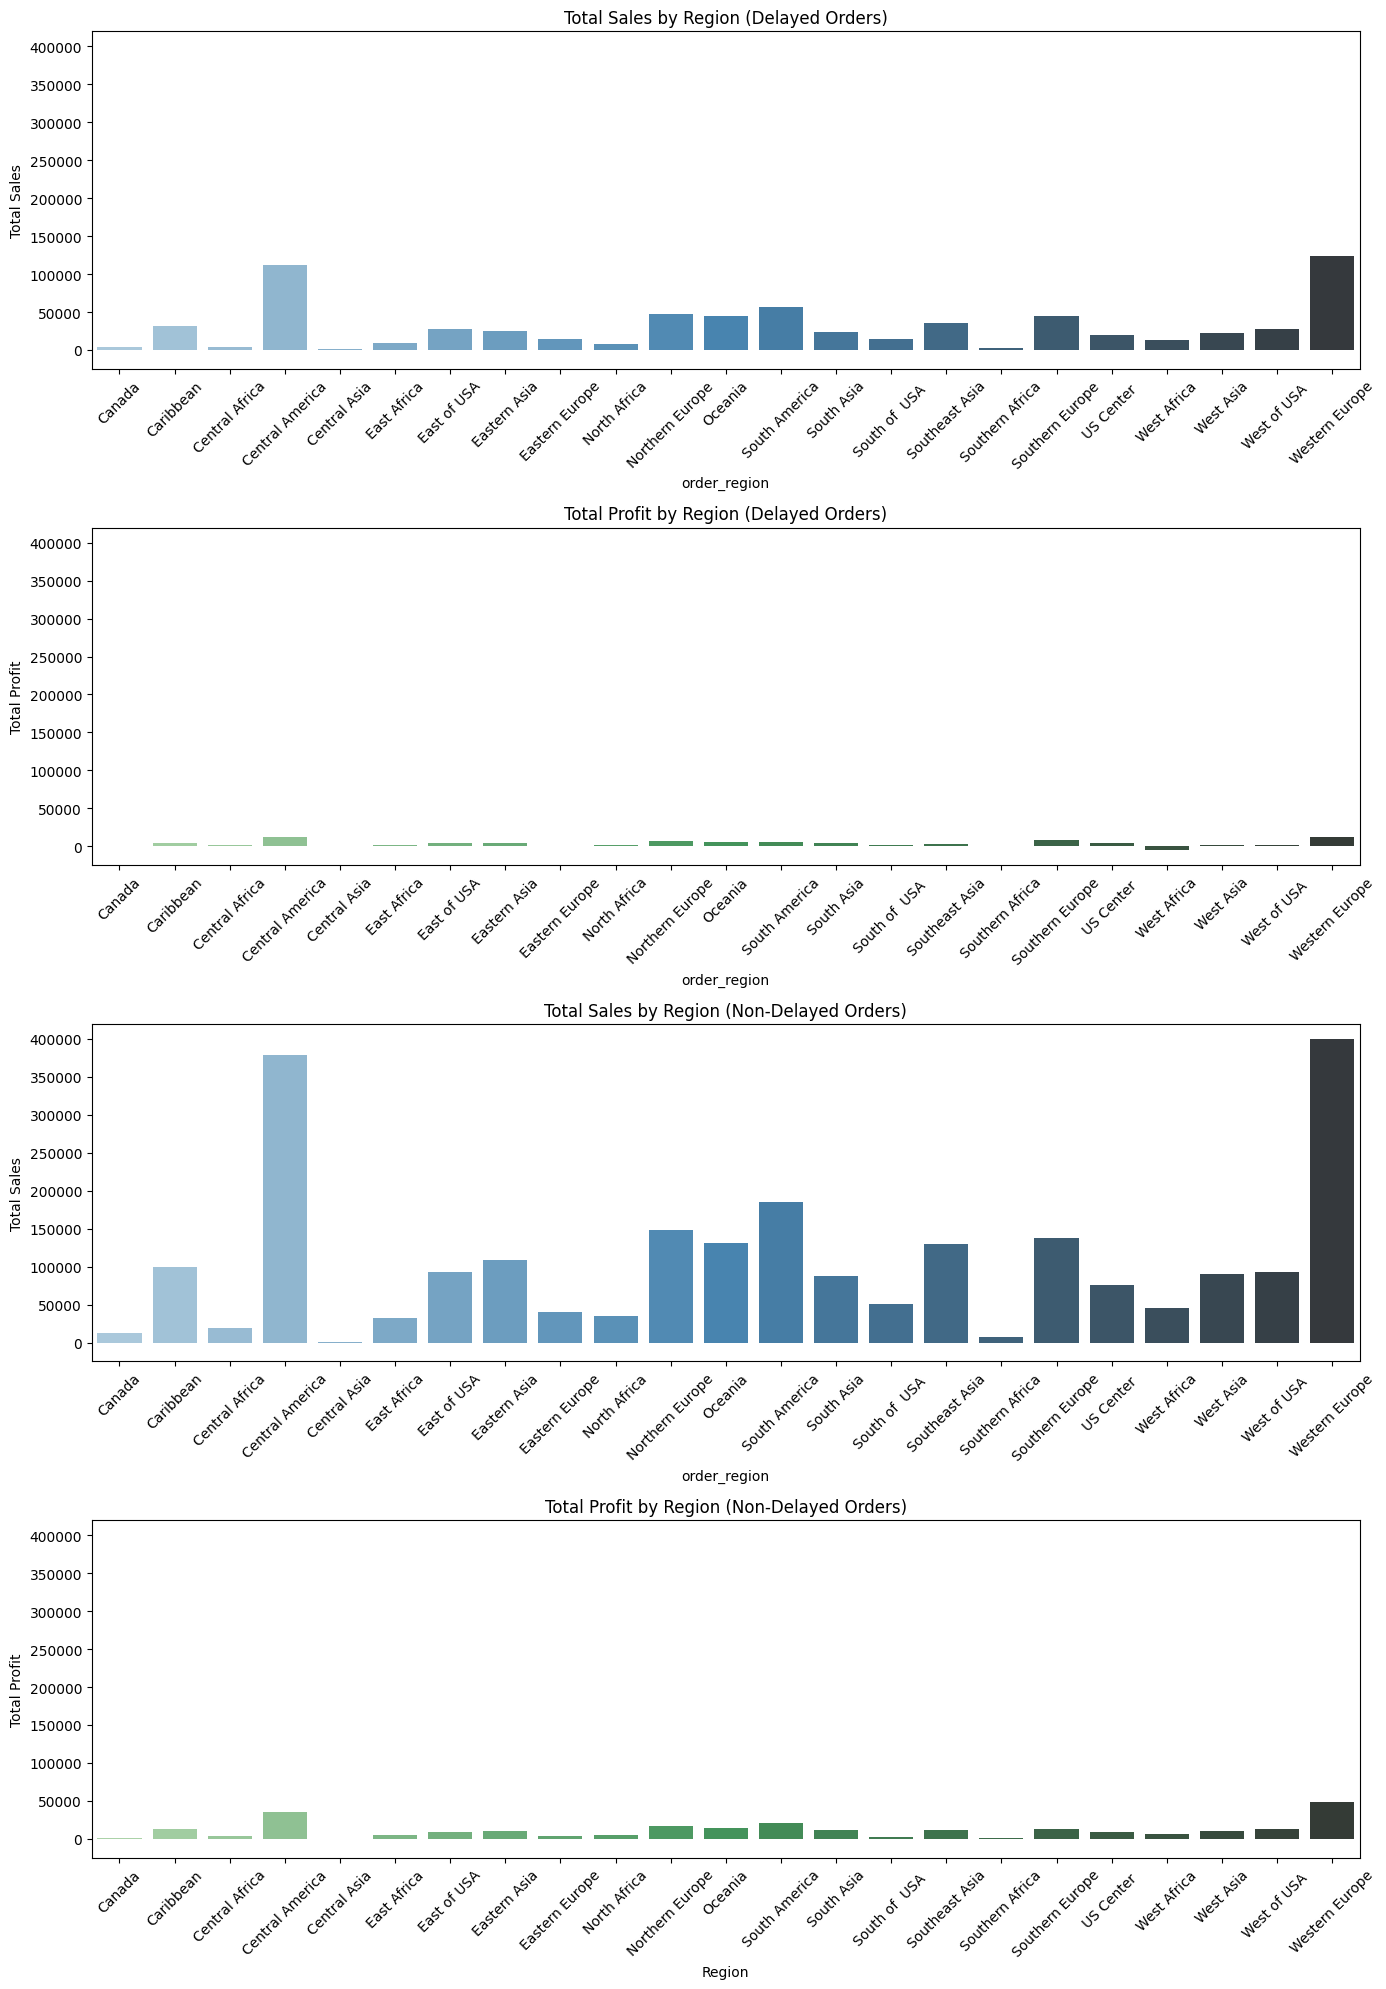

In [28]:
# Filter for delayed orders
delayed_orders = data[data['Delay'] == "Delay"]
delayed_summary = delayed_orders.groupby("order_region").agg(
    total_sales=('sales', 'sum'),
    total_profit=('order_profit_per_order', 'sum')
).reset_index()

# Filter for non-delayed orders
non_delayed_orders = data[data['Delay'] != "Delay"]
non_delayed_summary = non_delayed_orders.groupby("order_region").agg(
    total_sales=('sales', 'sum'),
    total_profit=('order_profit_per_order', 'sum')
).reset_index()

# Create subplots
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=False, sharey=True)

# Plot total_sales for delayed orders
sns.barplot(x='order_region', y='total_sales', data=delayed_summary, ax=ax[0], palette='Blues_d')
ax[0].set_title('Total Sales by Region (Delayed Orders)')
ax[0].set_ylabel('Total Sales')
ax[0].tick_params(axis='x', rotation=45)

# Plot total_profit for delayed orders
sns.barplot(x='order_region', y='total_profit', data=delayed_summary, ax=ax[1], palette='Greens_d')
ax[1].set_title('Total Profit by Region (Delayed Orders)')
ax[1].set_ylabel('Total Profit')
ax[1].tick_params(axis='x', rotation=45)

# Plot total_sales for non-delayed orders
sns.barplot(x='order_region', y='total_sales', data=non_delayed_summary, ax=ax[2], palette='Blues_d')
ax[2].set_title('Total Sales by Region (Non-Delayed Orders)')
ax[2].set_ylabel('Total Sales')
ax[2].tick_params(axis='x', rotation=45)

# Plot total_profit for non-delayed orders
sns.barplot(x='order_region', y='total_profit', data=non_delayed_summary, ax=ax[3], palette='Greens_d')
ax[3].set_title('Total Profit by Region (Non-Delayed Orders)')
ax[3].set_ylabel('Total Profit')
ax[3].set_xlabel('Region')  # Add x-axis label to the last subplot
ax[3].tick_params(axis='x', rotation=45)

# Optimize layout
plt.tight_layout()

# Show the plots
plt.show()

In [16]:
temp

payment_type  profit_per_order  sales_per_customer  \
0            DEBIT         34.448338           92.490990   
1         TRANSFER         91.193540          181.990080   
7         TRANSFER       -163.628400          120.890000   
17           DEBIT         43.940407          109.190000   
18           DEBIT         40.495990          335.980000   
...            ...               ...                 ...   
15528     TRANSFER        -62.681686          123.135010   
15531     TRANSFER         11.300016           43.980747   
15539        DEBIT         40.039387          114.390000   
15541        DEBIT         32.708225          124.500000   
15545        DEBIT         22.480274          169.990000   

              category_name customer_city customer_country  customer_id  \
0          Cardio Equipment        Caguas      Puerto Rico   12097.6830   
1              Water Sports   Albuquerque          EE. UU.    5108.1045   
7            Men's Footwear        Caguas      Puerto Rico    6775.2695   
17              Accessories        Caguas      Puerto Rico    9262.7780   
18                  Fishing        Caguas      Puerto Rico    7126.2070   
...                     ...           ...              ...          ...   
15528        Men's Footwear        Caguas      Puerto Rico    9469.2700   
15531       Women's Apparel     Levittown          EE. UU.    3686.7007   
15539        Men's Footwear        Caguas      Puerto Rico     348.7970   
15541        Men's Footwear      Edinburg          EE. UU.    8679.5410   
15545  Indoor/Outdoor Games        Caguas      Puerto Rico    3182.7766   

      customer_segment customer_state  customer_zipcode department_name  \
0             Consumer             PR           725.000        Footwear   
1             Consumer             CA         92745.160        Fan Shop   
7          Home Office             PR           725.000         Apparel   
17            Consumer             PR           725.000        Outdoors   
18            Consumer             PR           725.000        Fan Shop   
...                ...            ...               ...             ...   
15528        Corporate             PR           725.000         Apparel   
15531         Consumer             CA         92704.970            Golf   
15539         Consumer             PR           725.000         Apparel   
15541      Home Office             NJ         10156.259         Apparel   
15545         Consumer             PR           725.000        Fan Shop   

        latitude   longitude        market    order_city  order_country  \
0      18.359064  -66.370575        Europe         Viena        Austria   
1      37.636528 -121.119630         LATAM  Buenos Aires      Argentina   
7      18.214336  -66.370520          USCA  Philadelphia  United States   
17     18.201406  -66.370544        Europe     Blackpool          Italy   
18     18.254911  -66.370605  Pacific Asia     Melbourne      Australia   
...          ...         ...           ...           ...            ...   
15528  18.280083  -66.370520  Pacific Asia     Newcastle      Australia   
15531  33.865080 -117.571110          USCA      Culiacan  United States   
15539  18.248802  -65.967575         LATAM      Valencia      Venezuela   
15541  40.015720  -74.247520         LATAM       Ibaraki      Argentina   
15545  18.212540  -66.370544         LATAM   Guadalajara         Brazil   

       order_customer_id                order_date  \
0             12073.3360 2015-08-11 23:00:00+00:00   
1              5111.0480 2017-02-10 00:00:00+00:00   
7              6665.7886 2016-06-08 23:00:00+00:00   
17             9403.1160 2015-06-16 23:00:00+00:00   
18             7050.6885 2016-02-06 00:00:00+00:00   
...                  ...                       ...   
15528          9387.4010 2015-04-04 23:00:00+00:00   
15531          3887.0325 2016-07-26 23:00:00+00:00   
15539           376.5948 2017-05-30 23:00:00+00:00   
15541          8621.4120 2015-03-15 00:00:

### 7. Product-Specific Performance:

In [ ]:
temp=data.copy()
temp['profit margin %']=temp['order_profit_per_order']*100/temp['sales']

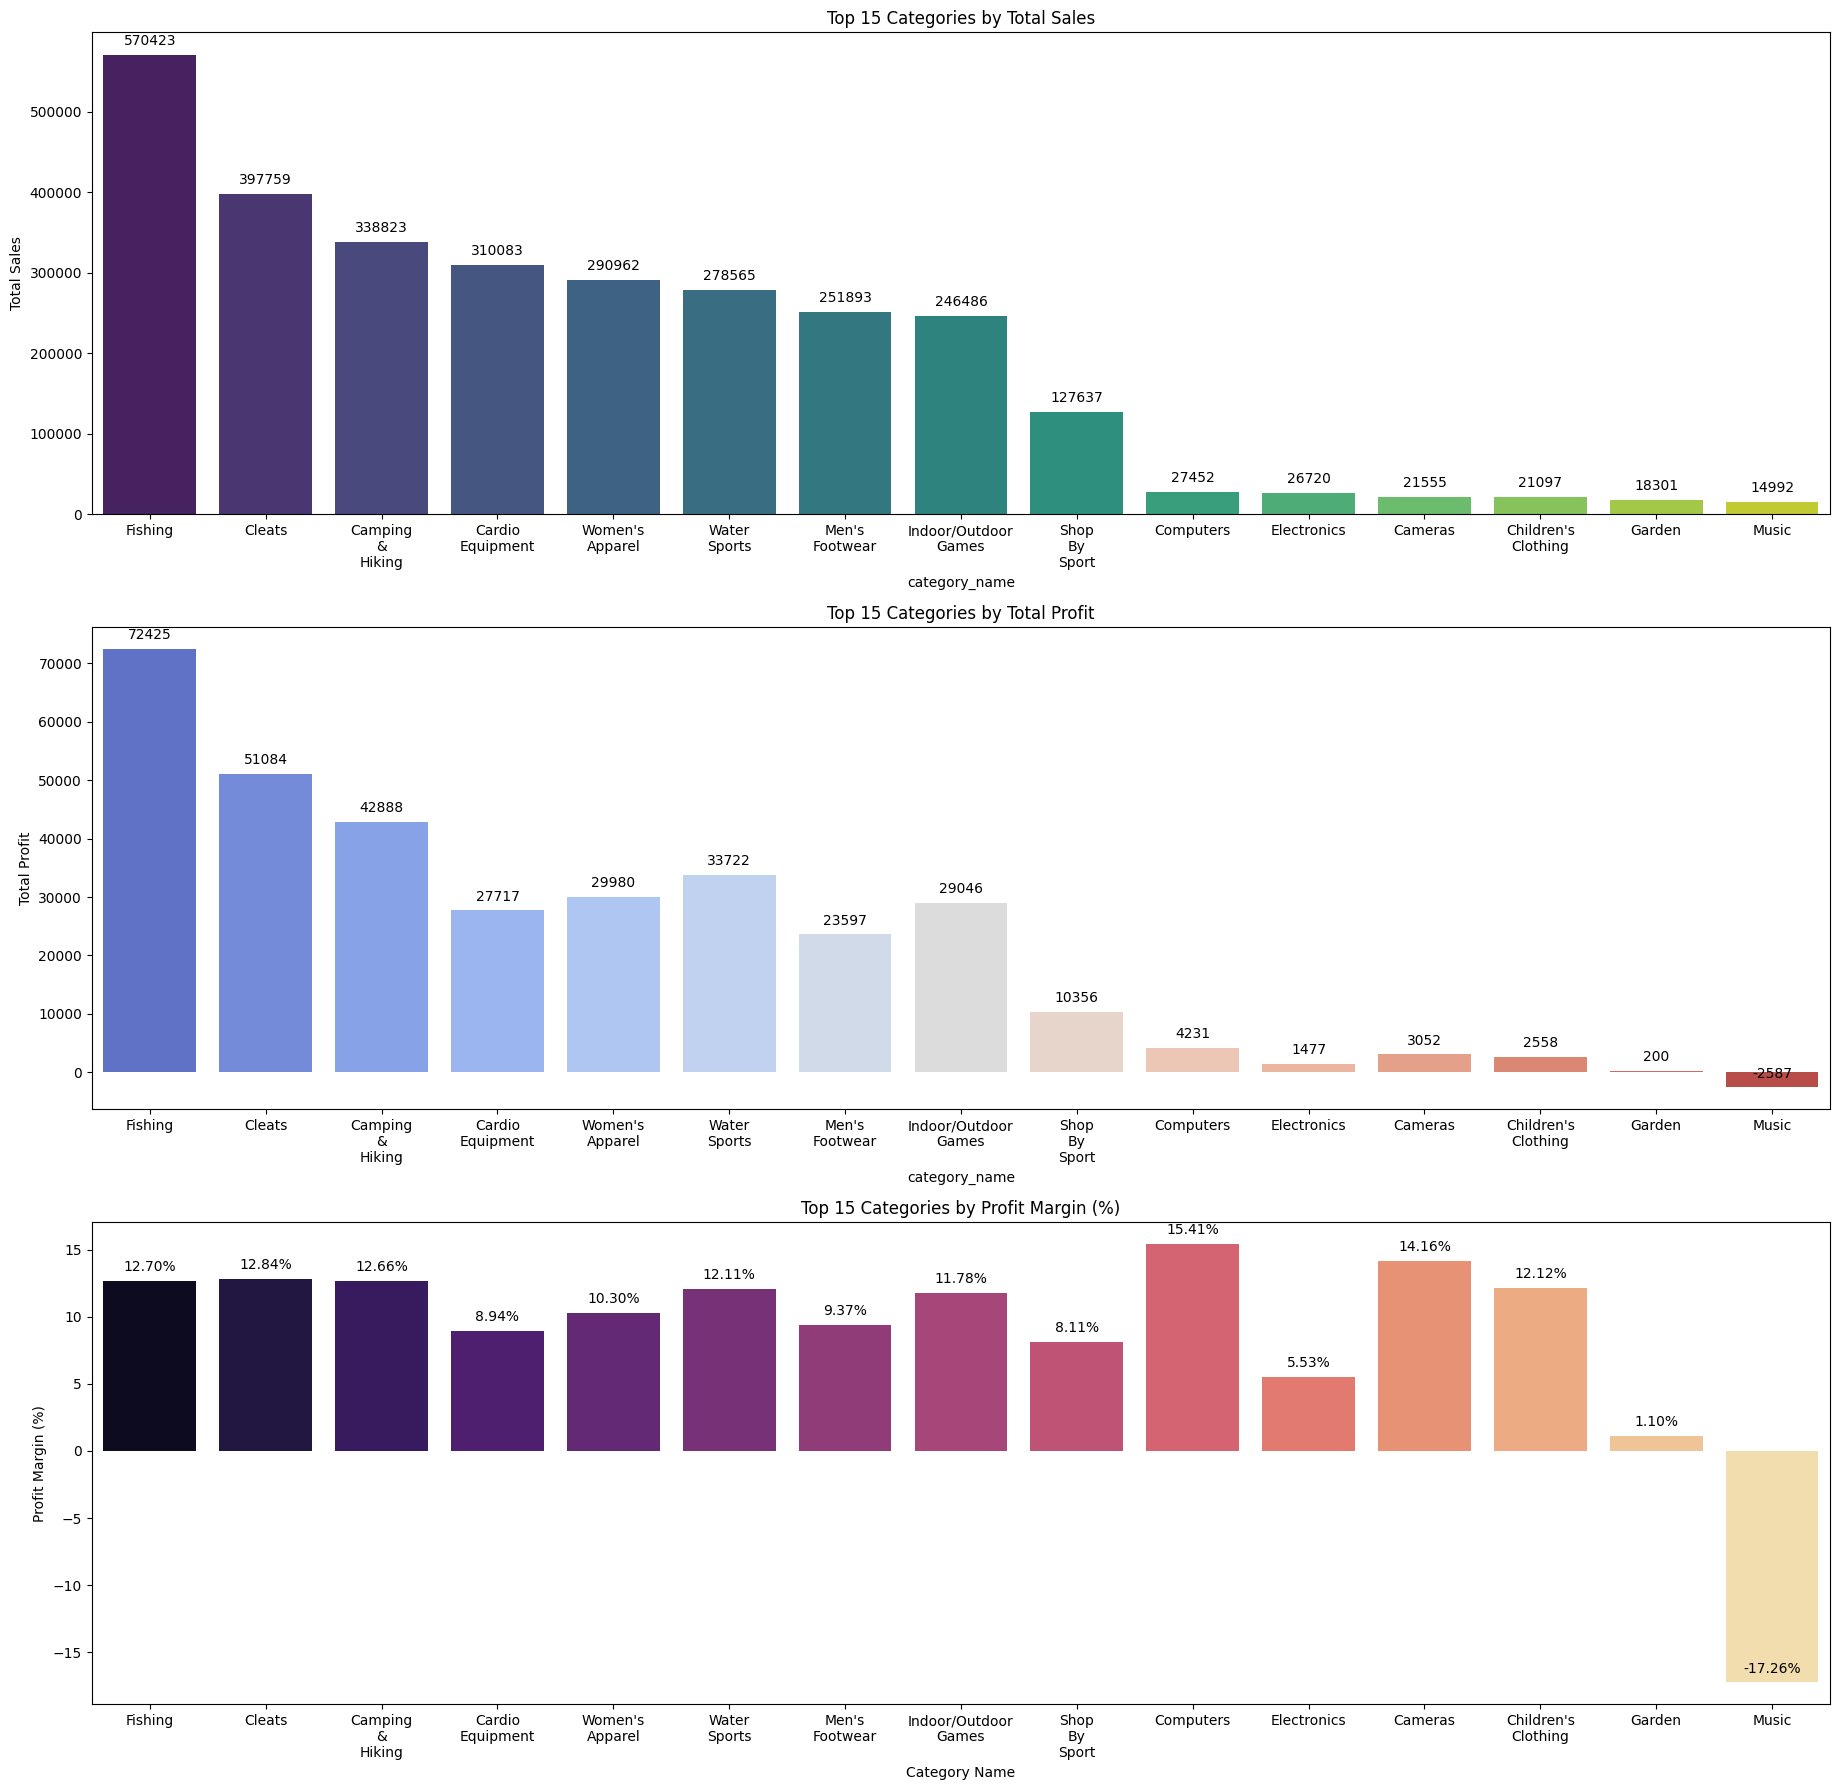

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy and prepare data
temp = data.copy()

# Group data by category name, summing sales and profit, then calculate profit margin
temp = temp.groupby('category_name').agg(
    sales=('sales', 'sum'),
    profit=('order_profit_per_order', 'sum')
).reset_index().sort_values(by='sales', ascending=False).head(15)

# Calculate profit margin percentage
temp['profit_margin_%'] = (temp['profit'] * 100) / temp['sales']

# Set up figure and axes for three subplots (sales, profit, and profit margin)
fig, ax = plt.subplots(3, 1, figsize=(18.5, 18), sharex=False)

# Plot total sales for the top 15 categories
sns.barplot(data=temp, x='category_name', y='sales', palette='viridis', ax=ax[0])
ax[0].set_title('Top 15 Categories by Total Sales')
ax[0].set_ylabel('Total Sales')

# Annotate the bars with sales values
for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust x-axis labels for better readability
ax[0].set_xticklabels([label.replace(' ', '\n') for label in temp['category_name'].unique()])

# Plot total profit for the top 15 categories
sns.barplot(data=temp, x='category_name', y='profit', palette='coolwarm', ax=ax[1])
ax[1].set_title('Top 15 Categories by Total Profit')
ax[1].set_ylabel('Total Profit')

# Annotate the bars with profit values
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust x-axis labels for better readability
ax[1].set_xticklabels([label.replace(' ', '\n') for label in temp['category_name'].unique()])

# Plot profit margin percentage for the top 15 categories
sns.barplot(data=temp, x='category_name', y='profit_margin_%', palette='magma', ax=ax[2])
ax[2].set_title('Top 15 Categories by Profit Margin (%)')
ax[2].set_ylabel('Profit Margin (%)')

# Annotate the bars with profit margin values
for p in ax[2].patches:
    height = p.get_height()
    ax[2].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust x-axis labels for better readability
ax[2].set_xticklabels([label.replace(' ', '\n') for label in temp['category_name'].unique()])

# Set x-axis label only for the bottom plot
ax[2].set_xlabel('Category Name')

# Optimize layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


### 8. Geographical Insights:

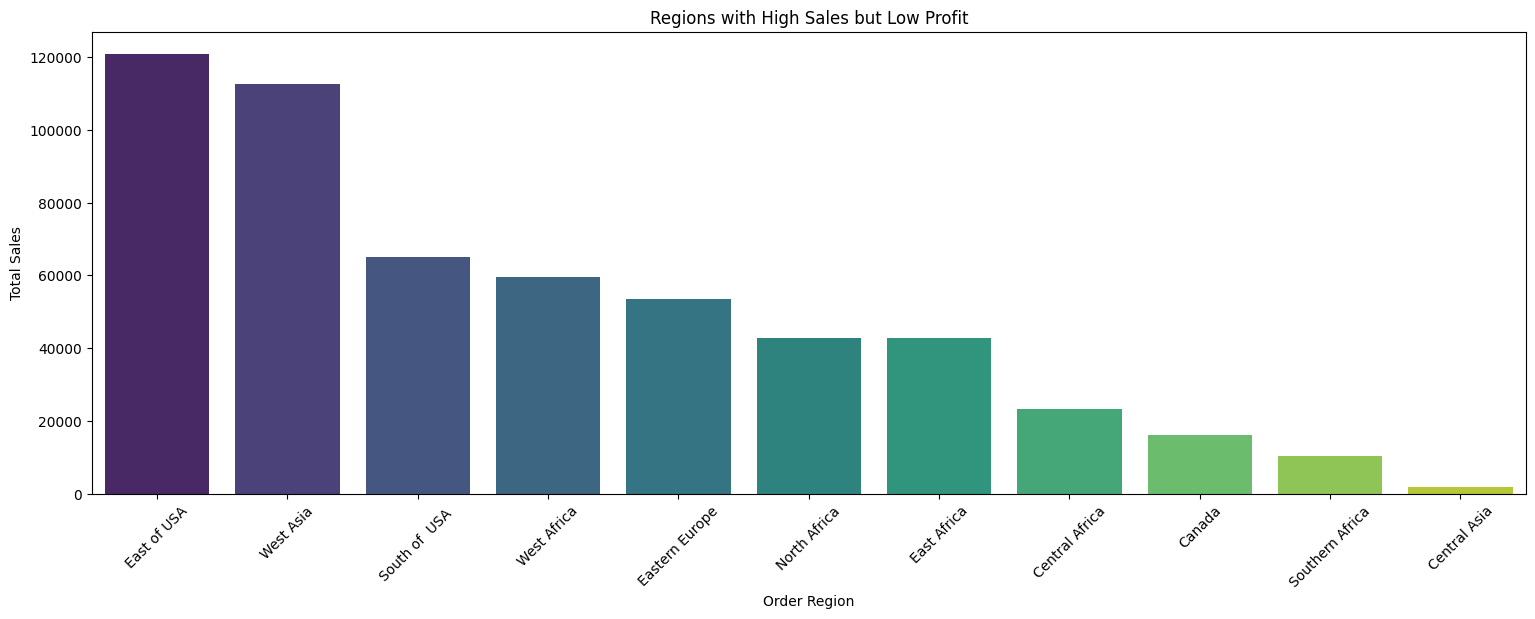

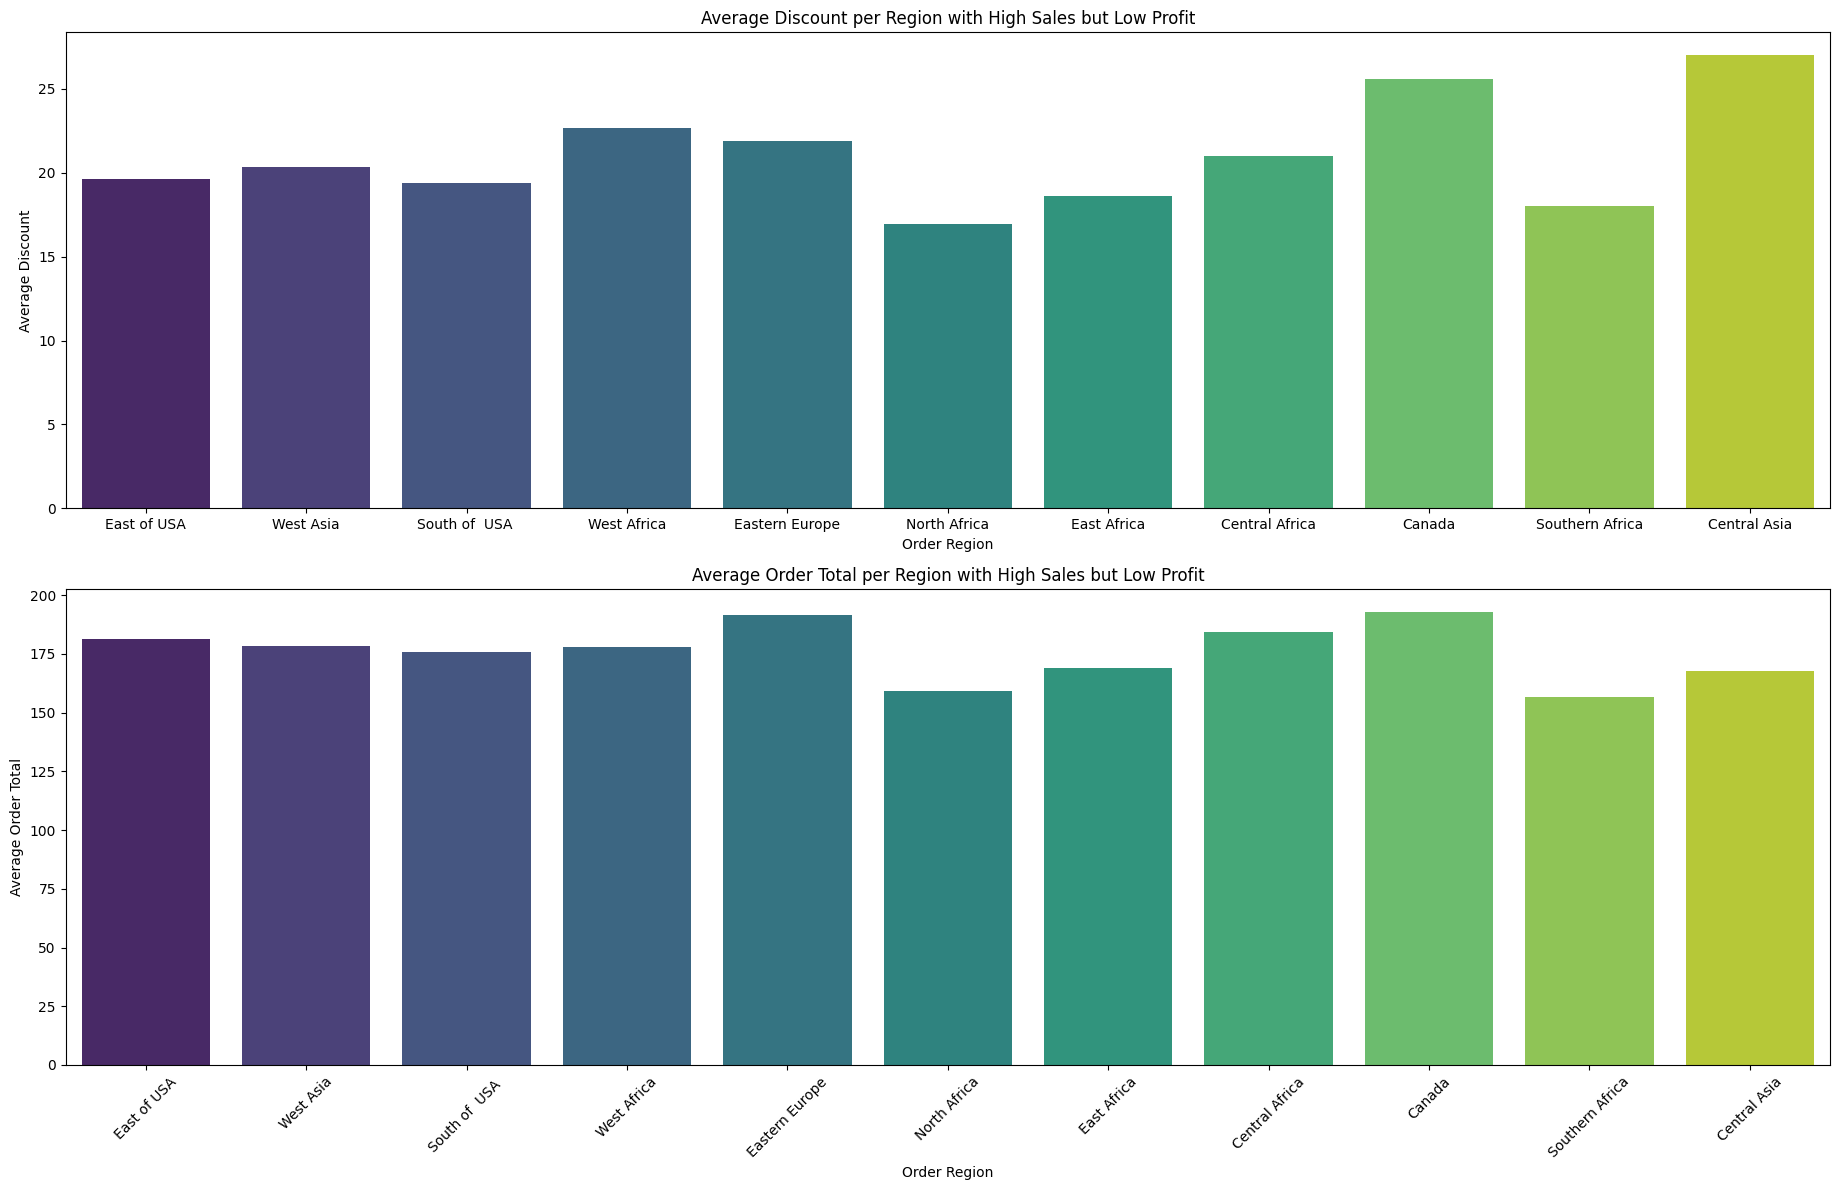

In [37]:
temp=data.copy()
region_summary = temp.groupby('order_region').agg({
    'sales': 'sum',
    'order_profit_per_order': 'sum',
    'order_item_discount': 'mean',  # Average discount per region
    'order_item_total_amount': 'mean'  # Average order total per region
}).reset_index()

# Sorting regions by total sales
region_summary = region_summary.sort_values(by='sales', ascending=False)

# Identifying regions with high sales but low profit
threshold_profit = region_summary['order_profit_per_order'].median()  # or use another threshold
high_sales_low_profit = region_summary[region_summary['order_profit_per_order'] < threshold_profit]

# Plotting the results
plt.figure(figsize=(18.5, 6))
sns.barplot(data=high_sales_low_profit, x='order_region', y='sales', palette='viridis')
plt.xlabel('Order Region')
plt.ylabel('Total Sales')
plt.title('Regions with High Sales but Low Profit')
plt.xticks(rotation=45)
plt.show()

# Additional analysis: Plotting average discount and total amount per region
fig, axs = plt.subplots(2, 1, figsize=(18.5, 12))

sns.barplot(data=high_sales_low_profit, x='order_region', y='order_item_discount', palette='viridis', ax=axs[0])
axs[0].set_xlabel('Order Region')
axs[0].set_ylabel('Average Discount')
axs[0].set_title('Average Discount per Region with High Sales but Low Profit')

sns.barplot(data=high_sales_low_profit, x='order_region', y='order_item_total_amount', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Order Region')
axs[1].set_ylabel('Average Order Total')
axs[1].set_title('Average Order Total per Region with High Sales but Low Profit')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

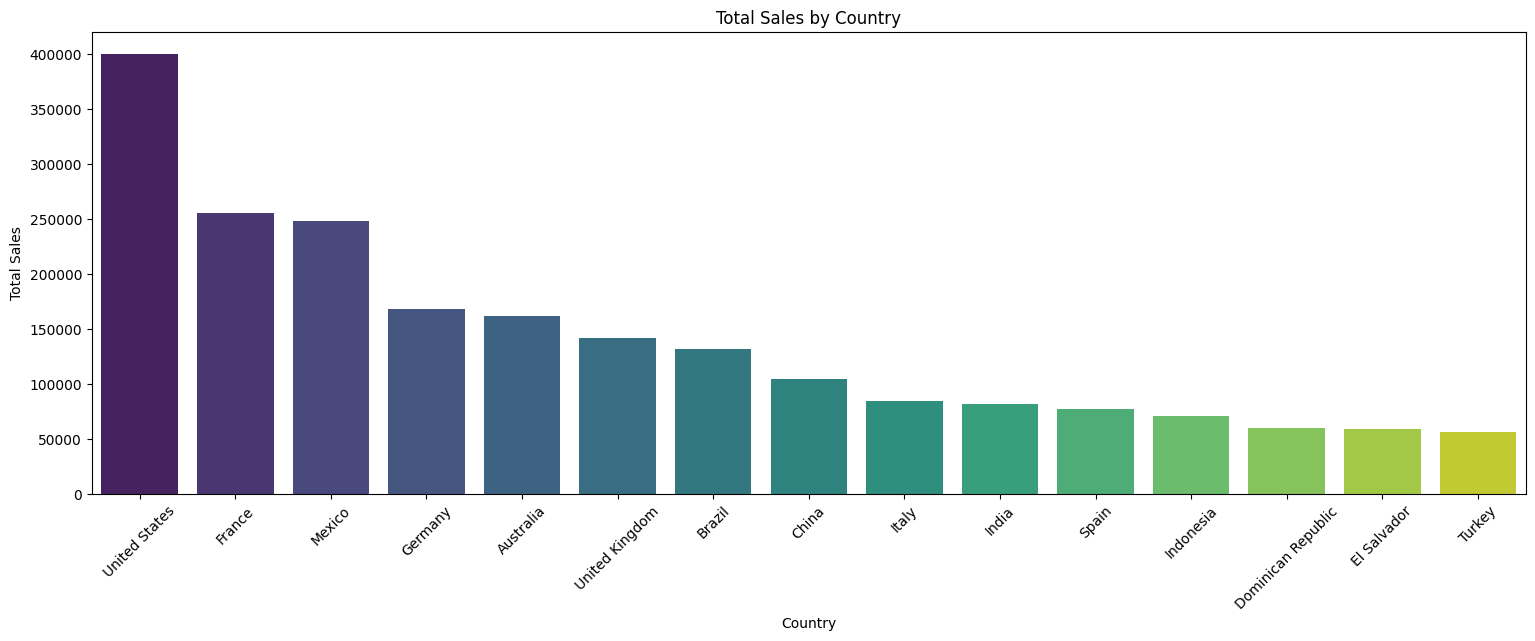

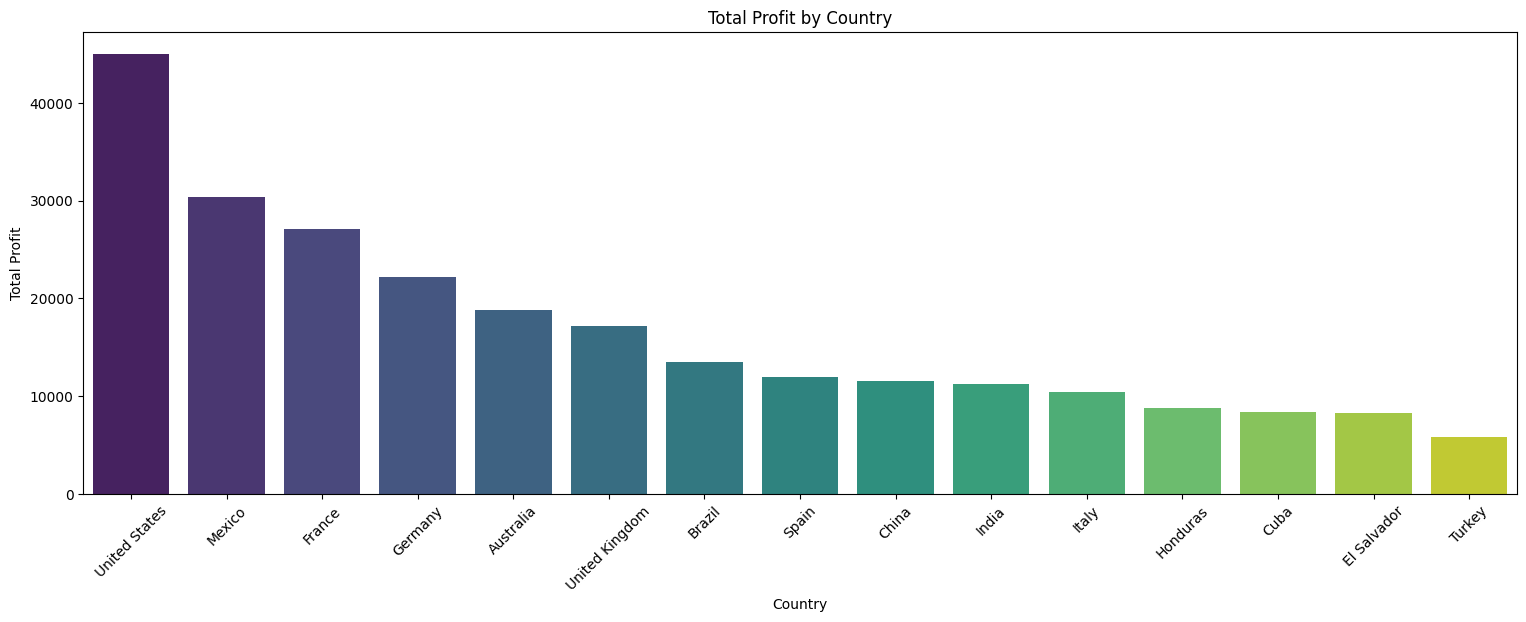

In [39]:
temp=data.copy()
geo_summary = temp.groupby('order_country').agg({
    'sales': 'sum',
    'order_profit_per_order': 'sum'
}).reset_index()

# Sorting by total sales and profitability
geo_summary_sales = geo_summary.sort_values(by='sales', ascending=False).head(15)
geo_summary_profit = geo_summary.sort_values(by='order_profit_per_order', ascending=False).head(15)

# Plotting Total Sales by Country
plt.figure(figsize=(18.5, 6))
sns.barplot(data=geo_summary_sales, x='order_country', y='sales', palette='viridis')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.xticks(rotation=45)
plt.show()

# Plotting Total Profit by Country
plt.figure(figsize=(18.5, 6))
sns.barplot(data=geo_summary_profit, x='order_country', y='order_profit_per_order', palette='viridis')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.title('Total Profit by Country')
plt.xticks(rotation=45)
plt.show()

### 9. Sales and Profitability by Shipping Mode:

In [49]:
shipping_profit

shipping_mode  order_profit_per_order         sales
0     First Class               21.342866  4.766676e+05
1        Same Day               10.047763  1.604465e+05
2    Second Class               19.803735  6.564262e+05
3  Standard Class               24.424691  1.825003e+06

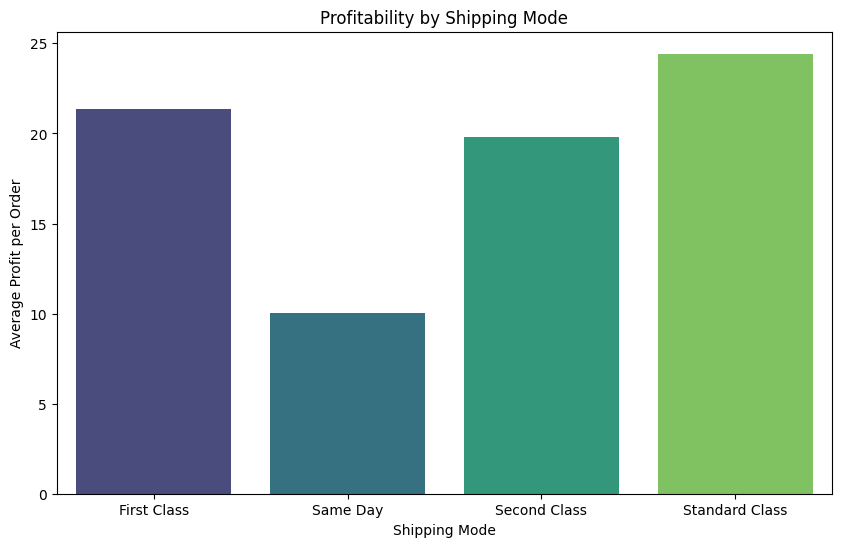

In [8]:
temp = data.copy()

shipping_profit = temp.groupby('shipping_mode').agg({
    'order_profit_per_order': 'mean',
    'sales': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=shipping_profit, x='shipping_mode', y='order_profit_per_order', palette='viridis')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit per Order')
plt.title('Profitability by Shipping Mode')
plt.show()

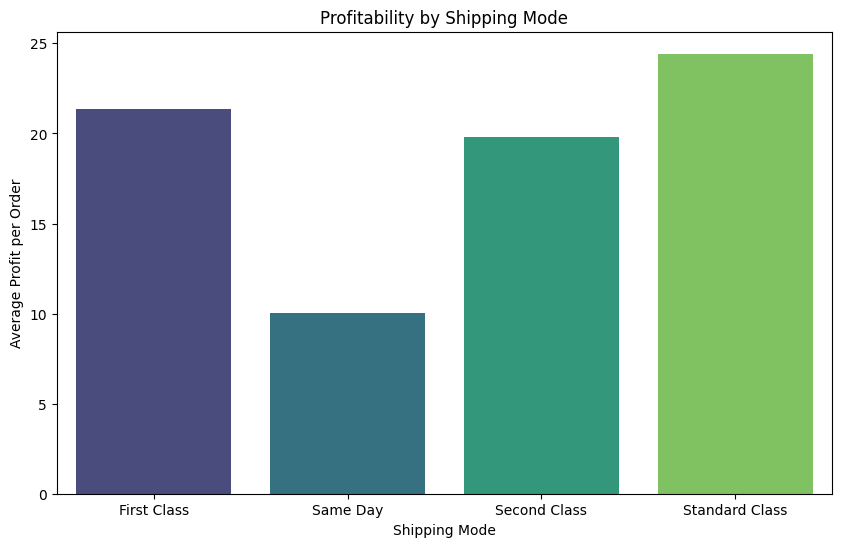

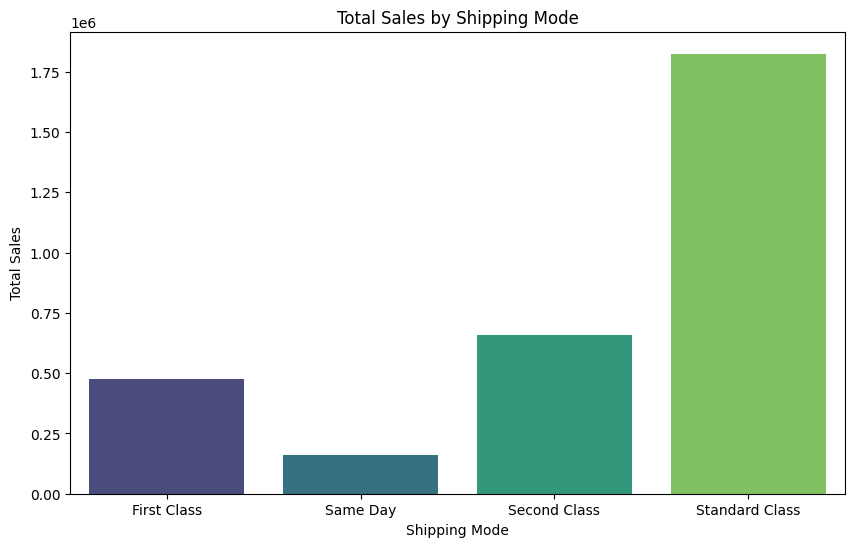

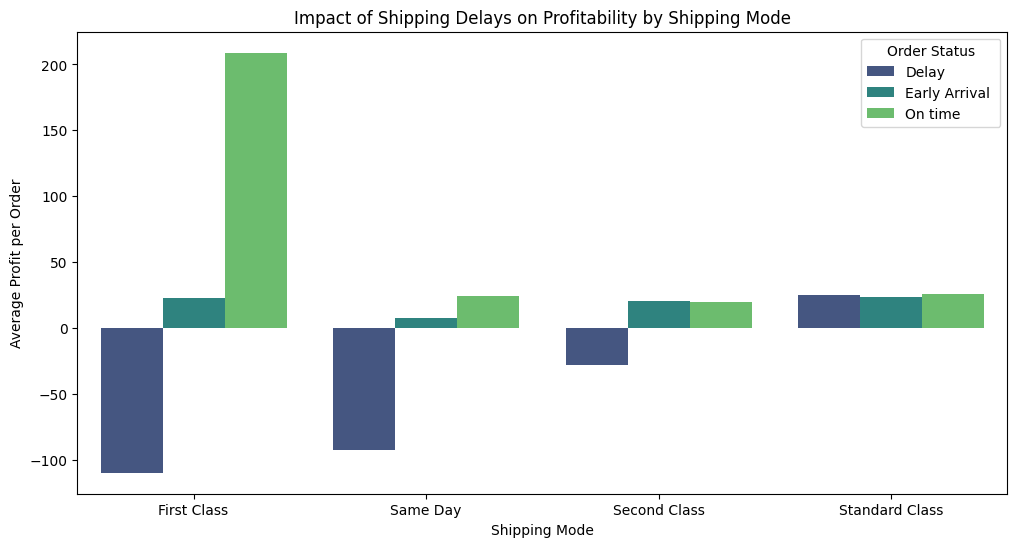

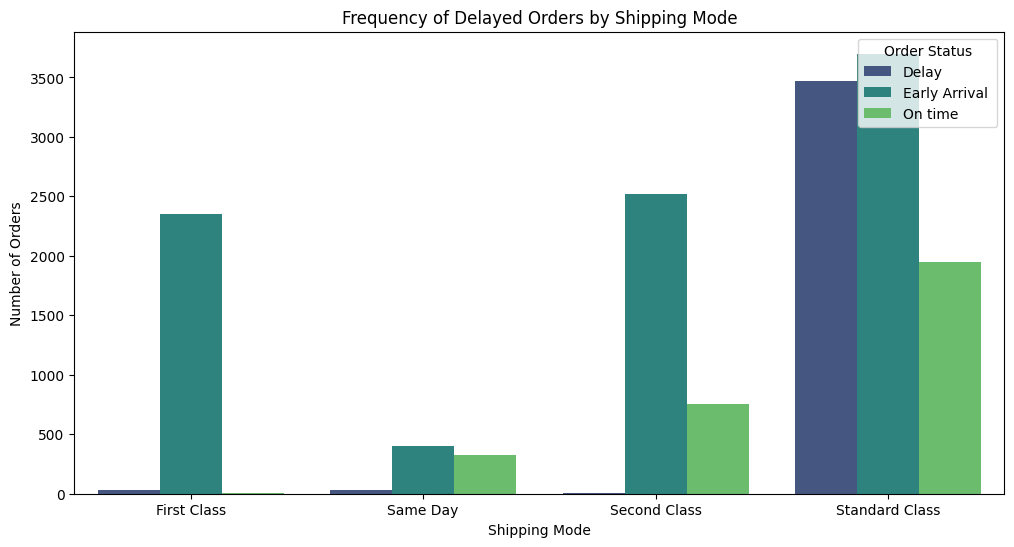

In [51]:
temp = data.copy()

# Assuming there's a column 'order_status' indicating delivery status
# Create a new column indicating if an order was delayed

### 1. Profitability Variation Across Shipping Modes

# Grouping temp by shipping mode and calculating average profit per order
shipping_profit = temp.groupby('shipping_mode').agg({
    'order_profit_per_order': 'mean',
    'sales': 'sum'
}).reset_index()

# Plotting Profitability by Shipping Mode
plt.figure(figsize=(10, 6))
sns.barplot(data=shipping_profit, x='shipping_mode', y='order_profit_per_order', palette='viridis')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit per Order')
plt.title('Profitability by Shipping Mode')
plt.show()

### 2. Difference in Sales Volume Between Shipping Modes

# Plotting Total Sales by Shipping Mode
plt.figure(figsize=(10, 6))
sns.barplot(data=shipping_profit, x='shipping_mode', y='sales', palette='viridis')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.title('Total Sales by Shipping Mode')
plt.show()

### 3. Shipping Delays and Profitability

# Grouping temp by shipping mode and delay status to analyze the effect of delays on profitability
delay_analysis = temp.groupby(['shipping_mode', 'Delay']).agg({
    'order_profit_per_order': 'mean',
    'order_id': 'count'
}).reset_index()

# Renaming the count column for clarity
delay_analysis.rename(columns={'order_id': 'order_count'}, inplace=True)

# Plotting the impact of delays on profitability by shipping mode
plt.figure(figsize=(12, 6))
sns.barplot(data=delay_analysis, x='shipping_mode', y='order_profit_per_order', hue='Delay', palette='viridis')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit per Order')
plt.title('Impact of Shipping Delays on Profitability by Shipping Mode')
plt.legend(title='Order Status', loc='upper right')
plt.show()

# Plotting the frequency of delayed orders by shipping mode
plt.figure(figsize=(12, 6))
sns.barplot(data=delay_analysis, x='shipping_mode', y='order_count', hue='Delay', palette='viridis')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.title('Frequency of Delayed Orders by Shipping Mode')
plt.legend(title='Order Status', loc='upper right')
plt.show()

# Modelling

### EXTENDED THE NOTBOOK FROM https://www.kaggle.com/code/vipulshahi/delay-prediction-model 

## Data Preprocessing

In [3]:
import pandas as pd

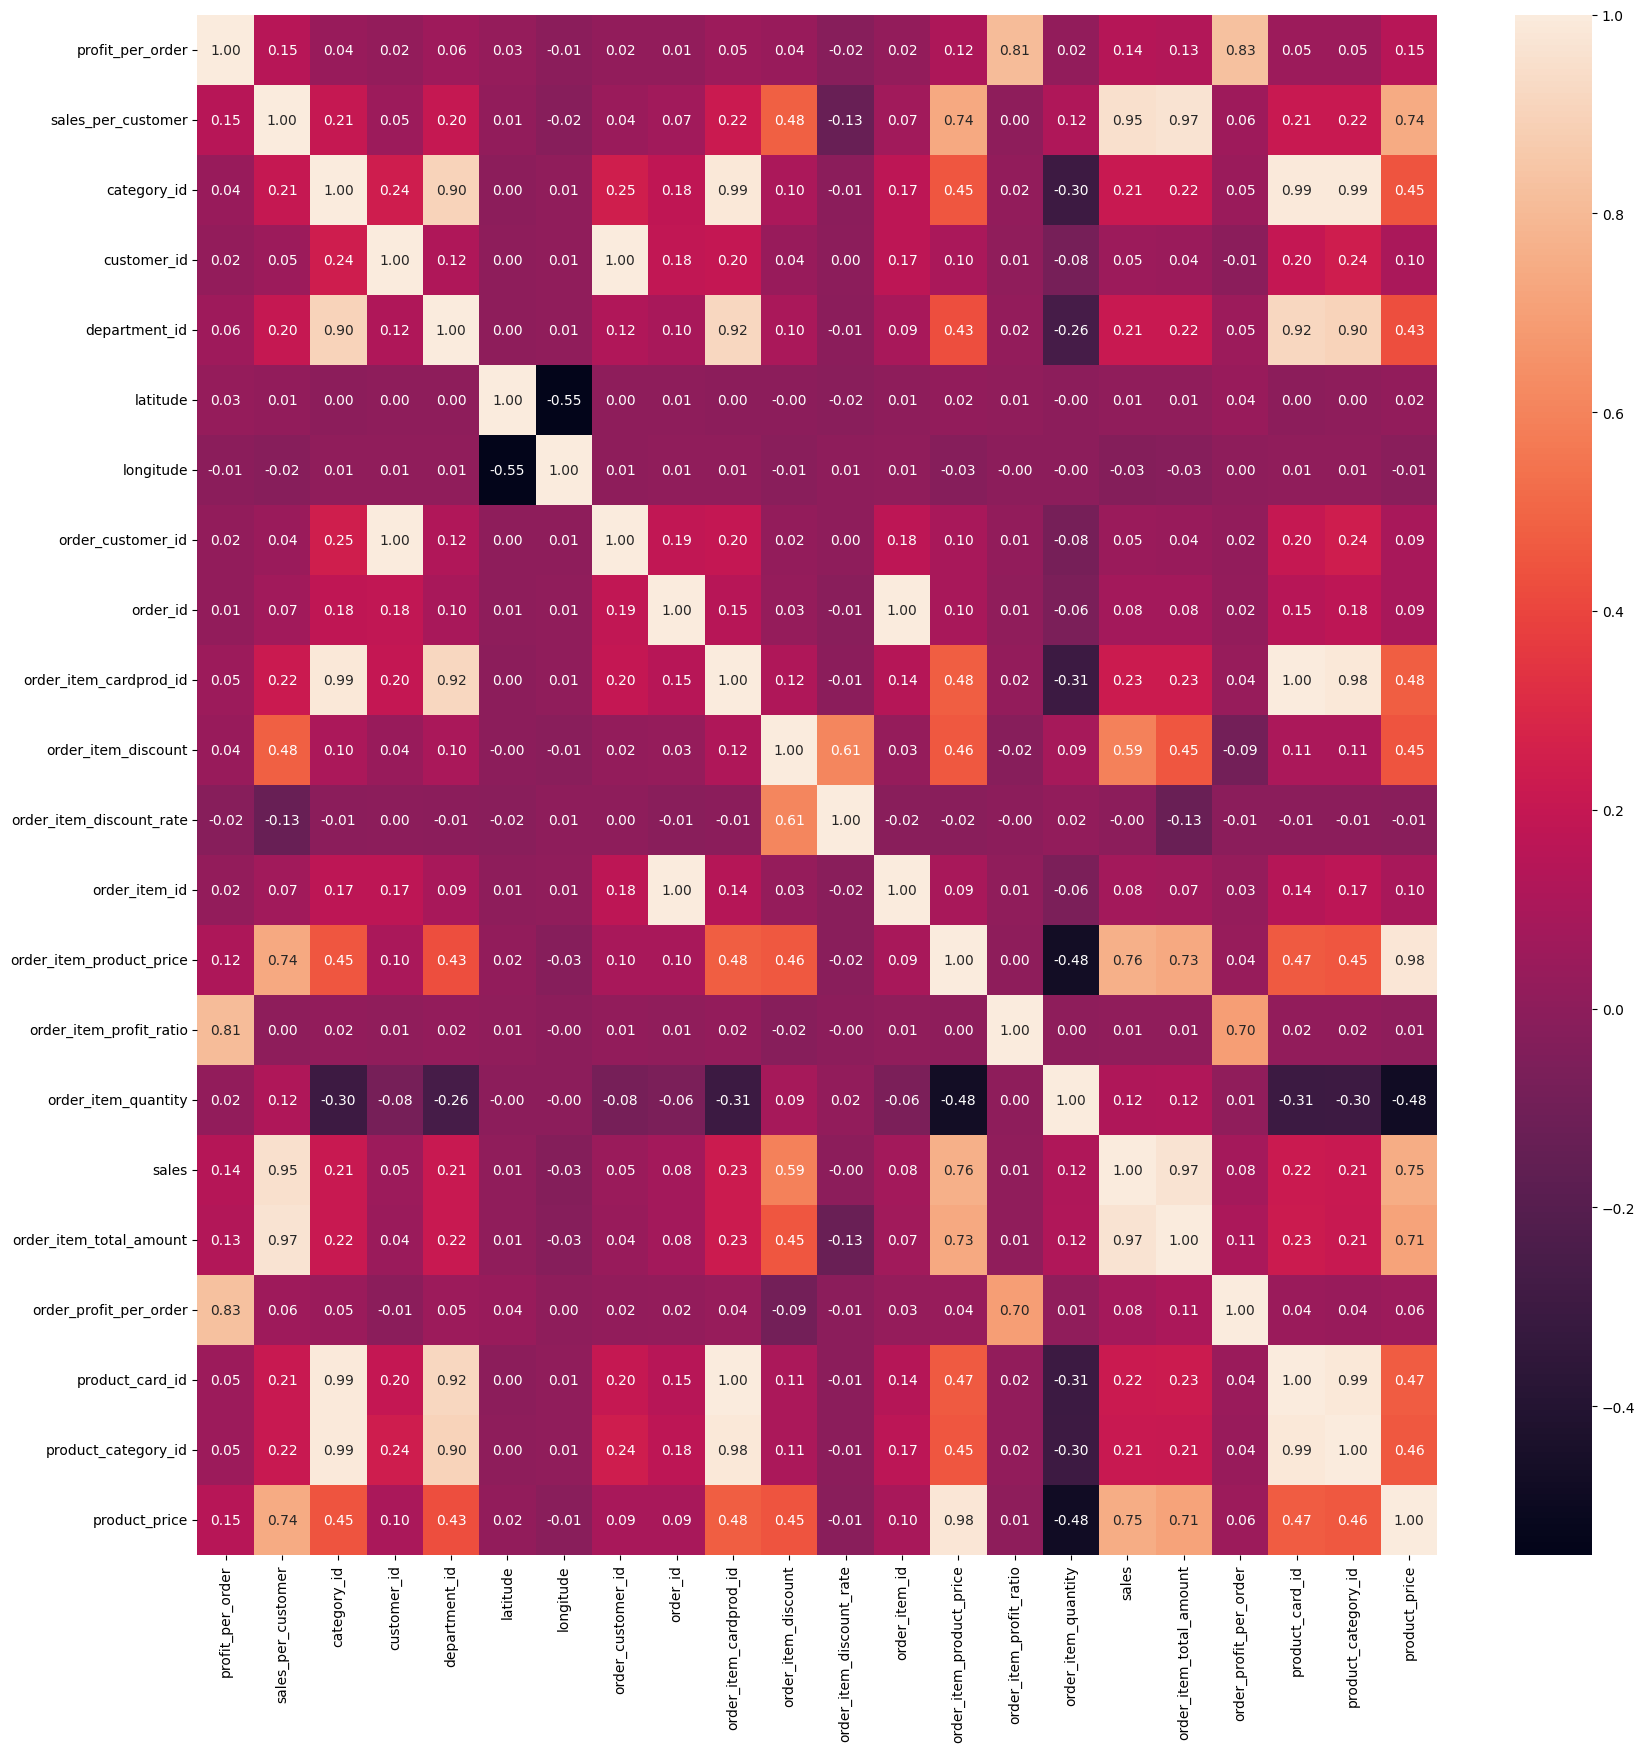

/tmp/ipykernel_36/2255096662.py:87: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  od = pd.to_datetime(df['order_date'])
/tmp/ipykernel_36/2255096662.py:88: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  sd = pd.to_datetime(df['shipping_date'])


In [4]:
# 1. Import Data
df = pd.read_csv('/kaggle/input/logistics-data-containing-real-world-data/incom2024_delay_example_dataset.csv')
dtypes = pd.read_csv('/kaggle/input/logistics-data-containing-real-world-data/incom2024_delay_variable_description.csv')

# 2. Reducing Cardinality for Categorical Variables

# For customer city:
customer_city_count = df['customer_city'].value_counts() 
city_count_less_50 = customer_city_count[customer_city_count < 50].index.to_list()
df['customer_city'] = df['customer_city'].apply(lambda x: 'Others' if x in city_count_less_50 else x)

# For customer state:
customer_state_count = df['customer_state'].value_counts()
customer_state_less_50 = customer_state_count[customer_state_count < 50].index.to_list()
df['customer_state'] = df['customer_state'].apply(lambda x: 'Others' if x in customer_state_less_50 else x)

# For order city, state, and country:
order_city_count = df['order_city'].value_counts()
city_count_less_50 = order_city_count[order_city_count < 50].index.to_list()
df['order_city'] = df['order_city'].apply(lambda x: 'Others' if x in city_count_less_50 else x)

country_count = df['order_country'].value_counts()
country_count_less_50 = country_count[country_count < 50].index.to_list()
df['order_country'] = df['order_country'].apply(lambda x: 'Others' if x in country_count_less_50 else x)

# For order region and order state:
region_count = df['order_region'].value_counts()
region_less_100 = region_count[region_count < 100].index.to_list()
df['order_region'] = df['order_region'].apply(lambda x: 'Others' if x in region_less_100 else x)

order_state_count = df['order_state'].value_counts()
order_state_less_50 = order_state_count[order_state_count < 50].index.to_list()
df['order_state'] = df['order_state'].apply(lambda x: 'Others' if x in order_state_less_50 else x)

# 3. Chi-Square Test for Independence (Categorical Variables)
from scipy.stats import chi2_contingency

categorical_columns = dtypes[dtypes['type'] == 'categorical']['variable_name']
independent_cols = []

for col in categorical_columns:
    observed_frequency = pd.crosstab(df[col], df['label'])
    chi = chi2_contingency(observed_frequency)
    if chi.pvalue >= 0.1:
        independent_cols.append(col)

df.drop(independent_cols, axis='columns', inplace=True)

# 4. Correlation Analysis and Variance Inflation Factor (VIF)
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_columns = dtypes[dtypes['type'] == 'numerical']['variable_name']
plt.figure(figsize=(20, 20))
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt='.2f')
plt.show()

cols_to_remove = []
X_vif = df[numerical_columns].copy()
X_vif.insert(0, "const", 1)

while True:
    vif_values = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    if vif_values[1:].max() > 5:
        cols_to_remove.append(vif_values[1:].idxmax())
        X_vif.drop(vif_values[1:].idxmax(), axis='columns', inplace=True)
    else:
        break

df.drop(cols_to_remove, axis='columns', inplace=True)

# 5. Chi-Square Test for Text Columns
text_columns = dtypes[dtypes['type'] == 'text']['variable_name']
independent_text_cols = []

for col in text_columns:
    observed_frequency = pd.crosstab(df[col], df['label'])
    chi = chi2_contingency(observed_frequency)
    if chi.pvalue >= 0.1:
        independent_text_cols.append(col)

df.drop(independent_text_cols, axis='columns', inplace=True)

# 6. Handling Date Columns
date_columns = dtypes[dtypes['type'] == 'datetime']['variable_name']
od = pd.to_datetime(df['order_date'])
sd = pd.to_datetime(df['shipping_date'])

processing_time = (sd - od)
df.insert(0, 'processingTime', processing_time)
df.drop(date_columns, axis='columns', inplace=True)

# 7. One-Hot Encoding of Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)

# 8. Preparing Target Variable for Model
df_encoded['label'] = df_encoded['label'].apply(lambda x: 0 if x in [-1, 0] else x)

# Final Data
X = df_encoded.drop('label', axis='columns')
y = df_encoded['label']


##  Model Training and Evaluation

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# DecisionTreeClassifier
model1 = DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced')
model1.fit(xtrain, ytrain)

print("Train Accuracy, Decision Tree",model1.score(xtrain, ytrain))
print("Test Accuracy, Decision Tree",model1.score(xtest, ytest))
print("DecisionTreeClassifier")
print(classification_report(ytrain, model1.predict(xtrain)))
print(classification_report(ytest, model1.predict(xtest)))

# RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, ccp_alpha=0.01, class_weight='balanced')
model2.fit(xtrain, ytrain)

print("Train Accuracy, RandomForest",model2.score(xtrain, ytrain))
print("Test Accuracy, RandomForest",model2.score(xtest, ytest))
print("RandomForestClassifier")
print(classification_report(ytrain, model2.predict(xtrain)))
print(classification_report(ytest, model2.predict(xtest)))

# AdaBoostClassifier
model3 = AdaBoostClassifier(n_estimators=50, algorithm='SAMME')
model3.fit(xtrain, ytrain)

print("Train Accuracy, AdaBoost", model3.score(xtrain, ytrain))
print("Test Accuracy, AdaBoost", model3.score(xtest, ytest))
print("AdaBoostClassifier")
print(classification_report(ytrain, model3.predict(xtrain)))
print(classification_report(ytest, model3.predict(xtest)))

Train Accuracy, Decision Tree 0.682531515307435
Test Accuracy, Decision Tree 0.691358024691358
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.58      0.88      0.70      4913
           1       0.86      0.54      0.66      6748

    accuracy                           0.68     11661
   macro avg       0.72      0.71      0.68     11661
weighted avg       0.74      0.68      0.68     11661

              precision    recall  f1-score   support

           0       0.59      0.88      0.71      1660
           1       0.86      0.55      0.67      2228

    accuracy                           0.69      3888
   macro avg       0.73      0.72      0.69      3888
weighted avg       0.75      0.69      0.69      3888

Train Accuracy, RandomForest 0.6860475087899837
Test Accuracy, RandomForest 0.6929012345679012
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.59      0.82      0.69      4913
 

## Model Training and Evaluation 

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# GradientBoostingClassifier
model4 = GradientBoostingClassifier()
model4.fit(xtrain, ytrain)

print("Train Accuracy, GradientBoosting", model4.score(xtrain, ytrain))
print("Test Accuracy, GradientBoosting", model4.score(xtest, ytest))
print("GradientBoostingClassifier")
print(classification_report(ytrain, model4.predict(xtrain)))
print(classification_report(ytest, model4.predict(xtest)))

# StackingClassifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced', ccp_alpha=0.1)),
              ('svr', SVC(random_state=42, class_weight='balanced')), 
              ('naivebayes', GaussianNB())]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(class_weight='balanced'))
stacking_model.fit(xtrain, ytrain)

print("Train Accuracy, Stacking", stacking_model.score(xtrain, ytrain))
print("Test Accuracy, Stacking", stacking_model.score(xtest, ytest))
print("StackingClassifier")
print(classification_report(ytrain, stacking_model.predict(xtrain)))
print(classification_report(ytest, stacking_model.predict(xtest)))


Train Accuracy, GradientBoosting 0.7037132321413258
Test Accuracy, GradientBoosting 0.6954732510288066
GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.61      0.83      0.70      4913
           1       0.83      0.61      0.70      6748

    accuracy                           0.70     11661
   macro avg       0.72      0.72      0.70     11661
weighted avg       0.74      0.70      0.70     11661

              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1660
           1       0.82      0.61      0.70      2228

    accuracy                           0.70      3888
   macro avg       0.71      0.71      0.70      3888
weighted avg       0.73      0.70      0.70      3888

Train Accuracy, Stacking 0.5714775748220564
Test Accuracy, Stacking 0.5745884773662552
StackingClassifier
              precision    recall  f1-score   support

           0       0.49      0.34      0.40      4913
 

In [6]:
!pip install optuna


In [ ]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1)
    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)

    # Create the GradientBoostingClassifier with the suggested hyperparameters
    model = GradientBoostingClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        random_state=42
    )

    # Fit the model
    model.fit(xtrain, ytrain)

    # Predict on validation data
    y_pred = model.predict(xtest)

    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    
    return accuracy

# Create the Optuna study and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters: ", best_params)

# Train a new model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=42)
best_model.fit(xtrain, ytrain)

# Evaluate the optimized model
train_accuracy = best_model.score(xtrain, ytrain)
test_accuracy = best_model.score(xtest, ytest)

print("Train Accuracy, Optimized GradientBoosting: ", train_accuracy)
print("Test Accuracy, Optimized GradientBoosting: ", test_accuracy)

# Classification report for train and test sets
print("Optimized GradientBoostingClassifier - Train")
print(classification_report(ytrain, best_model.predict(xtrain)))
print("Optimized GradientBoostingClassifier - Test")
print(classification_report(ytest, best_model.predict(xtest)))


[I 2024-09-20 04:26:48,199] A new study created in memory with name: no-name-7df0e934-0943-4aa3-9270-871ee5bc283b
/tmp/ipykernel_36/755735051.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1)
/tmp/ipykernel_36/755735051.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
[I 2024-09-20 04:28:30,110] Trial 0 finished with value: 0.6247427983539094 and parameters: {'learning_rate': 0.0025682258833690922, 'n_estimators': 240, 'max_depth': 8, 'min_samples_split': 27, 'min_samples_leaf': 34, 'subsample': 0.8031960739848676}. Best is trial 0 with value: 0.62474279835390